### Data Description

In [8]:
#Loading the necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
warnings.filterwarnings(action = "ignore")

In [9]:
df = pd.read_csv('Case_Data.csv')
df.head()

Row ID        id  member_id  loan_amnt  funded_amnt        term  int_rate  \
0     1.0  60516983   64537751      20000        20000   36 months     12.29   
1     2.0  60187139   64163931      11000        11000   36 months     12.69   
2     3.0  60356453   64333218       7000         7000   36 months      9.99   
3     4.0  59955769   63900496      10000        10000   36 months     10.99   
4     5.0  58703693   62544456       9550         9550   36 months     19.99   

   installment grade sub_grade  ... application_type annual_inc_joint  \
0       667.06     C        C1  ...       INDIVIDUAL              NaN   
1       369.00     C        C2  ...       INDIVIDUAL              NaN   
2       225.84     B        B3  ...       INDIVIDUAL              NaN   
3       327.34     B        B4  ...       INDIVIDUAL              NaN   
4       354.87     E        E4  ...       INDIVIDUAL              NaN   

  dti_joint  acc_now_delinq tot_coll_amt tot_cur_bal total_rev_hi_lim  \
0       NaN               0            0       52303            41000   
1       NaN               0          332      175731            13100   
2       NaN               0            0      202012            16300   
3       NaN               0            0      108235            34750   
4       NaN               0            0       45492            14100   

  Unnamed: 50 36months  60months  
0         NaN      1.0       0.0  
1         NaN      1.0       0.0  
2         NaN      1.0       0.0  
3         NaN      1.0       0.0  
4         NaN      1.0       0.0  

[5 rows x 53 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212999 entries, 0 to 212998
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Row ID                       368 non-null     float64
 1   id                           212999 non-null  int64  
 2   member_id                    212999 non-null  int64  
 3   loan_amnt                    212999 non-null  int64  
 4   funded_amnt                  212999 non-null  int64  
 5   term                         212999 non-null  object 
 6   int_rate                     212999 non-null  float64
 7   installment                  212999 non-null  float64
 8   grade                        212999 non-null  object 
 9   sub_grade                    212999 non-null  object 
 10  emp_title                    200209 non-null  object 
 11  emp_length                   200232 non-null  object 
 12  home_ownership               212999 non-null  object 
 13 

In [11]:
df.shape

(212999, 53)

#### Dropping the unnecessary columns

In [12]:
df.drop(['Row ID','Unnamed: 50'],axis=1, inplace=True)

In [13]:
df.dtypes

id                               int64
member_id                        int64
loan_amnt                        int64
funded_amnt                      int64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                     object
purpose                         object
title                           object
dti                            float64
delinq_2yrs                      int64
earliest_cr_line                object
inq_last_6mths                   int64
mths_since_last_delinq         float64
open_acc                         int64
pub_rec                          int64
revol_bal                

In [14]:
df.drop(['36months','60months','sub_grade','purpose'],axis=1, inplace=True)

#### Checking the datatypes

In [15]:
df.dtypes

id                               int64
member_id                        int64
loan_amnt                        int64
funded_amnt                      int64
term                            object
int_rate                       float64
installment                    float64
grade                           object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                     object
title                           object
dti                            float64
delinq_2yrs                      int64
earliest_cr_line                object
inq_last_6mths                   int64
mths_since_last_delinq         float64
open_acc                         int64
pub_rec                          int64
revol_bal                        int64
revol_util                     float64
total_acc                

In [16]:
df.select_dtypes(include=['object']).columns

Index(['term', 'grade', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'title',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'application_type'],
      dtype='object')

In [17]:
df['issue_d']

0         15-Sep
1         15-Sep
2         15-Sep
3         15-Sep
4         15-Sep
           ...  
212994    15-Jul
212995    15-Jul
212996    15-Jul
212997    15-Jul
212998    15-Jul
Name: issue_d, Length: 212999, dtype: object

In [18]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%y-%b', errors='coerce')


df['issue_year'] = df['issue_d'].dt.year
df['issue_month'] = df['issue_d'].dt.strftime('%b')  

In [19]:
df = df.drop('issue_d', axis=1)

In [20]:
df['earliest_cr_line']

0         Sep-00
1          2-Sep
2          6-Feb
3         Oct-99
4         Nov-99
           ...  
212994     2-Jul
212995     5-Sep
212996     9-Feb
212997    Mar-85
212998     1-Mar
Name: earliest_cr_line, Length: 212999, dtype: object

In [21]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], errors='coerce')

# Extracting the year and month into separate columns
df['earliest_cr_line_year'] = df['earliest_cr_line'].dt.year
df['earliest_cr_line_month'] = df['earliest_cr_line'].dt.strftime('%b')

In [22]:
df = df.drop('earliest_cr_line', axis=1)

In [23]:
df['last_pymnt_d']

0            NaN
1         15-Oct
2         15-Oct
3         15-Oct
4         15-Oct
           ...  
212994    16-Jan
212995    15-Dec
212996    16-Jan
212997    16-Jan
212998    16-Jan
Name: last_pymnt_d, Length: 212999, dtype: object

In [24]:
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%y-%b', errors='coerce')

# Extracting the year and month into separate columns
df['last_pymnt_d_year'] = df['last_pymnt_d'].dt.year
df['last_pymnt_d_month'] = df['last_pymnt_d'].dt.strftime('%b')  # Abbreviated month name


In [25]:
df['last_pymnt_d_year']

0            NaN
1         2015.0
2         2015.0
3         2015.0
4         2015.0
           ...  
212994    2016.0
212995    2015.0
212996    2016.0
212997    2016.0
212998    2016.0
Name: last_pymnt_d_year, Length: 212999, dtype: float64

In [26]:
df = df.drop('last_pymnt_d', axis=1)

In [27]:
df['next_pymnt_d']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
           ...  
212994    16-Feb
212995    16-Feb
212996    16-Feb
212997    16-Feb
212998    16-Feb
Name: next_pymnt_d, Length: 212999, dtype: object

In [28]:

df['next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'], format='%y-%b', errors='coerce')

# Extracting the year and month into separate columns
df['next_pymnt_d_year'] = df['next_pymnt_d'].dt.year
df['next_pymnt_d_month'] = df['next_pymnt_d'].dt.strftime('%b')  # Abbreviated month name


In [29]:
df = df.drop('next_pymnt_d', axis=1)

In [30]:
df['last_credit_pull_d']

0         16-Jan
1         16-Jan
2         16-Jan
3         16-Jan
4         16-Jan
           ...  
212994    16-Jan
212995    16-Jan
212996    16-Jan
212997    16-Jan
212998    16-Jan
Name: last_credit_pull_d, Length: 212999, dtype: object

In [31]:
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%y-%b', errors='coerce')

# Extracting the year and month into separate columns
df['last_credit_pull_d_year'] = df['last_credit_pull_d'].dt.year
df['last_credit_pull_d_month'] = df['last_credit_pull_d'].dt.strftime('%b')  # Abbreviated month name


In [32]:
df = df.drop('last_credit_pull_d', axis=1)

In [33]:
df.select_dtypes(include=['object']).columns

Index(['term', 'grade', 'emp_title', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'title', 'initial_list_status',
       'application_type', 'issue_month', 'earliest_cr_line_month',
       'last_pymnt_d_month', 'next_pymnt_d_month', 'last_credit_pull_d_month'],
      dtype='object')

In [34]:
df.dtypes

id                               int64
member_id                        int64
loan_amnt                        int64
funded_amnt                      int64
term                            object
int_rate                       float64
installment                    float64
grade                           object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
loan_status                     object
title                           object
dti                            float64
delinq_2yrs                      int64
inq_last_6mths                   int64
mths_since_last_delinq         float64
open_acc                         int64
pub_rec                          int64
revol_bal                        int64
revol_util                     float64
total_acc                        int64
initial_list_status             object
out_prncp                

### Univariate Analysis

#### Analysis of the Target Variable-- loan_status

In [35]:
df['loan_status'].unique()

array(['Charged Off', 'Current'], dtype=object)

In [36]:
df.loan_status.describe()

count      212999
unique          2
top       Current
freq       210226
Name: loan_status, dtype: object

In [37]:
imbalance_percentage = df['loan_status'].value_counts(normalize=True) * 100
print(imbalance_percentage)

Current        98.698116
Charged Off     1.301884
Name: loan_status, dtype: float64


<Axes: >

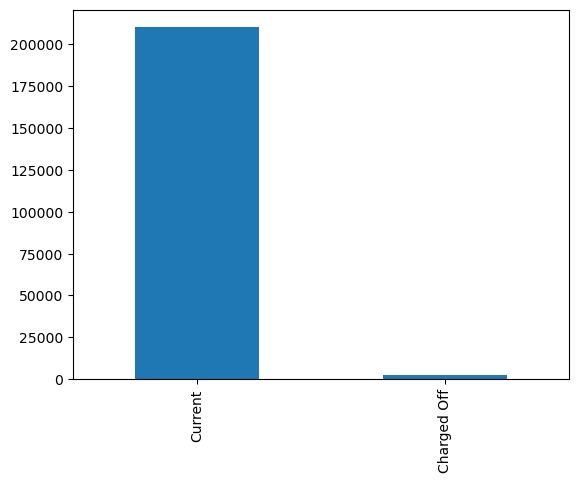

In [38]:
df.loan_status.value_counts().plot(kind='bar')

In [39]:
df.select_dtypes(include=np.number).columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'total_pymnt',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'issue_year',
       'earliest_cr_line_year', 'last_pymnt_d_year', 'next_pymnt_d_year',
       'last_credit_pull_d_year'],
      dtype='object')

#### Analysis of the numeric variables

<Axes: >

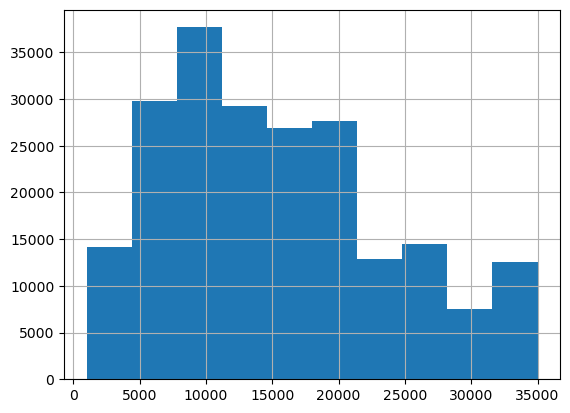

In [40]:
df['loan_amnt'].hist()

<Axes: xlabel='loan_amnt', ylabel='Density'>

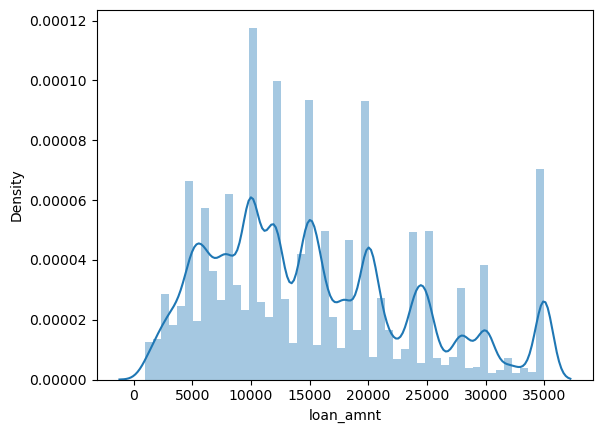

In [41]:
sns.distplot(df['loan_amnt'])

In [42]:
df['loan_amnt'].skew()

0.617501484166948

In [43]:
df['loan_amnt'].describe()

count    212999.000000
mean      15257.965530
std        8611.713377
min        1000.000000
25%        8500.000000
50%       14000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

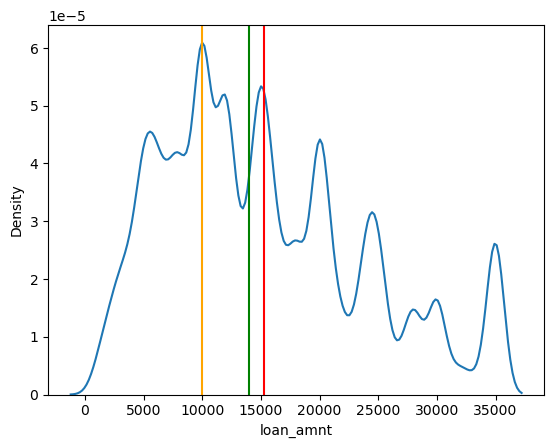

In [44]:
me = df['loan_amnt'].mean()
md = df['loan_amnt'].median()
mo = df['loan_amnt'].mode()[0]
#diplay mean. median and mode
sns.kdeplot(df['loan_amnt']);
plt.axvline(me,label='Mean',color='Red');
plt.axvline(md,label='Median',color='Green');
plt.axvline(mo,label='Mode',color='Orange');

<Axes: >

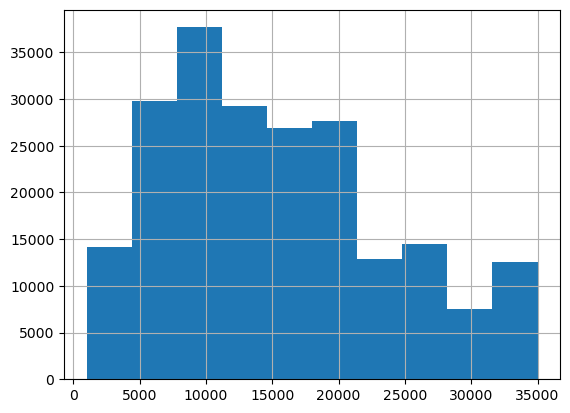

In [45]:
df['funded_amnt'].hist()

<Axes: xlabel='funded_amnt', ylabel='Density'>

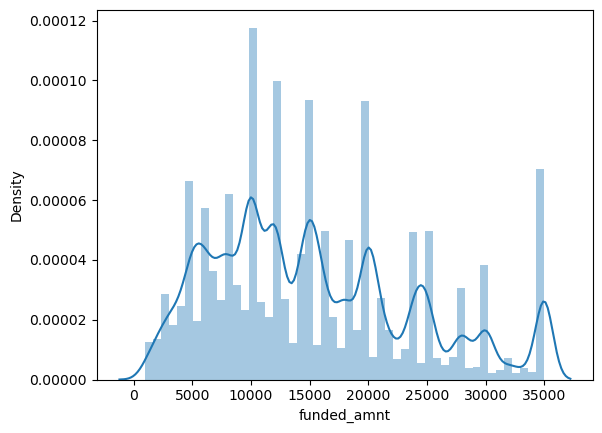

In [46]:
sns.distplot(df['funded_amnt'])

In [47]:
df['funded_amnt'].describe()

count    212999.000000
mean      15257.965530
std        8611.713377
min        1000.000000
25%        8500.000000
50%       14000.000000
75%       20000.000000
max       35000.000000
Name: funded_amnt, dtype: float64

<Axes: >

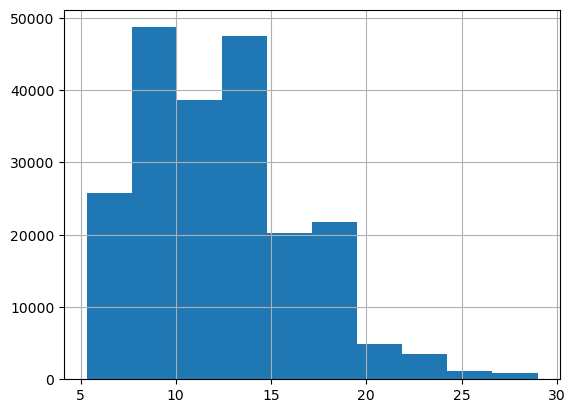

In [48]:
df['int_rate'].hist()

<Axes: xlabel='int_rate', ylabel='Density'>

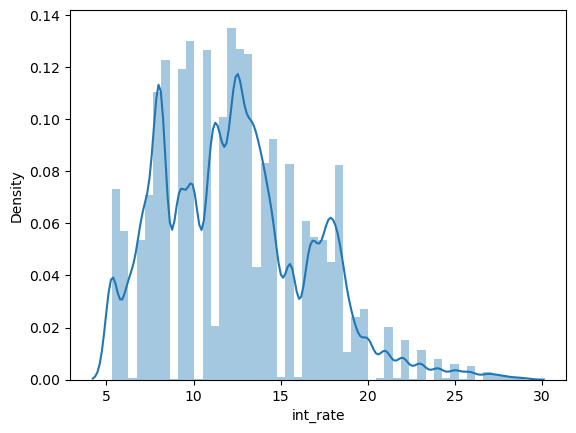

In [49]:
sns.distplot(df['int_rate'])

In [50]:
df['int_rate'].describe()

count    212999.000000
mean         12.401658
std           4.249365
min           5.320000
25%           9.170000
50%          12.290000
75%          14.650000
max          28.990000
Name: int_rate, dtype: float64

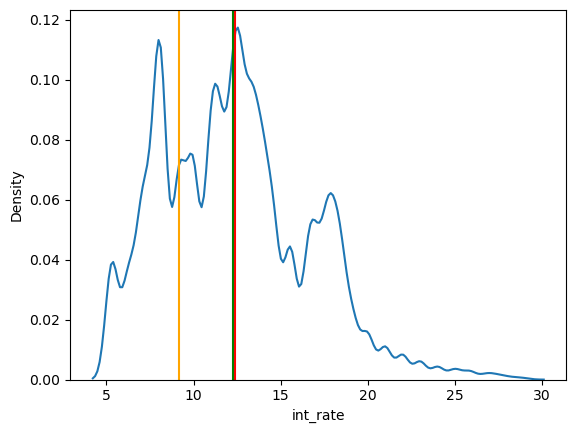

In [51]:
me = df['int_rate'].mean()
md = df['int_rate'].median()
mo = df['int_rate'].mode()[0]
#diplay mean. median and mode
sns.kdeplot(df['int_rate']);
plt.axvline(me,label='Mean',color='Red');
plt.axvline(md,label='Median',color='Green');
plt.axvline(mo,label='Mode',color='Orange');

<Axes: >

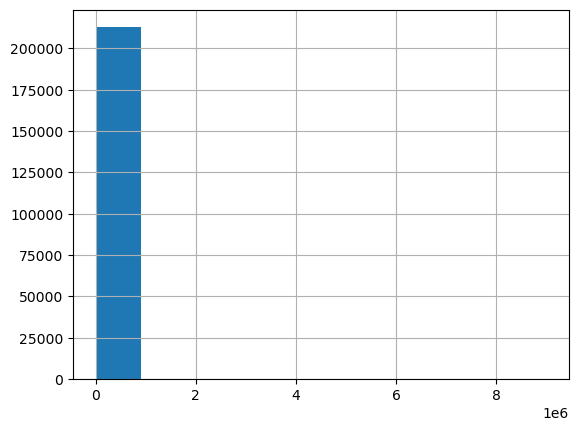

In [52]:
df['annual_inc'].hist()

<Axes: xlabel='annual_inc', ylabel='Density'>

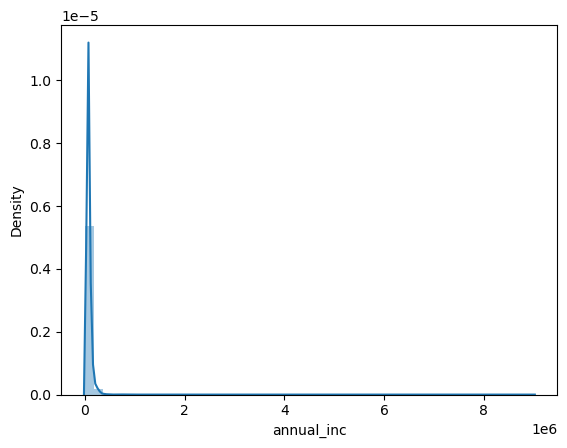

In [53]:
sns.distplot(df['annual_inc'])

In [54]:
df['annual_inc'].describe()

count    2.129990e+05
mean     7.780071e+04
std      8.188065e+04
min      0.000000e+00
25%      4.700000e+04
50%      6.500000e+04
75%      9.250000e+04
max      9.000000e+06
Name: annual_inc, dtype: float64

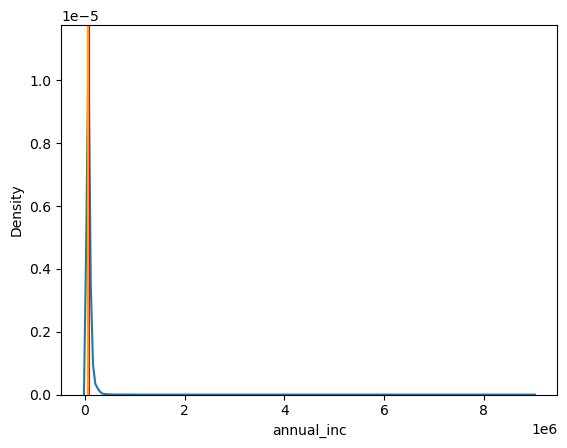

In [55]:
me = df['annual_inc'].mean()
md = df['annual_inc'].median()
mo = df['annual_inc'].mode()[0]
#diplay mean. median and mode
sns.kdeplot(df['annual_inc']);
plt.axvline(me,label='Mean',color='Red');
plt.axvline(md,label='Median',color='Green');
plt.axvline(mo,label='Mode',color='Orange');

<Axes: >

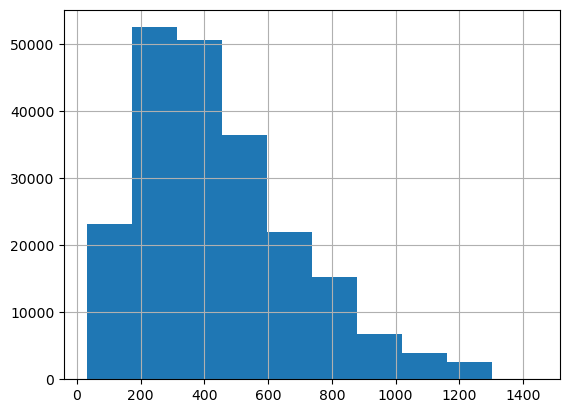

In [56]:
df['installment'].hist()

<Axes: xlabel='installment', ylabel='Density'>

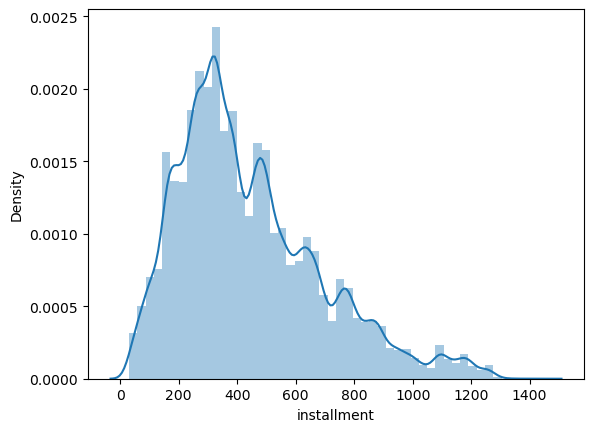

In [57]:
sns.distplot(df['installment'])

In [58]:
df['installment'].describe()

count    212999.000000
mean        440.842921
std         245.858646
min          30.120000
25%         262.230000
50%         382.870000
75%         578.790000
max        1445.460000
Name: installment, dtype: float64

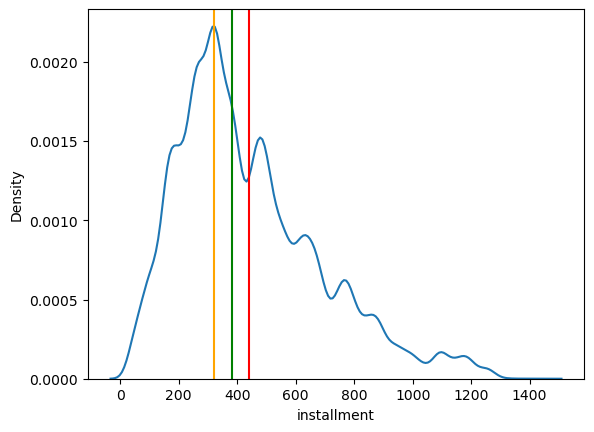

In [59]:
me = df['installment'].mean()
md = df['installment'].median()
mo = df['installment'].mode()[0]
#diplay mean. median and mode
sns.kdeplot(df['installment']);
plt.axvline(me,label='Mean',color='Red');
plt.axvline(md,label='Median',color='Green');
plt.axvline(mo,label='Mode',color='Orange');

#### Analysis of categoric variables

In [60]:
df['emp_title'].nunique()

69666

In [61]:
df = df.drop('emp_title', axis=1)

In [62]:
df['emp_length'] = df['emp_length'].str.extract('(\d+)').astype(float)

In [63]:
cols =df.select_dtypes(include=object).columns

In [64]:
cols

Index(['term', 'grade', 'home_ownership', 'verification_status', 'loan_status',
       'title', 'initial_list_status', 'application_type', 'issue_month',
       'earliest_cr_line_month', 'last_pymnt_d_month', 'next_pymnt_d_month',
       'last_credit_pull_d_month'],
      dtype='object')

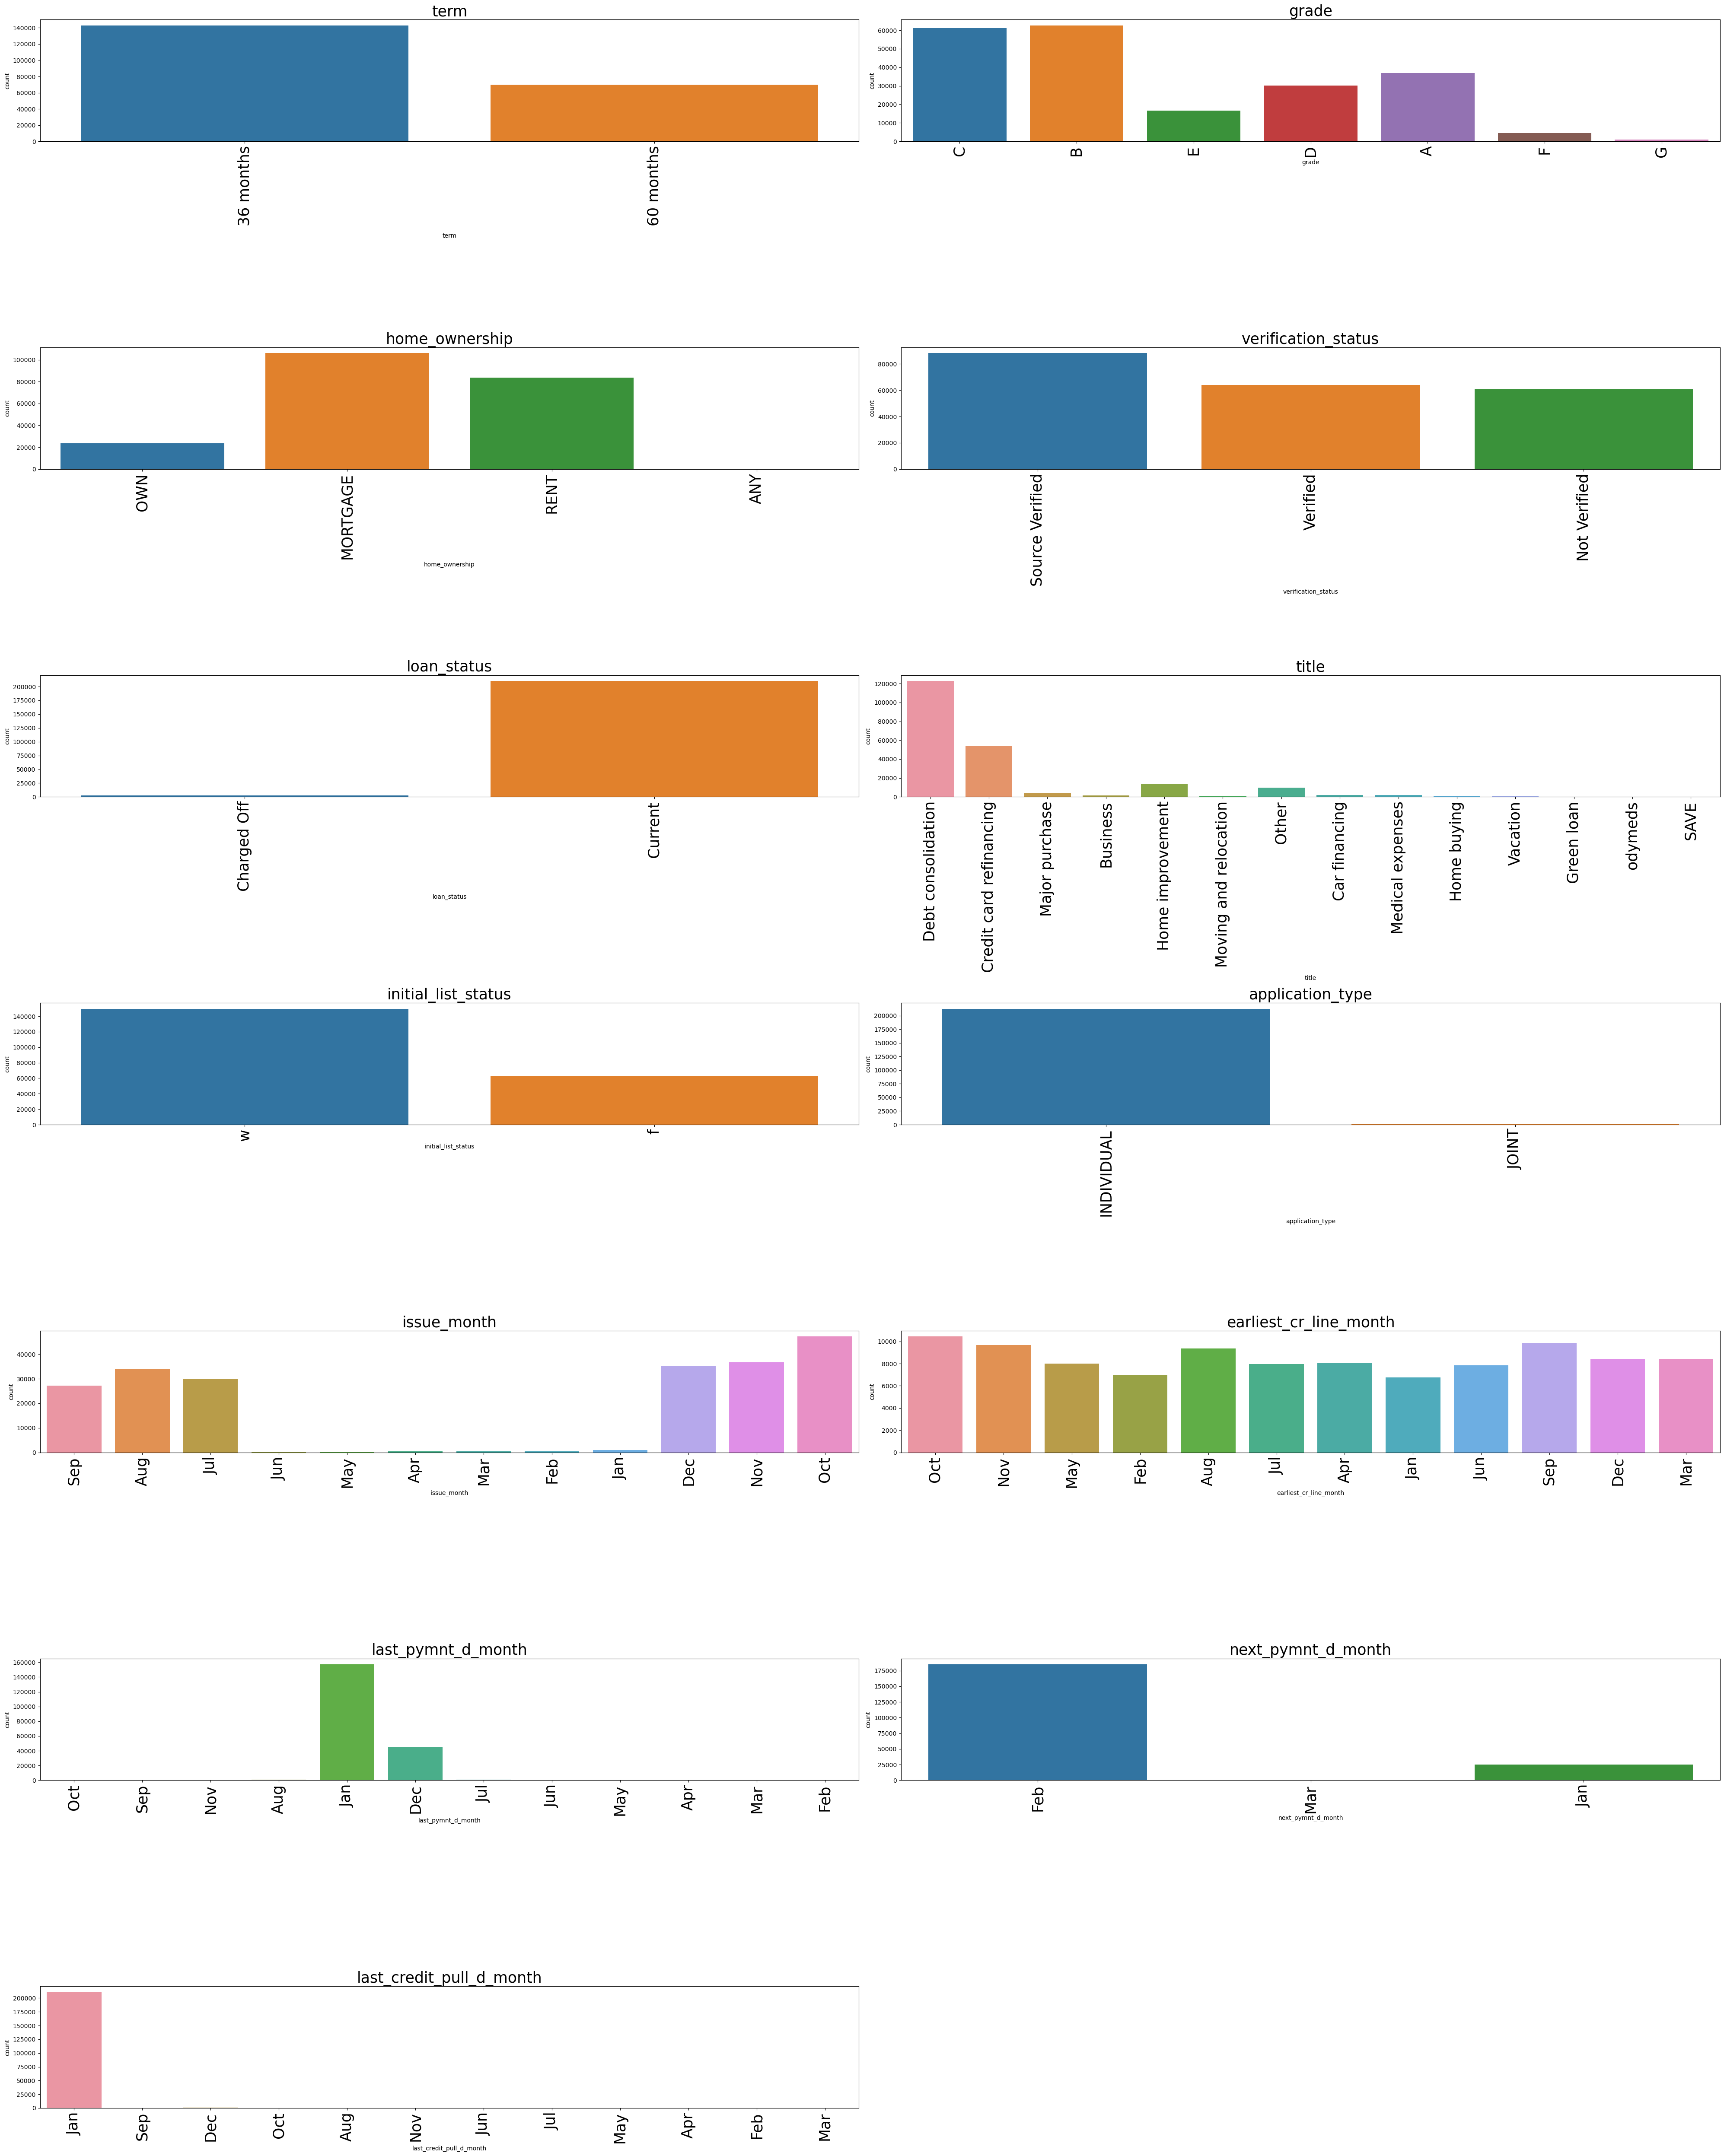

In [65]:
num_cols = 2  # Number of columns for subplots
num_rows = len(cols) // num_cols + (len(cols) % num_cols > 0)  # Calculate the number of rows

j = 1
plt.figure(figsize=(40, 50))
for i in cols:  
    plt.subplot(num_rows, num_cols, j)
    sns.countplot(x=df.loc[:, i])
    plt.title(i, fontsize=25)
    plt.xticks(rotation=90, fontsize=25)
    j += 1

plt.tight_layout()
plt.show()

### Bivariate Analysis

#### Numeric vs categoric

In [66]:
num_cols = ['loan_amnt','int_rate',
       'installment','annual_inc', 'dti', 'delinq_2yrs']

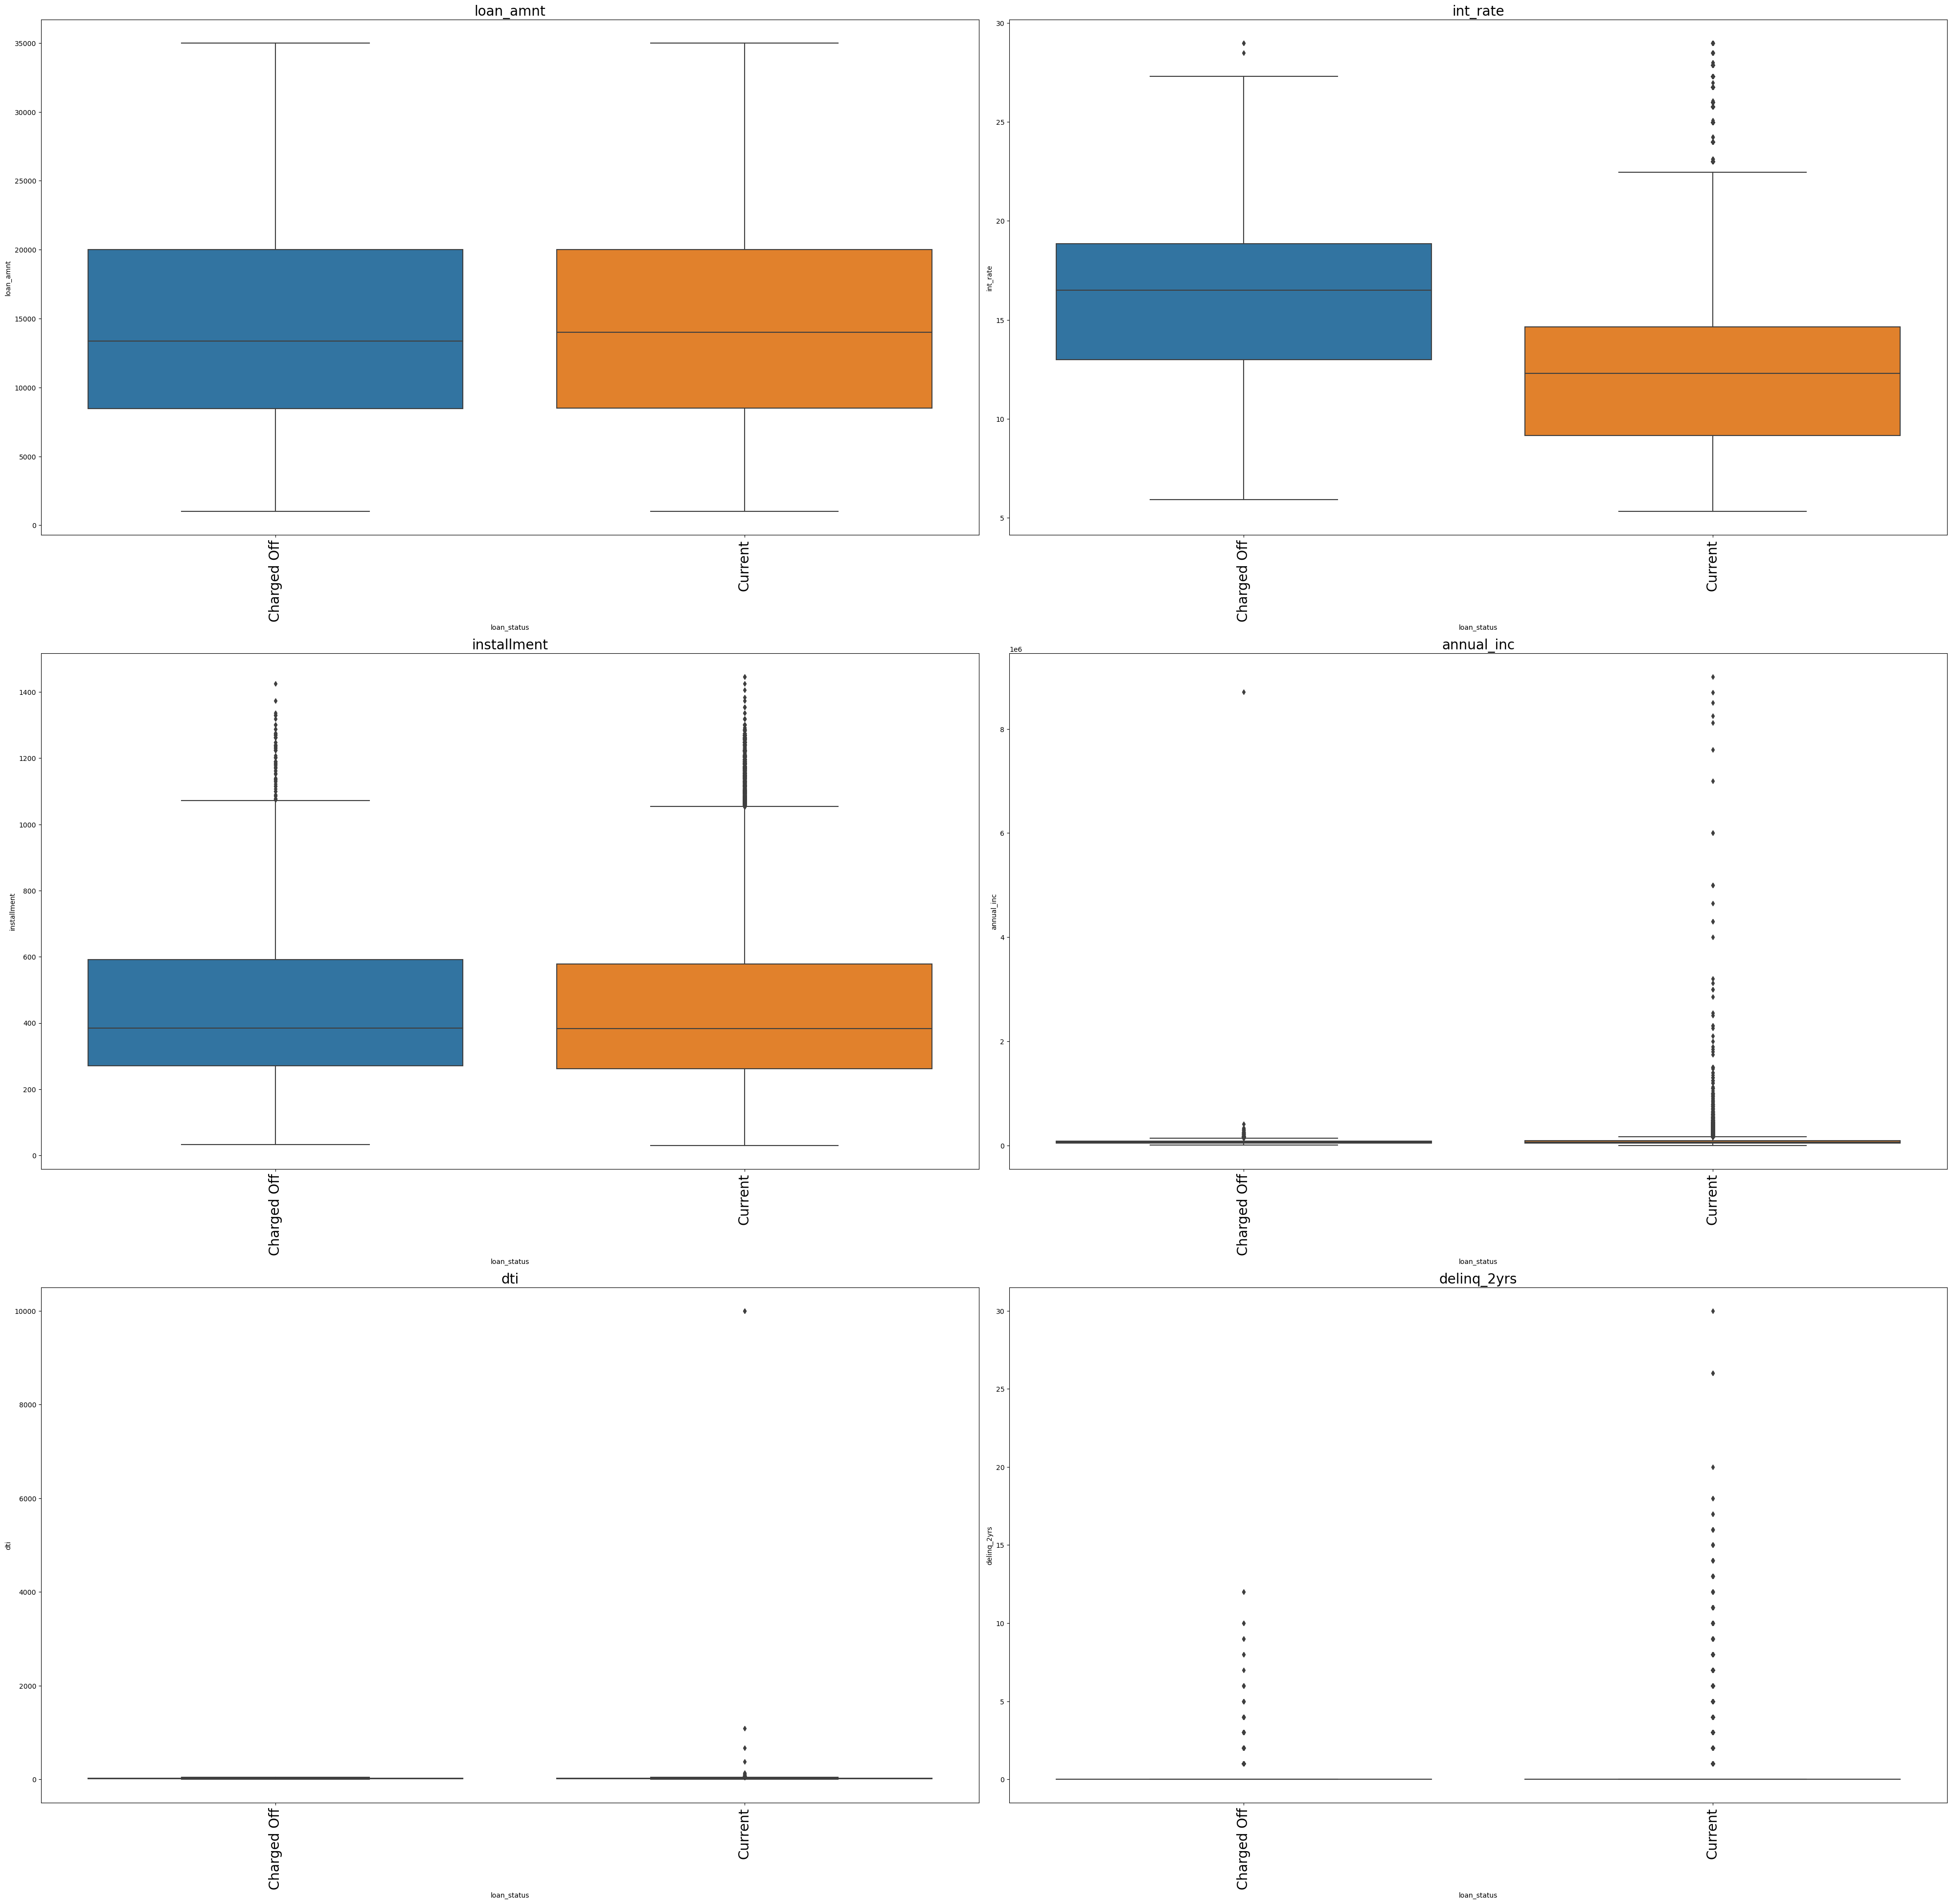

In [67]:
j=1
plt.figure(figsize=(40, 50))
for i in num_cols:
  plt.subplot(4,2,j)
  sns.boxplot(x= df['loan_status'] ,y=df.loc[:,i])
  plt.title(i, fontsize=20)
  j = j+1

  plt.xticks(rotation=90, fontsize=20)

plt.tight_layout()
plt.show()

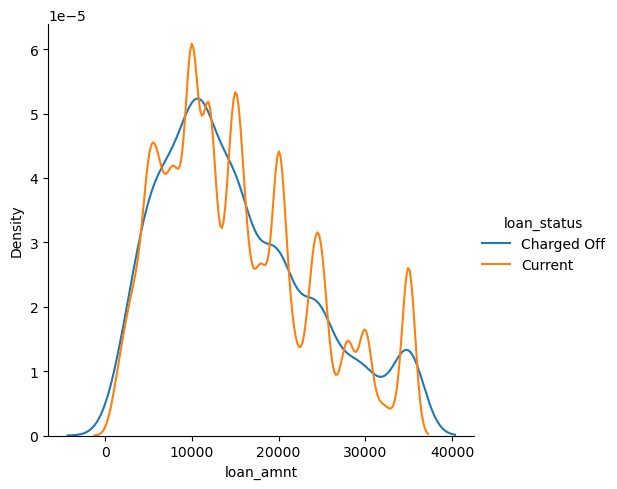

In [68]:
g = sns.FacetGrid(df, hue="loan_status",height=5)
g.map(sns.kdeplot, 'loan_amnt')
g.add_legend()

plt.show()

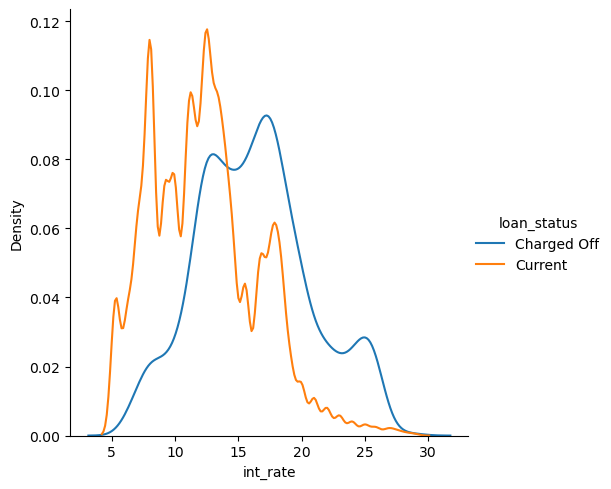

In [69]:
g = sns.FacetGrid(df, hue="loan_status",height=5)
g.map(sns.kdeplot, 'int_rate')
g.add_legend()

plt.show()

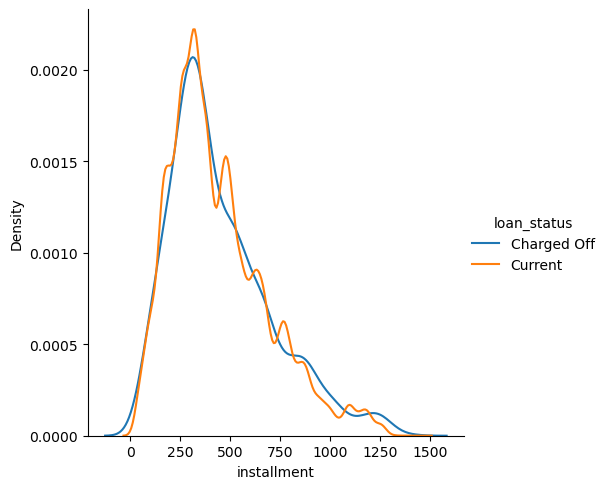

In [70]:
g = sns.FacetGrid(df, hue="loan_status",height=5)
g.map(sns.kdeplot, 'installment')
g.add_legend()

plt.show()

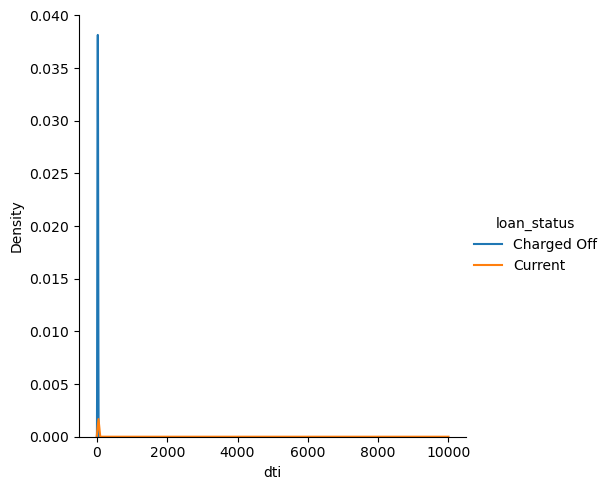

In [71]:
g = sns.FacetGrid(df, hue="loan_status",height=5)
g.map(sns.kdeplot, 'dti')
g.add_legend()

plt.show()

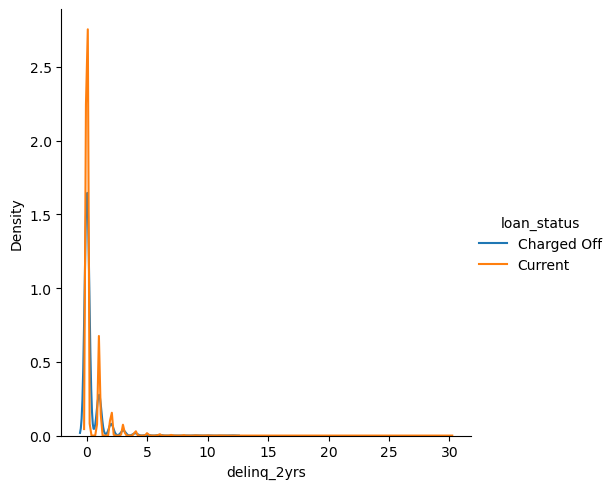

In [72]:
g = sns.FacetGrid(df, hue="loan_status",height=5)
g.map(sns.kdeplot, 'delinq_2yrs')
g.add_legend()

plt.show()

#### Categorical vs categorical

In [73]:
df.select_dtypes(include=object)

term grade home_ownership verification_status  loan_status  \
0        36 months     C            OWN     Source Verified  Charged Off   
1        36 months     C       MORTGAGE     Source Verified  Charged Off   
2        36 months     B       MORTGAGE     Source Verified  Charged Off   
3        36 months     B       MORTGAGE     Source Verified  Charged Off   
4        36 months     E           RENT            Verified  Charged Off   
...            ...   ...            ...                 ...          ...   
212994   36 months     C           RENT     Source Verified      Current   
212995   36 months     B           RENT        Not Verified      Current   
212996   60 months     E           RENT     Source Verified      Current   
212997   36 months     D       MORTGAGE            Verified      Current   
212998   36 months     C       MORTGAGE        Not Verified      Current   

                          title initial_list_status application_type  \
0            Debt consolidation                   w       INDIVIDUAL   
1            Debt consolidation                   w       INDIVIDUAL   
2            Debt consolidation                   f       INDIVIDUAL   
3       Credit card refinancing                   f       INDIVIDUAL   
4            Debt consolidation                   w       INDIVIDUAL   
...                         ...                 ...              ...   
212994       Debt consolidation                   w       INDIVIDUAL   
212995  Credit card refinancing                   w       INDIVIDUAL   
212996       Debt consolidation                   w       INDIVIDUAL   
212997                    Other                   w       INDIVIDUAL   
212998         Medical expenses                   w       INDIVIDUAL   

       issue_month earliest_cr_line_month last_pymnt_d_month  \
0              Sep                    NaN                NaN   
1              Sep                    NaN                Oct   
2              Sep                    NaN                Oct   
3              Sep                    Oct                Oct   
4              Sep                    Nov                Oct   
...            ...                    ...                ...   
212994         Jul                    NaN                Jan   
212995         Jul                    NaN                Dec   
212996         Jul                    NaN                Jan   
212997         Jul                    Mar                Jan   
212998         Jul                    NaN                Jan   

       next_pymnt_d_month last_credit_pull_d_month  
0                     NaN                      Jan  
1                     NaN                      Jan  
2                     NaN                      Jan  
3                     NaN                      Jan  
4                     NaN                      Jan  
...                   ...                      ...  
212994                Feb                      Jan  
212995                Feb                      Jan  
212996                Feb                      Jan  
212997                Feb                      Jan  
212998                Feb                      Jan  

[212999 rows x 13 columns]

In [74]:
cats = ['term','grade','home_ownership','application_type']

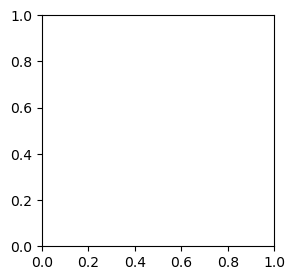

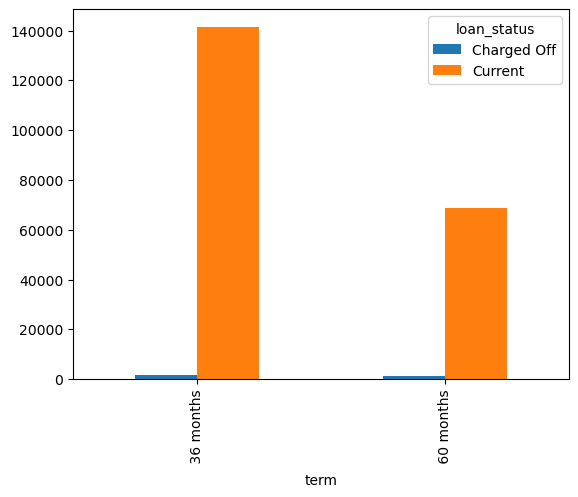

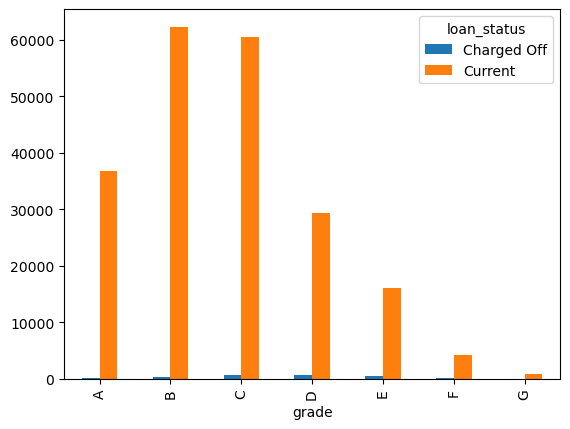

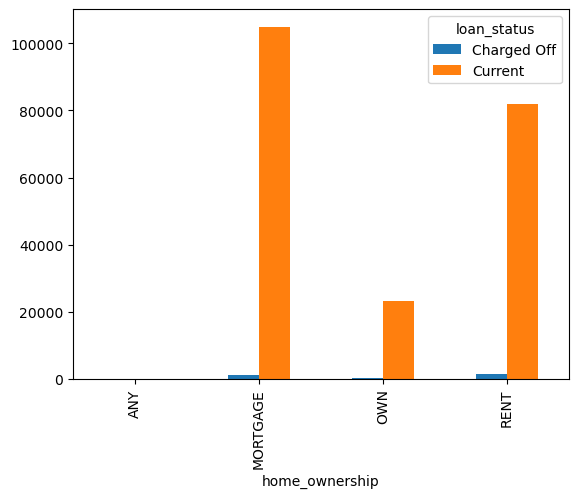

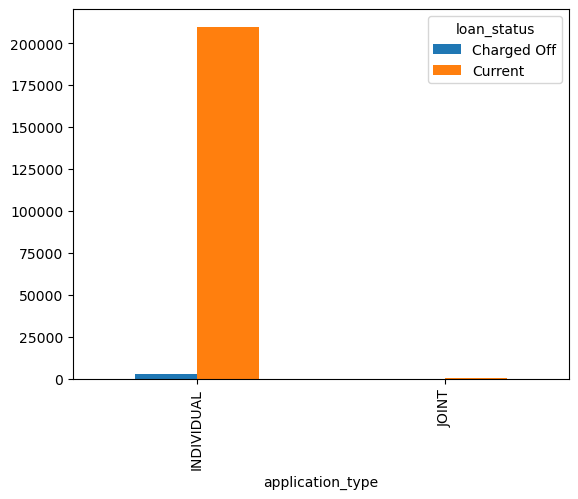

In [75]:
plt.subplots(figsize=(3,3))
for i in cats:
  pd.crosstab(df[i],df['loan_status']).plot(kind='bar')
plt.show()

### Multivariate Analysis

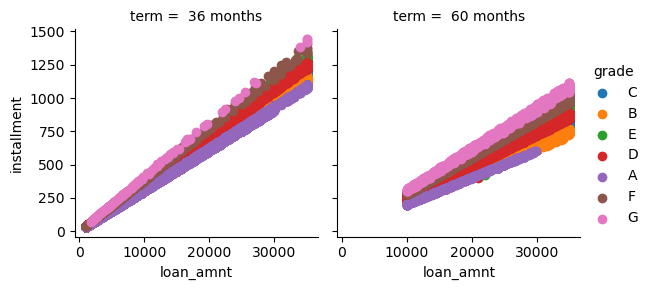

In [76]:
plot= sns.FacetGrid(df,col='term',hue='grade')
plot.map(plt.scatter,'loan_amnt','installment').add_legend()
plt.show()

In [77]:
df.drop(['id', 'member_id'],axis=1, inplace=True)

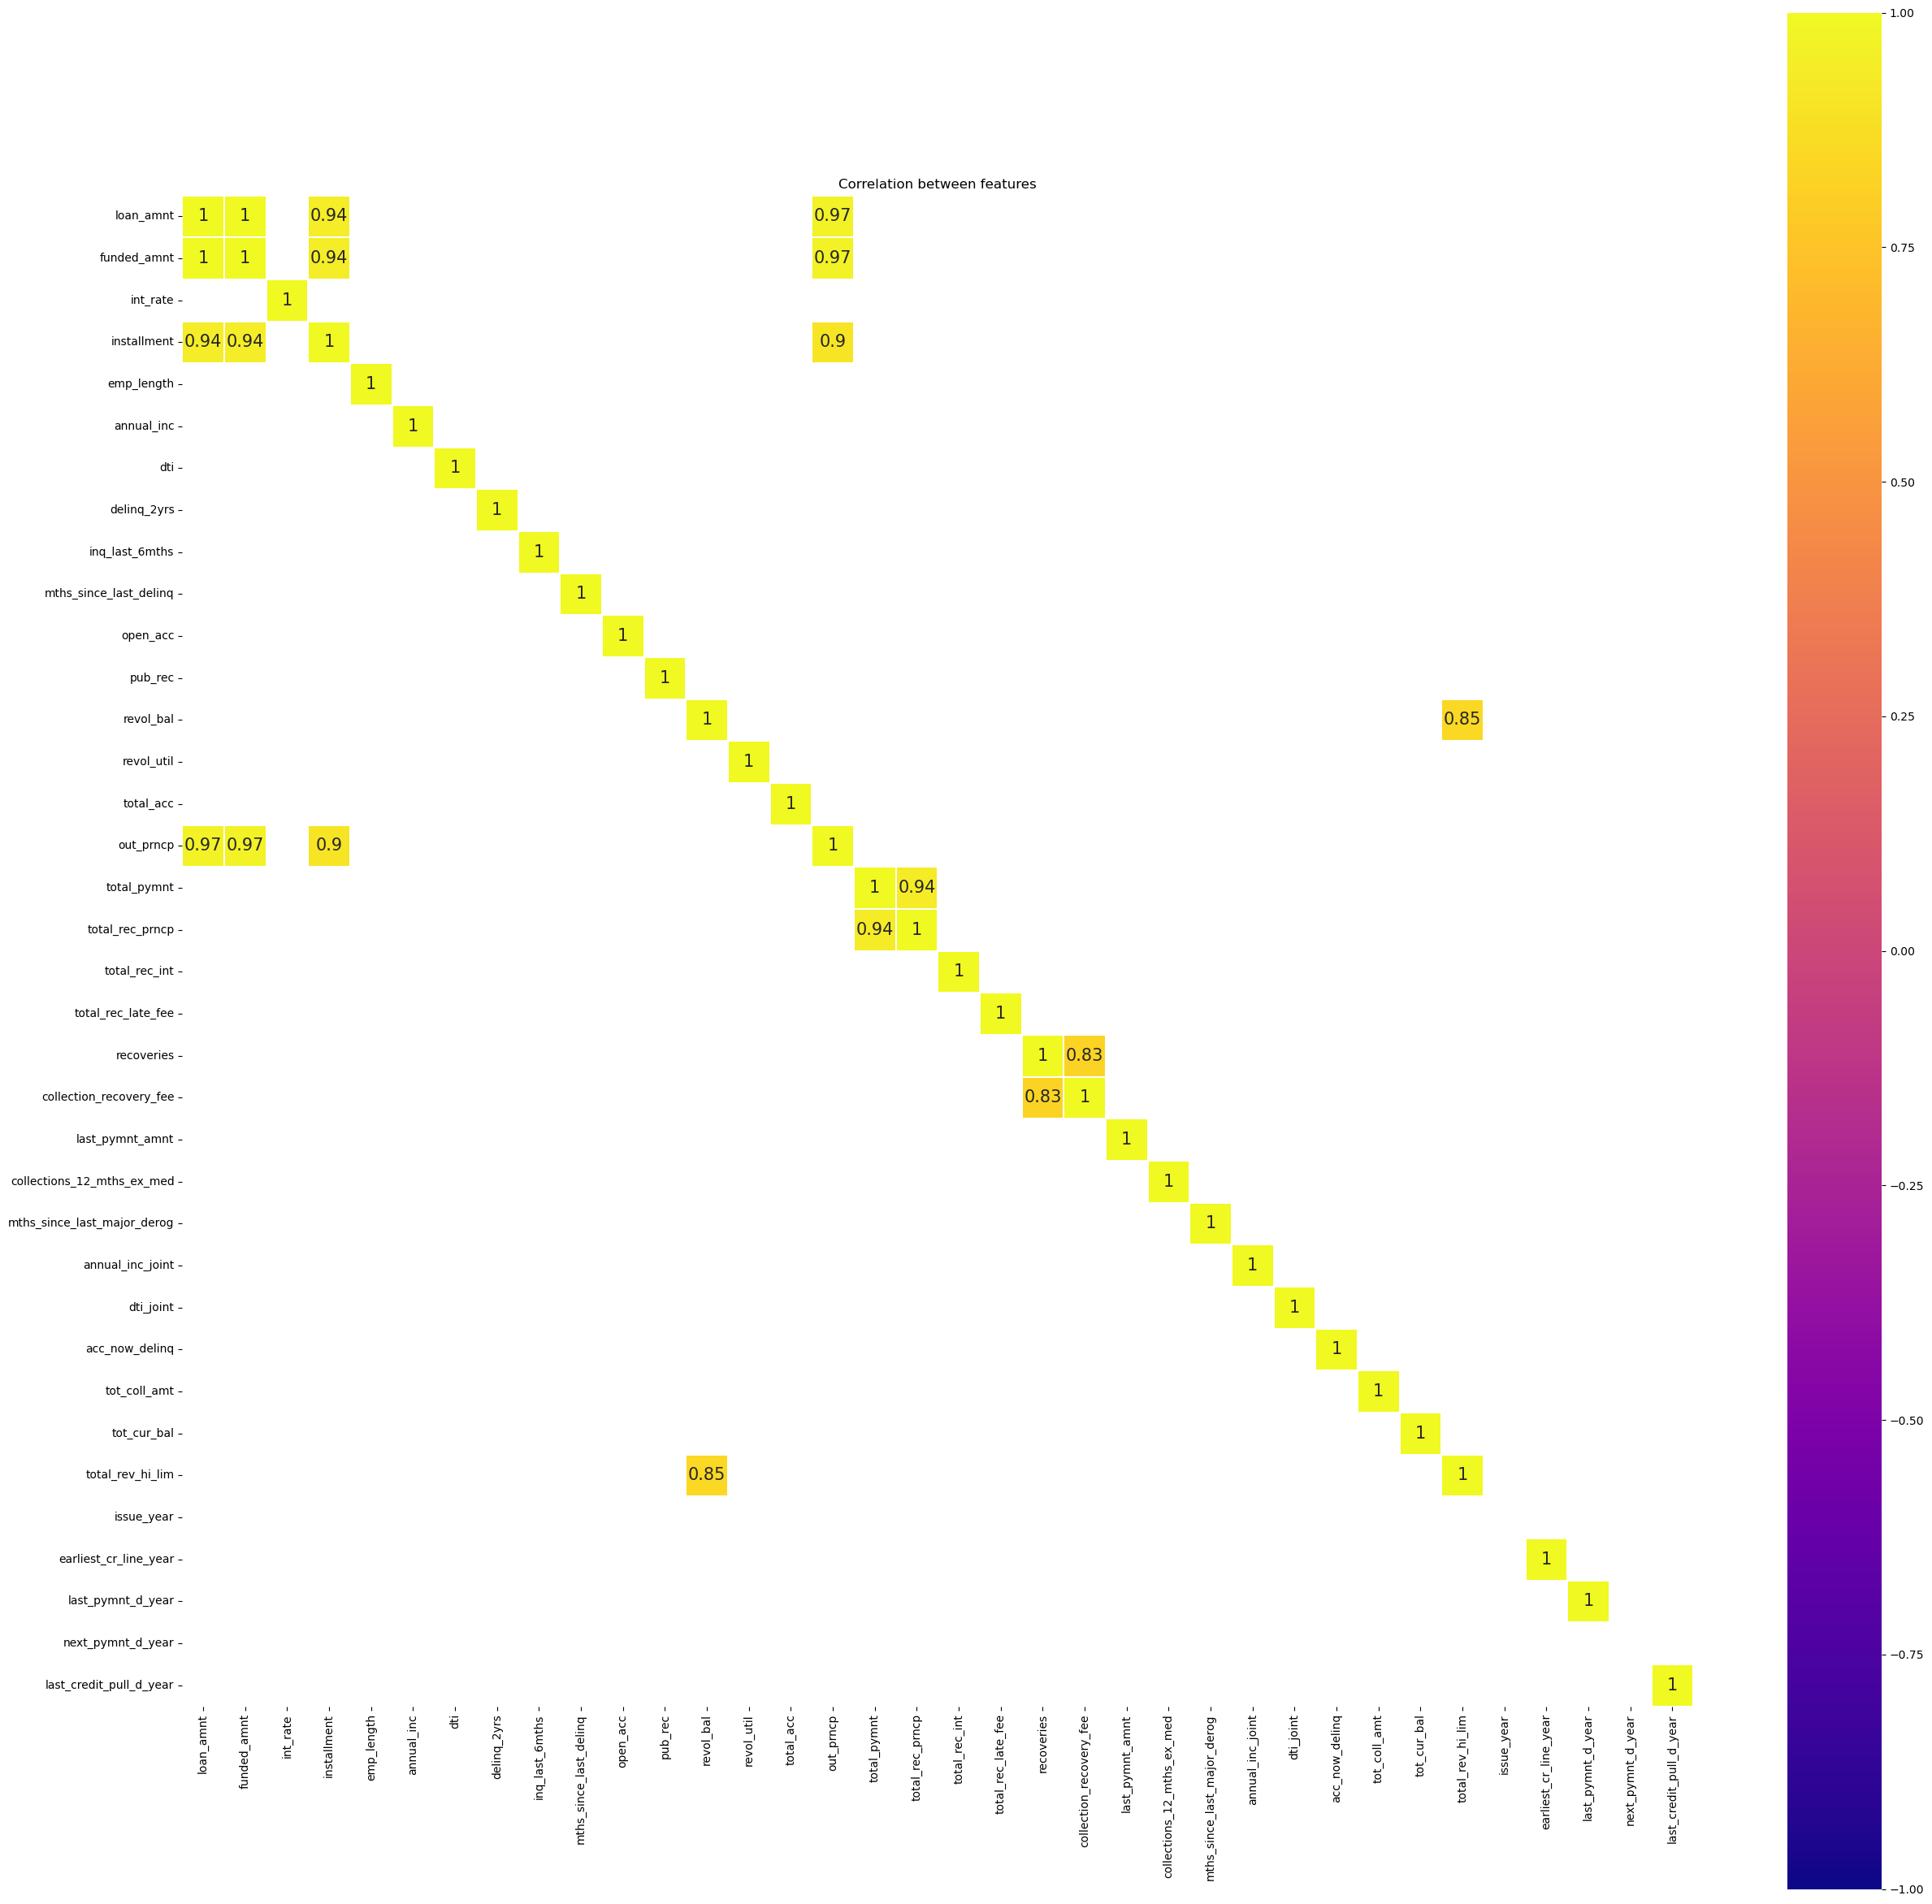

In [78]:
plt.figure(figsize=(30, 30))


sns.heatmap(df.corr()[(df.corr() >= 0.75) | (df.corr() <= -0.75)],
           cmap='plasma',
            vmax=1.0,
            vmin=-1.0,
            annot=True,
            linewidths=0.1,
            annot_kws={"size": 15},
            square=True);

plt.title('Correlation between features')
plt.show()

In [79]:
columns_to_drop=['funded_amnt','out_prncp', 'recoveries','total_rev_hi_lim', 'open_acc', 'total_rec_prncp']

In [80]:
df.drop(columns=columns_to_drop, inplace=True)

In [81]:
df.shape

(212999, 43)

### Null Value Treatment

In [82]:
df.isnull().sum()/len(df)*100

loan_amnt                       0.000000
term                            0.000000
int_rate                        0.000000
installment                     0.000000
grade                           0.000000
emp_length                      5.993925
home_ownership                  0.000000
annual_inc                      0.000000
verification_status             0.000000
loan_status                     0.000000
title                           0.007042
dti                             0.000000
delinq_2yrs                     0.000000
inq_last_6mths                  0.000000
mths_since_last_delinq         48.531214
pub_rec                         0.000000
revol_bal                       0.000000
revol_util                      0.038498
total_acc                       0.000000
initial_list_status             0.000000
total_pymnt                     0.000000
total_rec_int                   0.000000
total_rec_late_fee              0.000000
collection_recovery_fee         0.000000
last_pymnt_amnt 

In [83]:
df.drop(['annual_inc_joint','dti_joint'],axis=1,inplace=True)

In [84]:
df.isnull().sum().sort_values(ascending=False)

mths_since_last_major_derog    150634
earliest_cr_line_month         111217
earliest_cr_line_year          111217
mths_since_last_delinq         103371
emp_length                      12767
last_pymnt_d_month               8489
last_pymnt_d_year                8489
next_pymnt_d_month               2773
next_pymnt_d_year                2773
revol_util                         82
title                              15
last_credit_pull_d_month            7
last_credit_pull_d_year             7
acc_now_delinq                      0
collections_12_mths_ex_med          0
application_type                    0
issue_month                         0
tot_coll_amt                        0
tot_cur_bal                         0
issue_year                          0
collection_recovery_fee             0
last_pymnt_amnt                     0
loan_amnt                           0
total_rec_late_fee                  0
total_rec_int                       0
int_rate                            0
installment 

In [85]:
df['mths_since_last_delinq'].fillna(df['mths_since_last_delinq'].median(), inplace=True)

In [86]:
df['mths_since_last_major_derog'].fillna(df['mths_since_last_major_derog'].median(), inplace=True)

In [87]:
df['earliest_cr_line_month'].fillna(df['earliest_cr_line_month'].mode()[0],inplace=True)

In [88]:
df['earliest_cr_line_year'].fillna(df['earliest_cr_line_year'].median(), inplace=True)

In [89]:
df['emp_length'].fillna(df['emp_length'].median(), inplace=True)

In [90]:
df['last_pymnt_d_year'].fillna(df['last_pymnt_d_year'].median(), inplace=True)

In [91]:
df['last_pymnt_d_month'].fillna(df['last_pymnt_d_month'].mode()[0],inplace=True)
df['next_pymnt_d_month'].fillna(df['next_pymnt_d_month'].mode()[0],inplace=True)

In [92]:
df['next_pymnt_d_year'].fillna(df['next_pymnt_d_year'].median(), inplace=True)

In [93]:
df['revol_util'].fillna(df['revol_util'].median(), inplace=True)

In [94]:
df['title'].fillna(df['title'].mode()[0],inplace=True)

In [95]:
df['last_credit_pull_d_month'].fillna(df['last_credit_pull_d_month'].mode()[0],inplace=True)

In [96]:
df['last_credit_pull_d_year'].fillna(df['last_credit_pull_d_year'].median(), inplace=True)

In [97]:
df.isnull().sum().sort_values(ascending=False)

loan_amnt                      0
total_rec_int                  0
collection_recovery_fee        0
last_pymnt_amnt                0
collections_12_mths_ex_med     0
mths_since_last_major_derog    0
application_type               0
acc_now_delinq                 0
tot_coll_amt                   0
tot_cur_bal                    0
issue_year                     0
issue_month                    0
earliest_cr_line_year          0
earliest_cr_line_month         0
last_pymnt_d_year              0
last_pymnt_d_month             0
next_pymnt_d_year              0
next_pymnt_d_month             0
last_credit_pull_d_year        0
total_rec_late_fee             0
total_pymnt                    0
term                           0
initial_list_status            0
int_rate                       0
installment                    0
grade                          0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
loan_statu

### Outlier Treatment

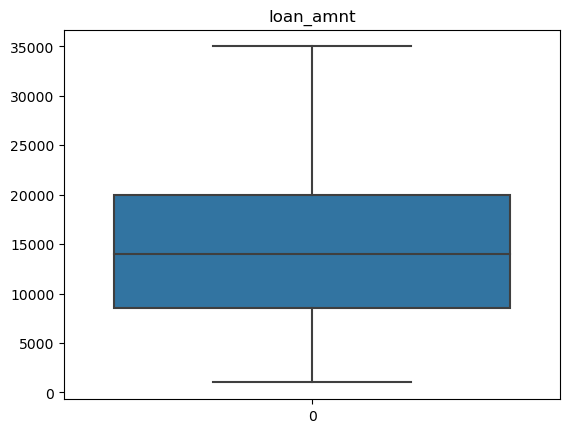

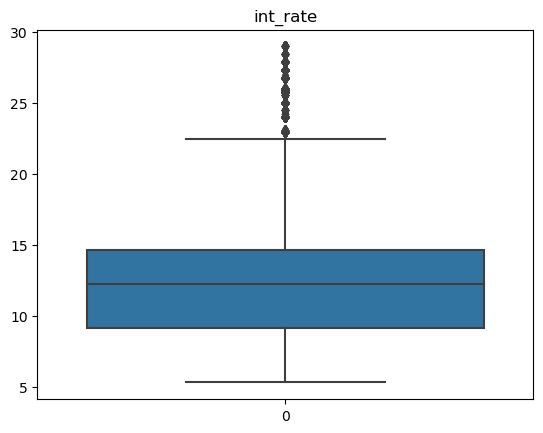

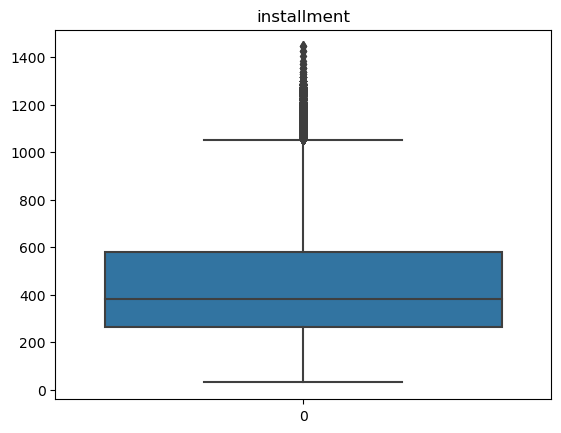

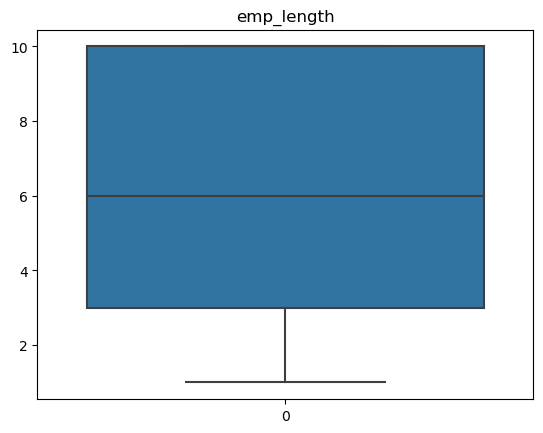

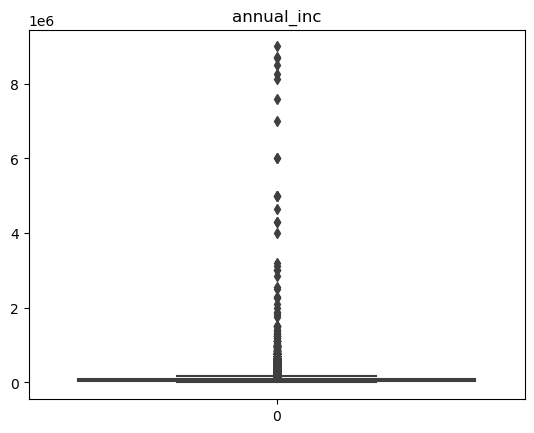

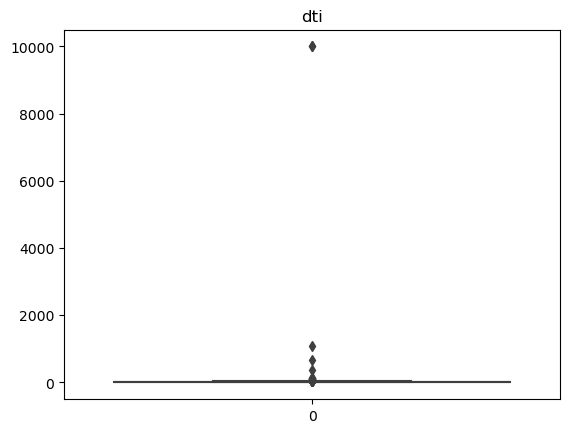

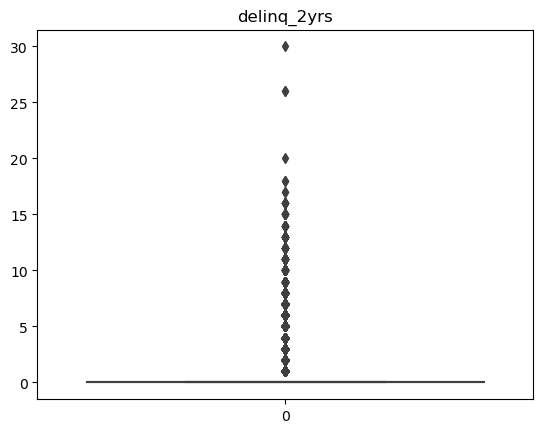

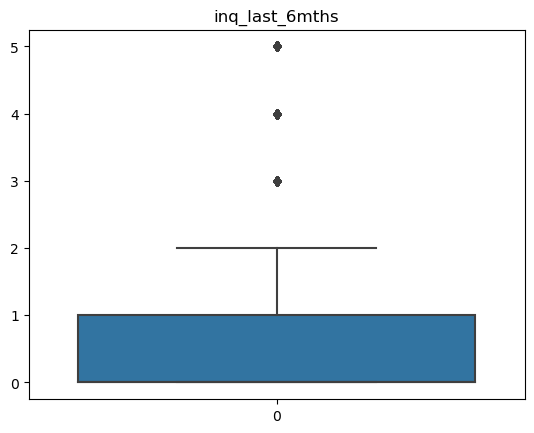

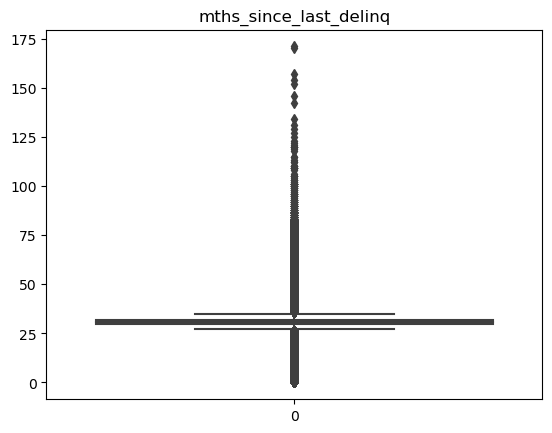

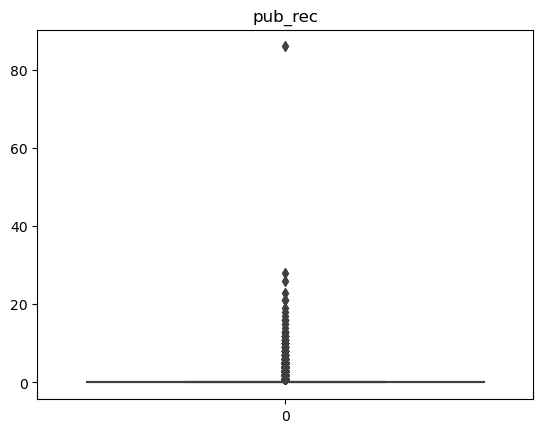

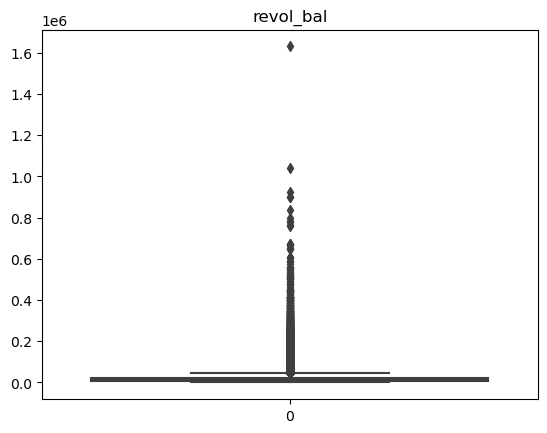

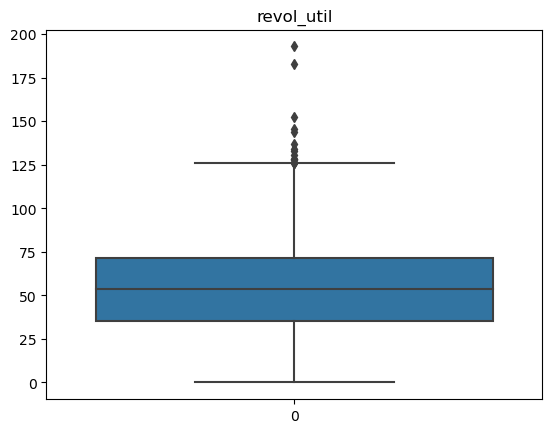

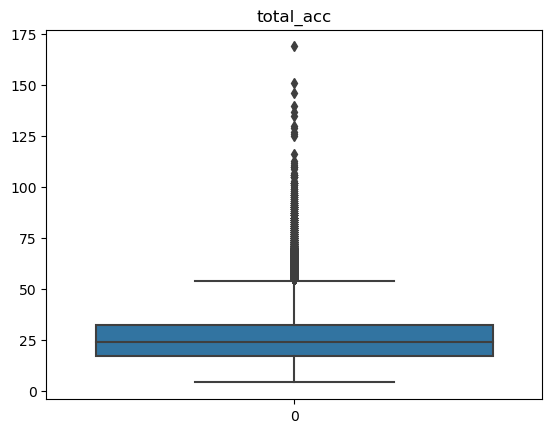

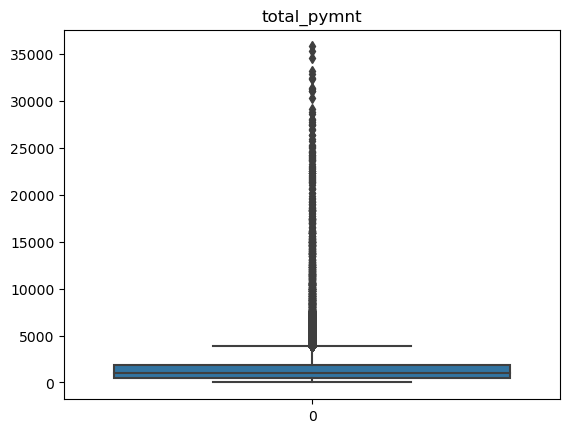

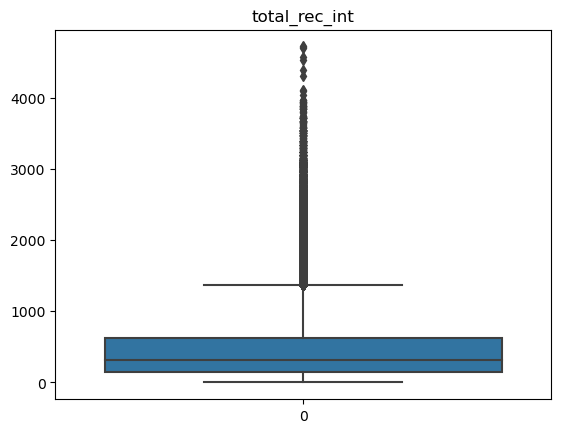

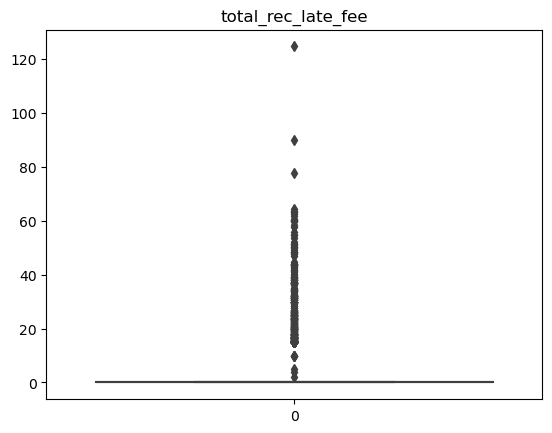

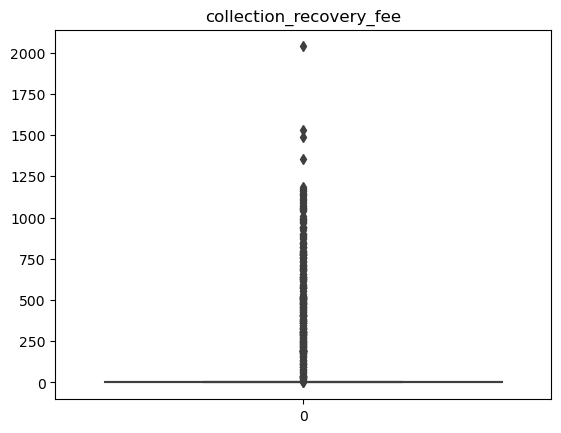

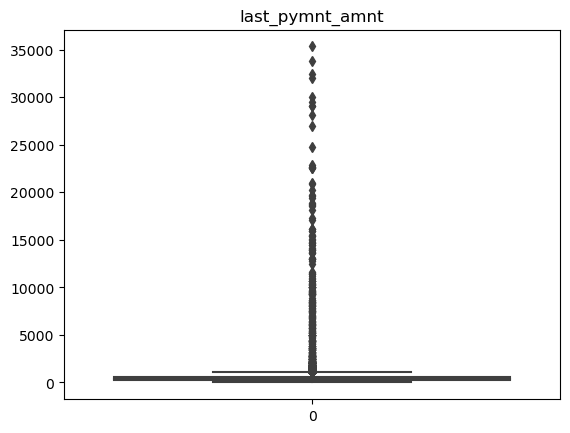

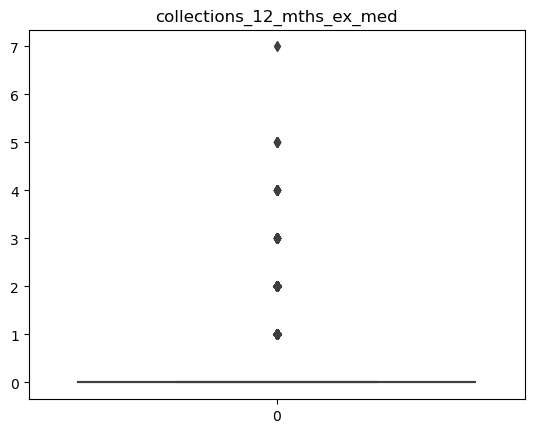

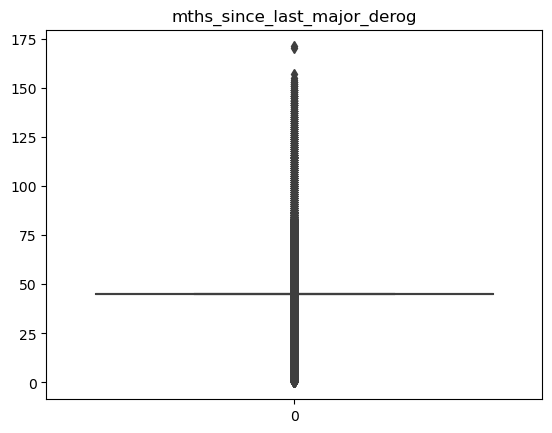

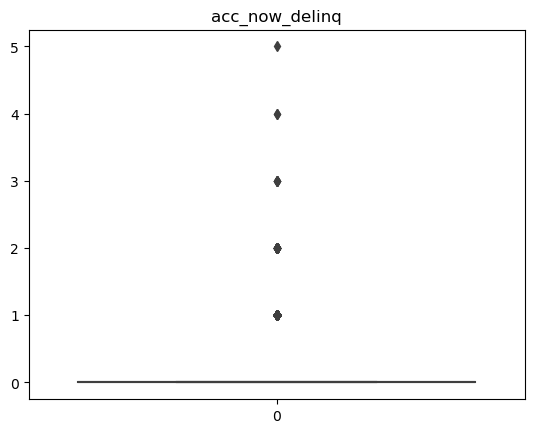

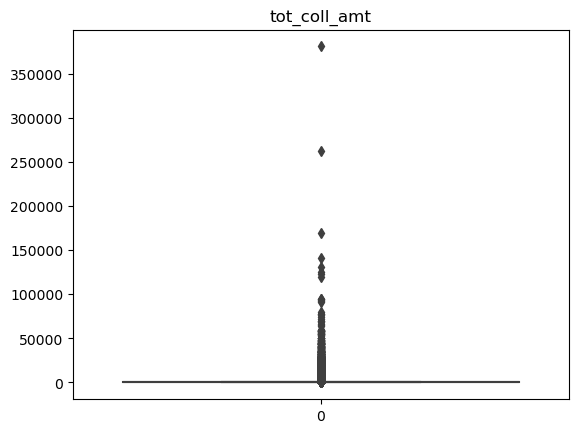

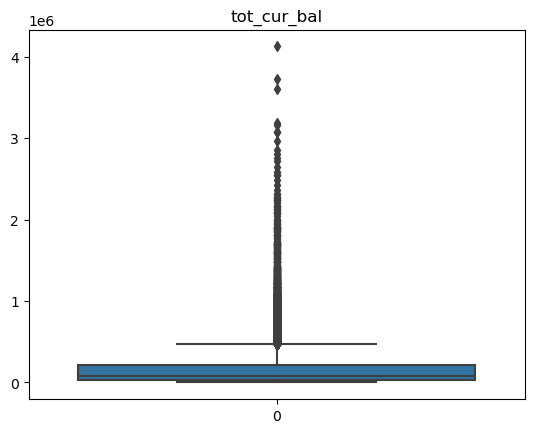

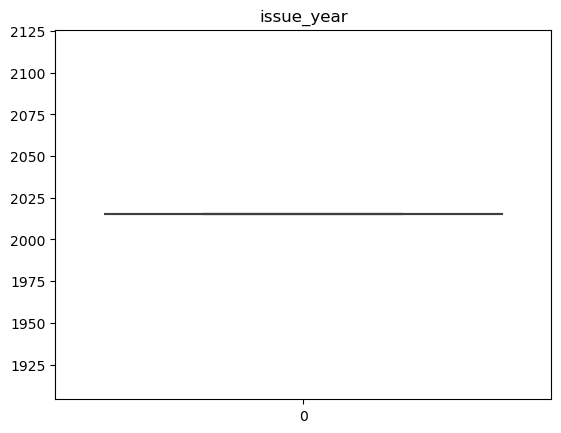

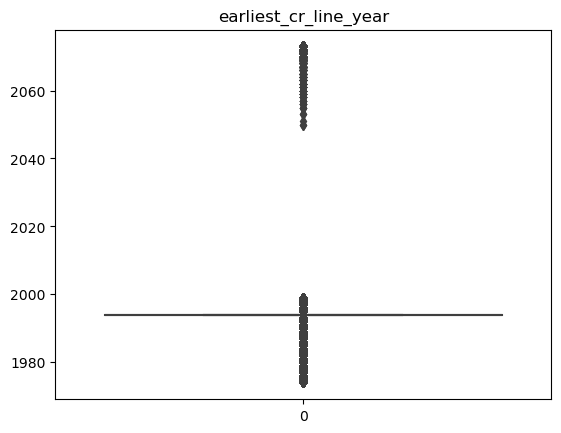

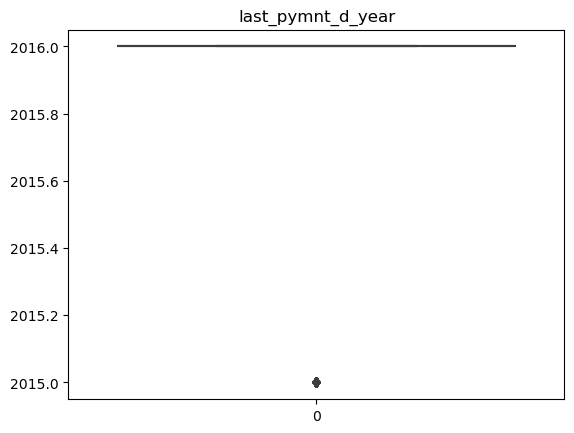

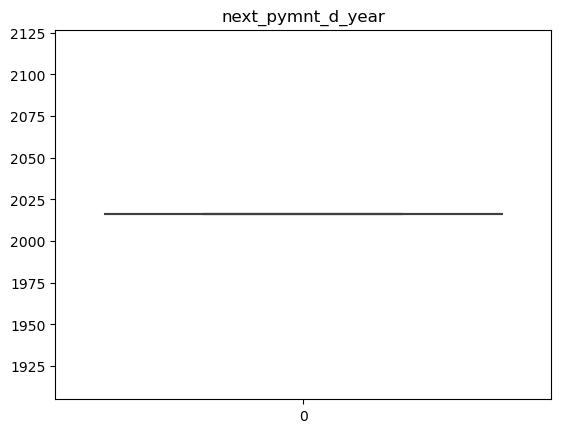

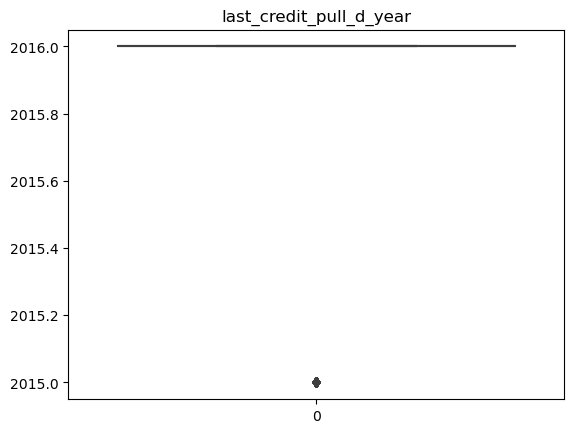

In [98]:
#Outliers
for i in df.select_dtypes(np.number):
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

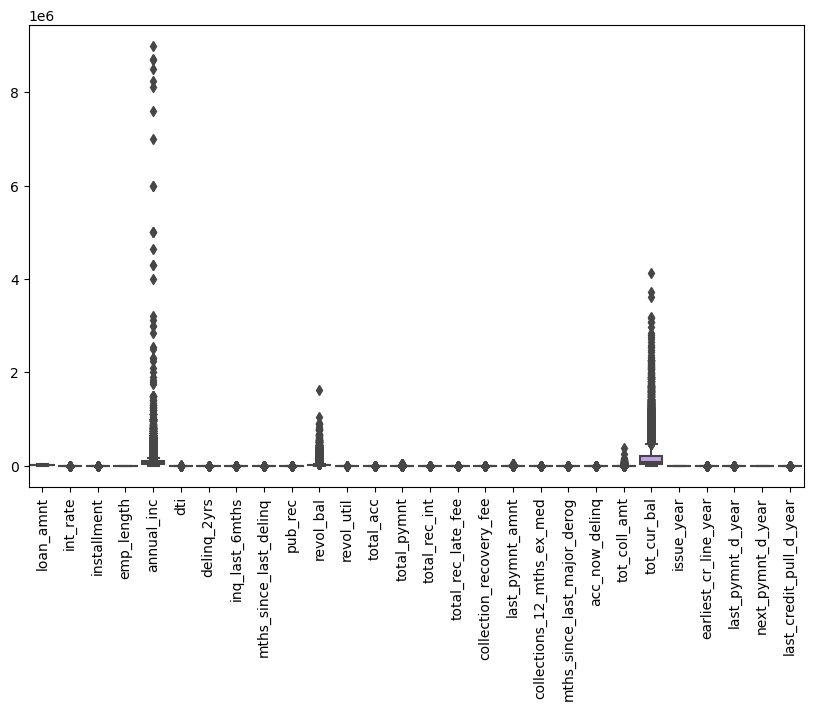

In [99]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

In [100]:
df.shape

(212999, 41)

### Scaling

In [101]:
df.select_dtypes(include=np.number).columns

Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_rec_int', 'total_rec_late_fee', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'issue_year', 'earliest_cr_line_year',
       'last_pymnt_d_year', 'next_pymnt_d_year', 'last_credit_pull_d_year'],
      dtype='object')

In [102]:
df['next_pymnt_d_year'].unique()

array([2016.])

In [103]:
df['issue_year'].unique()

array([2015], dtype=int64)

In [104]:
df.drop(['issue_year','next_pymnt_d_year'], axis=1,inplace=True)

In [105]:
df.shape

(212999, 39)

In [106]:
num_data= df.select_dtypes(include=np.number)
num_data

loan_amnt  int_rate  installment  emp_length  annual_inc    dti  \
0           20000     12.29       667.06         1.0    65000.00  20.72   
1           11000     12.69       369.00         7.0    40000.00  24.57   
2            7000      9.99       225.84         6.0    32000.00  32.41   
3           10000     10.99       327.34        10.0    48000.00  30.98   
4            9550     19.99       354.87         6.0    32376.00  32.54   
...           ...       ...          ...         ...         ...    ...   
212994      20000     13.33       677.07         5.0   120000.00   9.04   
212995       6000     11.53       197.95        10.0    25000.00   2.21   
212996      18000     19.19       468.82         1.0   120000.00   7.76   
212997       7050     15.61       246.51         6.0    18614.27  21.53   
212998       3500     13.99       119.61         7.0    46000.00  15.37   

        delinq_2yrs  inq_last_6mths  mths_since_last_delinq  pub_rec  ...  \
0                 0               1                    31.0        0  ...   
1                 0               0                    36.0        1  ...   
2                 0               1                    31.0        0  ...   
3                 0               2                    31.0        0  ...   
4                 0               3                    69.0        0  ...   
...             ...             ...                     ...      ...  ...   
212994            0               0                    45.0        0  ...   
212995            0               2                    31.0        1  ...   
212996            0               1                    30.0        0  ...   
212997            1               0                     5.0        0  ...   
212998            0               1                    47.0        0  ...   

        collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  \
0                           0.0             0.00                           0   
1                           0.0         10059.00                           0   
2                           0.0           225.84                           0   
3                           0.0           327.34                           0   
4                           0.0           354.87                           0   
...                         ...              ...                         ...   
212994                      0.0           700.00                           0   
212995                      0.0           197.95                           0   
212996                      0.0           468.82                           1   
212997                      0.0           246.51                           0   
212998                      0.0           119.61                           0   

        mths_since_last_major_derog  acc_now_delinq  tot_coll_amt  \
0                              45.0               0             0   
1                              79.0               0           332   
2                              45.0               0             0   
3                              45.0               0             0   
4                              69.0               0             0   
...                             ...             ...           ...   
212994                         45.0               0           574   
212995                         60.0               0             0   
212996                         45.0               0          4404   
212997                         45.0               0             0   
212998                         74.0               0             0   

        tot_cur_bal  earliest_cr_line_year  last_pymnt_d_year  \
0             52303                 1994.0             2016.0   
1            175731                 1994.0             2015.0   
2            202012                 1994.0             2015.0   
3            108235                 1999.0             2015.0   
4             45492                 1999.0             2015.0   
..

In [107]:
cat_data= df.select_dtypes(include=object)


In [108]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

num_scaled=ss.fit_transform(num_data)
num_scaled= pd.DataFrame(num_scaled,columns=num_data.columns)


In [109]:
num_scaled

loan_amnt  int_rate  installment  emp_length  annual_inc       dti  \
0        0.550651 -0.026276     0.920112   -1.468642   -0.156334  0.042573   
1       -0.494440  0.067856    -0.292213    0.256301   -0.461657  0.163165   
2       -0.958925 -0.567535    -0.874500   -0.031189   -0.559361  0.408735   
3       -0.610561 -0.332205    -0.461660    1.118773   -0.363954  0.363943   
4       -0.662816  1.785763    -0.349685   -0.031189   -0.554769  0.412807   
...           ...       ...          ...         ...         ...       ...   
212994   0.550651  0.218467     0.960827   -0.318680    0.515377 -0.323275   
212995  -1.075046 -0.205127    -0.987940    1.118773   -0.644851 -0.537209   
212996   0.318408  1.597500     0.113794   -1.468642    0.515377 -0.363368   
212997  -0.953119  0.755019    -0.790427   -0.031189   -0.722840  0.067945   
212998  -1.365349  0.373784    -1.306579    0.256301   -0.388380 -0.125003   

        delinq_2yrs  inq_last_6mths  mths_since_last_delinq   pub_rec  ...  \
0         -0.377181        0.505032               -0.102693 -0.353802  ...   
1         -0.377181       -0.655429                0.212065  1.155774  ...   
2         -0.377181        0.505032               -0.102693 -0.353802  ...   
3         -0.377181        1.665492               -0.102693 -0.353802  ...   
4         -0.377181        2.825953                2.289468 -0.353802  ...   
...             ...             ...                     ...       ...  ...   
212994    -0.377181       -0.655429                0.778630 -0.353802  ...   
212995    -0.377181        1.665492               -0.102693  1.155774  ...   
212996    -0.377181        0.505032               -0.165644 -0.353802  ...   
212997     0.708351       -0.655429               -1.739435 -0.353802  ...   
212998    -0.377181        0.505032                0.904533 -0.353802  ...   

        collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  \
0                     -0.031264        -0.967782                   -0.134005   
1                     -0.031264        21.351838                   -0.134005   
2                     -0.031264        -0.466672                   -0.134005   
3                     -0.031264        -0.241456                   -0.134005   
4                     -0.031264        -0.180371                   -0.134005   
...                         ...              ...                         ...   
212994                -0.031264         0.585428                   -0.134005   
212995                -0.031264        -0.528556                   -0.134005   
212996                -0.031264         0.072469                    6.057538   
212997                -0.031264        -0.420808                   -0.134005   
212998                -0.031264        -0.702382                   -0.134005   

        mths_since_last_major_derog  acc_now_delinq  tot_coll_amt  \
0                         -0.011189       -0.070558     -0.118253   
1                          2.763087       -0.070558      0.031622   
2                         -0.011189       -0.070558     -0.118253   
3                         -0.011189       -0.070558     -0.118253   
4                          1.947123       -0.070558     -0.118253   
...                             ...             ...           ...   
212994                    -0.011189       -0.070558      0.140868   
212995                     1.212756       -0.070558     -0.118253   
212996                    -0.011189       -0.070558      1.869845   
212997                    -0.011189       -0.070558     -0.118253   
212998                     2.355105       -0.070558     -0.118253   

        tot_cur_bal  earliest_cr_line_year  last_pymnt_d_year  \
0         -0.569562               0.003952           0.533592   
1          0.217224               0.003952          -1.874090   
2          0.384751               0.003952          -1.874090   
3         -0.213026               0.639097          -1.874090   
4         -0.612978

### Encoding

In [110]:
cat_data.columns

Index(['term', 'grade', 'home_ownership', 'verification_status', 'loan_status',
       'title', 'initial_list_status', 'application_type', 'issue_month',
       'earliest_cr_line_month', 'last_pymnt_d_month', 'next_pymnt_d_month',
       'last_credit_pull_d_month'],
      dtype='object')

In [111]:
df['term'] = df['term'].apply(lambda x: 0 if x == '36 months' else 1)
df['loan_status'] = df['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)
df['application_type'] = df['application_type'].apply(lambda x: 0 if x == 'JOINT' else 1)
df['initial_list_status'] = df['initial_list_status'].apply(lambda x: 0 if x == 'w' else 1)

In [112]:
cols= df.select_dtypes(include=object).columns
cols

Index(['grade', 'home_ownership', 'verification_status', 'title',
       'issue_month', 'earliest_cr_line_month', 'last_pymnt_d_month',
       'next_pymnt_d_month', 'last_credit_pull_d_month'],
      dtype='object')

In [113]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in cols:
    df[i] = le.fit_transform(df[i])

In [114]:
df.head()

loan_amnt  term  int_rate  installment  grade  emp_length  home_ownership  \
0      20000     1     12.29       667.06      2         1.0               2   
1      11000     1     12.69       369.00      2         7.0               1   
2       7000     1      9.99       225.84      1         6.0               1   
3      10000     1     10.99       327.34      1        10.0               1   
4       9550     1     19.99       354.87      4         6.0               3   

   annual_inc  verification_status  loan_status  ...  tot_coll_amt  \
0     65000.0                    1            1  ...             0   
1     40000.0                    1            1  ...           332   
2     32000.0                    1            1  ...             0   
3     48000.0                    1            1  ...             0   
4     32376.0                    2            1  ...             0   

   tot_cur_bal  issue_month  earliest_cr_line_year  earliest_cr_line_month  \
0        52303           11                 1994.0                      10   
1       175731           11                 1994.0                      10   
2       202012           11                 1994.0                      10   
3       108235           11                 1999.0                      10   
4        45492           11                 1999.0                       9   

   last_pymnt_d_year  last_pymnt_d_month  next_pymnt_d_month  \
0             2016.0                   4                   0   
1             2015.0                  10                   0   
2             2015.0                  10                   0   
3             2015.0                  10                   0   
4             2015.0                  10                   0   

   last_credit_pull_d_year  last_credit_pull_d_month  
0                   2016.0                         4  
1                   2016.0                         4  
2                   2016.0                         4  
3                   2016.0                         4  
4                   2016.0                         4  

[5 rows x 39 columns]

In [115]:
df.dtypes

loan_amnt                        int64
term                             int64
int_rate                       float64
installment                    float64
grade                            int32
emp_length                     float64
home_ownership                   int32
annual_inc                     float64
verification_status              int32
loan_status                      int64
title                            int32
dti                            float64
delinq_2yrs                      int64
inq_last_6mths                   int64
mths_since_last_delinq         float64
pub_rec                          int64
revol_bal                        int64
revol_util                     float64
total_acc                        int64
initial_list_status              int64
total_pymnt                    float64
total_rec_int                  float64
total_rec_late_fee             float64
collection_recovery_fee        float64
last_pymnt_amnt                float64
collections_12_mths_ex_me

### Train Test Split

In [116]:
columns = ['term', 'grade', 'home_ownership', 'verification_status', 'loan_status',
       'title', 'initial_list_status', 'application_type', 'issue_month',
       'earliest_cr_line_month', 'last_pymnt_d_month', 'next_pymnt_d_month',
       'last_credit_pull_d_month']
non_num_cols = df[columns]
# Concatenating the non-numeric columns with the scaled numerical columns
scaled_df = pd.concat([non_num_cols, num_scaled], axis=1)

In [117]:
cat_data.columns

Index(['term', 'grade', 'home_ownership', 'verification_status', 'loan_status',
       'title', 'initial_list_status', 'application_type', 'issue_month',
       'earliest_cr_line_month', 'last_pymnt_d_month', 'next_pymnt_d_month',
       'last_credit_pull_d_month'],
      dtype='object')

In [118]:
scaled_df

term  grade  home_ownership  verification_status  loan_status  title  \
0          1      2               2                    1            1      3   
1          1      2               1                    1            1      3   
2          1      1               1                    1            1      3   
3          1      1               1                    1            1      2   
4          1      4               3                    2            1      3   
...      ...    ...             ...                  ...          ...    ...   
212994     1      2               3                    1            0      3   
212995     1      1               3                    0            0      2   
212996     1      4               3                    1            0      3   
212997     1      3               1                    2            0     10   
212998     1      2               1                    0            0      8   

        initial_list_status  application_type  issue_month  \
0                         0                 1           11   
1                         0                 1           11   
2                         1                 1           11   
3                         1                 1           11   
4                         0                 1           11   
...                     ...               ...          ...   
212994                    0                 1            5   
212995                    0                 1            5   
212996                    0                 1            5   
212997                    0                 1            5   
212998                    0                 1            5   

        earliest_cr_line_month  ...  collection_recovery_fee  last_pymnt_amnt  \
0                           10  ...                -0.031264        -0.967782   
1                           10  ...                -0.031264        21.351838   
2                           10  ...                -0.031264        -0.466672   
3                           10  ...                -0.031264        -0.241456   
4                            9  ...                -0.031264        -0.180371   
...                        ...  ...                      ...              ...   
212994                      10  ...                -0.031264         0.585428   
212995                      10  ...                -0.031264        -0.528556   
212996                      10  ...                -0.031264         0.072469   
212997                       7  ...                -0.031264        -0.420808   
212998                      10  ...                -0.031264        -0.702382   

        collections_12_mths_ex_med  mths_since_last_major_derog  \
0                        -0.134005                    -0.011189   
1                        -0.134005                     2.763087   
2                        -0.134005                    -0.011189   
3                        -0.134005                    -0.011189   
4                        -0.134005                     1.947123   
...                            ...                          ...   
212994                   -0.134005                    -0.011189   
212995                   -0.134005                     1.212756   
212996                    6.057538                    -0.011189   
212997                   -0.134005                    -0.011189   
212998                   -0.134005                     2.355105   

        acc_now_delinq  tot_coll_amt  tot_cur_bal  earliest_cr_line_year  \
0            -0.070558     -0.118253    -0.569562               0.003952   
1            -0.070558      0.031622     0.217224               0.003952   
2            -0.070558     -0.118253     0.384751               0.003952   
3            -0.070558     -0.118253    -0.213026               0.639097   
4            -0.070558     -0.118253    -0.612978               0.639097   
...                ...           ...          ...                   

In [119]:
df.head()

loan_amnt  term  int_rate  installment  grade  emp_length  home_ownership  \
0      20000     1     12.29       667.06      2         1.0               2   
1      11000     1     12.69       369.00      2         7.0               1   
2       7000     1      9.99       225.84      1         6.0               1   
3      10000     1     10.99       327.34      1        10.0               1   
4       9550     1     19.99       354.87      4         6.0               3   

   annual_inc  verification_status  loan_status  ...  tot_coll_amt  \
0     65000.0                    1            1  ...             0   
1     40000.0                    1            1  ...           332   
2     32000.0                    1            1  ...             0   
3     48000.0                    1            1  ...             0   
4     32376.0                    2            1  ...             0   

   tot_cur_bal  issue_month  earliest_cr_line_year  earliest_cr_line_month  \
0        52303           11                 1994.0                      10   
1       175731           11                 1994.0                      10   
2       202012           11                 1994.0                      10   
3       108235           11                 1999.0                      10   
4        45492           11                 1999.0                       9   

   last_pymnt_d_year  last_pymnt_d_month  next_pymnt_d_month  \
0             2016.0                   4                   0   
1             2015.0                  10                   0   
2             2015.0                  10                   0   
3             2015.0                  10                   0   
4             2015.0                  10                   0   

   last_credit_pull_d_year  last_credit_pull_d_month  
0                   2016.0                         4  
1                   2016.0                         4  
2                   2016.0                         4  
3                   2016.0                         4  
4                   2016.0                         4  

[5 rows x 39 columns]

In [120]:
X = scaled_df.drop('loan_status', axis=1)
y = scaled_df['loan_status']

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=100)

### Statistical Tests

In [122]:
import scipy.stats as st

In [123]:
cor_test= num_data.columns
print("Below is the list of important features :")
for i in cor_test:
    teststats,pvalue  =  st.pearsonr(df[i],df['loan_status'].astype(int))
    if pvalue < 0.05 :
        print("Pvalue of {} is {}".format(i, pvalue))

Below is the list of important features :
Pvalue of int_rate is 0.0
Pvalue of installment is 0.008982271332387869
Pvalue of emp_length is 6.537760837387525e-09
Pvalue of annual_inc is 9.007776264805174e-07
Pvalue of dti is 0.0021563240250257404
Pvalue of inq_last_6mths is 8.997809053097313e-54
Pvalue of revol_bal is 3.3439963769133425e-05
Pvalue of revol_util is 1.8401765146212426e-11
Pvalue of total_pymnt is 2.9155875124418463e-131
Pvalue of total_rec_int is 1.1016375828839358e-165
Pvalue of total_rec_late_fee is 0.0
Pvalue of collection_recovery_fee is 0.0
Pvalue of last_pymnt_amnt is 0.008455050040014612
Pvalue of tot_cur_bal is 3.1627277613454344e-21
Pvalue of last_pymnt_d_year is 0.0
Pvalue of last_credit_pull_d_year is 0.0


In [124]:
num_data.columns

Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_rec_int', 'total_rec_late_fee', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'earliest_cr_line_year', 'last_pymnt_d_year',
       'last_credit_pull_d_year'],
      dtype='object')

#### Chi- Square test

In [125]:
chi_test= cat_data.columns
for i in chi_test:
  teststats,pvalue,dof,expected_freq = st.chi2_contingency(pd.crosstab(df[i],
                                                                      df['loan_status']))
  if pvalue < 0.05 :
        print("Pvalue of {} is {}".format(i, pvalue))


Pvalue of grade is 0.0
Pvalue of home_ownership is 6.240046119620101e-35
Pvalue of verification_status is 2.4686541649285164e-21
Pvalue of loan_status is 0.0
Pvalue of title is 3.2649936627265303e-38
Pvalue of initial_list_status is 1.5839215533310026e-230
Pvalue of application_type is 0.027517805905079695
Pvalue of issue_month is 0.0
Pvalue of earliest_cr_line_month is 2.0616484955248597e-05
Pvalue of last_pymnt_d_month is 0.0
Pvalue of next_pymnt_d_month is 6.316108798854022e-82
Pvalue of last_credit_pull_d_month is 0.0


In [126]:
columns_to_drop = ['loan_amnt', 'delinq_2yrs', 'mths_since_last_delinq', 'pub_rec', 
                   'total_acc', 'collections_12_mths_ex_med', 'mths_since_last_major_derog',
                   'acc_now_delinq', 'tot_coll_amt', 'earliest_cr_line_year', 'term']

X = X.drop(columns=columns_to_drop)

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=100)

In [128]:
X_c = sm.add_constant(X)

### Model Building

### Verification of Multi-collinearity

In [129]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_c.values, i) for i in range(X_c.shape[1])]
vif["features"] = X_c.columns

In [130]:
vif.sort_values(by='VIF Factor', ascending=False)

VIF Factor                  features
0   768.034225                     const
12   19.021078                  int_rate
1    17.912845                     grade
9     4.149627        last_pymnt_d_month
26    4.119008         last_pymnt_d_year
21    3.778180             total_rec_int
20    3.404943               total_pymnt
13    2.131641               installment
25    1.804087               tot_cur_bal
24    1.726019           last_pymnt_amnt
18    1.442293                 revol_bal
2     1.396984            home_ownership
27    1.312398   last_credit_pull_d_year
15    1.216140                annual_inc
19    1.176851                revol_util
11    1.157943  last_credit_pull_d_month
23    1.138377   collection_recovery_fee
3     1.137814       verification_status
17    1.096301            inq_last_6mths
4     1.073156                     title
10    1.068349        next_pymnt_d_month
14    1.056943                emp_length
8     1.046467    earliest_cr_line_month
5     1.041026       initial_list_status
7     1.027427               issue_month
22    1.021562        total_rec_late_fee
16    1.016507                       dti
6     1.011527          application_type

In [131]:
X = X.drop(columns=['int_rate'])
X_c = X_c.drop(columns=['int_rate'])

In [132]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_c.values, i) for i in range(X_c.shape[1])]
vif["features"] = X_c.columns

In [133]:
vif.sort_values(by='VIF Factor', ascending=False)

VIF Factor                  features
0   734.891257                     const
9     4.148617        last_pymnt_d_month
25    4.117343         last_pymnt_d_year
20    3.659104             total_rec_int
19    3.370225               total_pymnt
12    2.130821               installment
1     1.875402                     grade
24    1.803798               tot_cur_bal
23    1.724286           last_pymnt_amnt
17    1.441284                 revol_bal
2     1.396488            home_ownership
26    1.312295   last_credit_pull_d_year
14    1.214780                annual_inc
18    1.172343                revol_util
11    1.157925  last_credit_pull_d_month
22    1.137222   collection_recovery_fee
3     1.112185       verification_status
16    1.089848            inq_last_6mths
4     1.069222                     title
10    1.068348        next_pymnt_d_month
13    1.056907                emp_length
8     1.045629    earliest_cr_line_month
5     1.041003       initial_list_status
7     1.027279               issue_month
21    1.021561        total_rec_late_fee
15    1.016311                       dti
6     1.011423          application_type

### Train Test Split

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=100)

In [135]:
logreg_result = LogisticRegression()
logreg_result.fit(X_train, y_train)

LogisticRegression()

In [136]:
def performance(y,X,model):
    from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score
    y_pred = model.predict(X)
    ypred_prob = model.predict_proba(X)[:,1]
    cm = confusion_matrix(y,y_pred)
    sns.heatmap(cm,annot=True)
    print(classification_report(y,y_pred))
    print("AUC score:", roc_auc_score(y,ypred_prob))
    print( "f1_score:",f1_score(y,y_pred))
    

Training performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    147204
           1       0.97      0.71      0.82      1895

    accuracy                           1.00    149099
   macro avg       0.98      0.85      0.91    149099
weighted avg       1.00      1.00      1.00    149099

AUC score: 0.9737020919544532
f1_score: 0.817737003058104


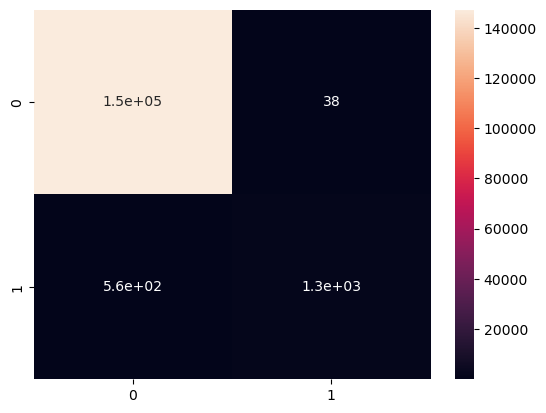

In [137]:
print("Training performance")
performance(y_train,X_train,logreg_result)

Testing performance
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63022
           1       0.97      0.71      0.82       878

    accuracy                           1.00     63900
   macro avg       0.99      0.85      0.91     63900
weighted avg       1.00      1.00      1.00     63900

AUC score: 0.9699961231313158
f1_score: 0.8190224570673712


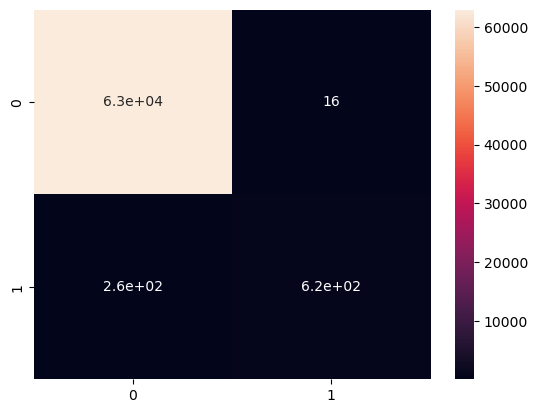

In [138]:
print("Testing performance")
performance(y_test,X_test,logreg_result)

In [139]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression  


estimator = LogisticRegression()


rfe = RFE(estimator, n_features_to_select=5)  

# Fit RFE to your data and get the selected features
X_selected = rfe.fit_transform(X, y) 


selected_indices = rfe.get_support(indices=True)


print("Selected feature indices:", selected_indices)


Selected feature indices: [ 5  8  9 21 24]


In [140]:
# Get the names of selected features from their indices
selected_feature_names = [X.columns[i] for i in selected_indices]

# Print the names of selected features
print("Selected feature names:", selected_feature_names)


Selected feature names: ['application_type', 'last_pymnt_d_month', 'next_pymnt_d_month', 'collection_recovery_fee', 'last_pymnt_d_year']


### Logit Model

In [141]:
X_train_const=sm.add_constant(X_train)
logit_model=sm.Logit(y_train,X_train_const)
result=logit_model.fit()
print(result.summary())

         Current function value: 0.020388
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:               149099
Model:                          Logit   Df Residuals:                   149072
Method:                           MLE   Df Model:                           26
Date:                Wed, 06 Mar 2024   Pseudo R-squ.:                  0.7007
Time:                        11:06:57   Log-Likelihood:                -3039.8
converged:                      False   LL-Null:                       -10155.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -178.1196   1.49e+06     -0.000      1.000   -2.91e+06    2.91e+06
grade                  

### Oversampling (50-50)

In [142]:
X = scaled_df.drop(['loan_status','int_rate'], axis=1)
y = scaled_df['loan_status']

In [143]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Instantiate SMOTE with desired proportion
smote = SMOTE(sampling_strategy=0.5)  # 50/50 proportion



# Apply SMOTE
X, y = smote.fit_resample(X, y)

# Now X_resampled and y_resampled contain the balanced dataset


In [144]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [145]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(max_depth = 3,random_state=10)
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=10)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    147246
           1       0.99      0.96      0.97     73491

    accuracy                           0.98    220737
   macro avg       0.98      0.98      0.98    220737
weighted avg       0.98      0.98      0.98    220737

AUC score: 0.9776111145701367
f1_score: 0.9720434572001937


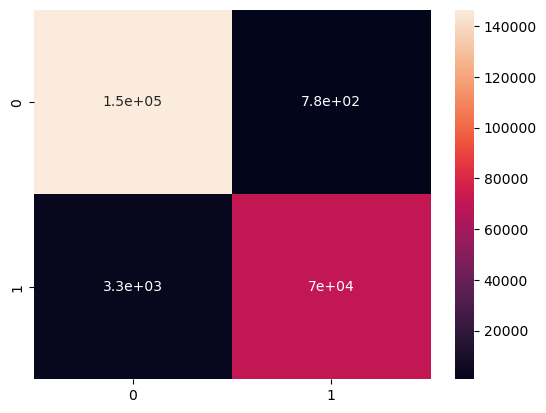

In [146]:
performance(y_train,X_train,DT_model)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     62980
           1       0.99      0.96      0.97     31622

    accuracy                           0.98     94602
   macro avg       0.98      0.98      0.98     94602
weighted avg       0.98      0.98      0.98     94602

AUC score: 0.9779179840385513
f1_score: 0.9728468938004696


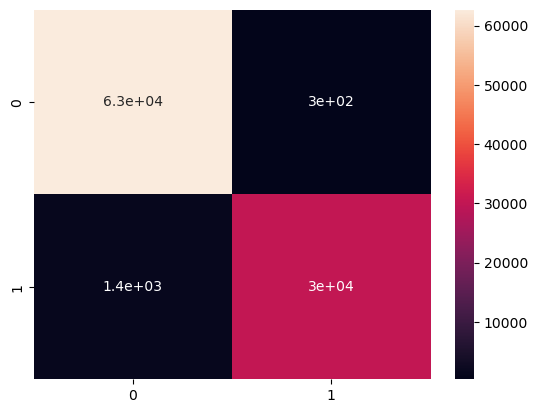

In [147]:
performance(y_test,X_test, DT_model)

In [148]:
imp=DT_model.feature_importances_
df_imp = pd.DataFrame(zip(X_train.columns,imp), columns = ['column','importance'])
df_imp=df_imp.sort_values('importance',ascending=False)
df_imp


column  importance
9            last_pymnt_d_month    0.946155
36      last_credit_pull_d_year    0.053845
35            last_pymnt_d_year    0.000000
27      collection_recovery_fee    0.000000
21                    revol_bal    0.000000
22                   revol_util    0.000000
23                    total_acc    0.000000
24                  total_pymnt    0.000000
25                total_rec_int    0.000000
26           total_rec_late_fee    0.000000
28              last_pymnt_amnt    0.000000
34        earliest_cr_line_year    0.000000
19       mths_since_last_delinq    0.000000
29   collections_12_mths_ex_med    0.000000
30  mths_since_last_major_derog    0.000000
31               acc_now_delinq    0.000000
32                 tot_coll_amt    0.000000
33                  tot_cur_bal    0.000000
20                      pub_rec    0.000000
0                          term    0.000000
1                         grade    0.000000
8        earliest_cr_line_month    0.000000
2                home_ownership    0.000000
3           verification_status    0.000000
4                         title    0.000000
5           initial_list_status    0.000000
6              application_type    0.000000
7                   issue_month    0.000000
10           next_pymnt_d_month    0.000000
17                  delinq_2yrs    0.000000
11     last_credit_pull_d_month    0.000000
12                    loan_amnt    0.000000
13                  installment    0.000000
14                   emp_length    0.000000
15                   annual_inc    0.000000
16                          dti    0.000000
18               inq_last_6mths    0.000000

<Axes: xlabel='importance', ylabel='column'>

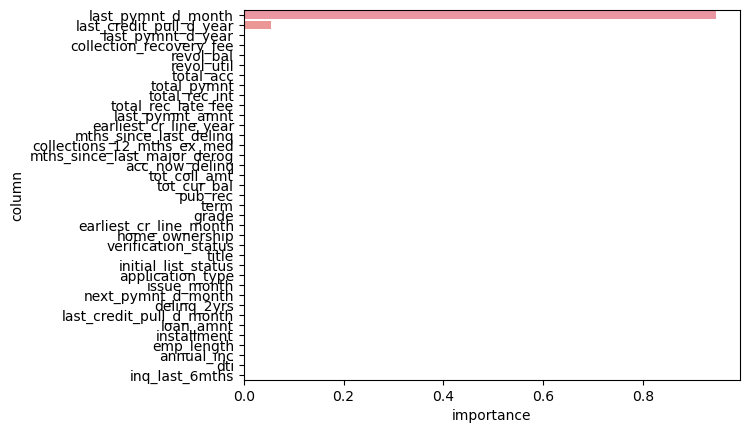

In [149]:
sns.barplot(y = 'column', x='importance', data = df_imp )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    147246
           1       1.00      1.00      1.00     73491

    accuracy                           1.00    220737
   macro avg       1.00      1.00      1.00    220737
weighted avg       1.00      1.00      1.00    220737

AUC score: 0.9999999964883928
f1_score: 0.9999523735006157


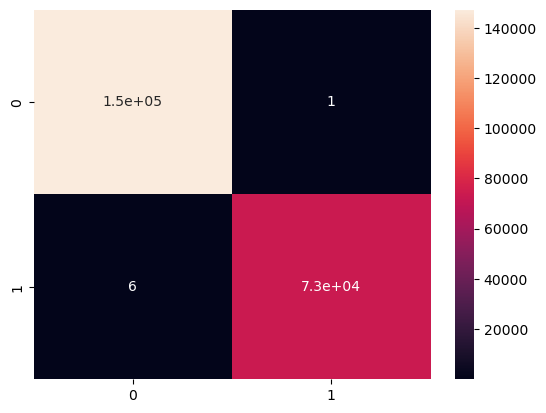

In [150]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10, random_state = 42)

rf.fit(X_train, y_train);
performance(y_train, X_train, rf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     62980
           1       1.00      1.00      1.00     31622

    accuracy                           1.00     94602
   macro avg       1.00      1.00      1.00     94602
weighted avg       1.00      1.00      1.00     94602

AUC score: 0.9999986508020402
f1_score: 0.9994306319984816


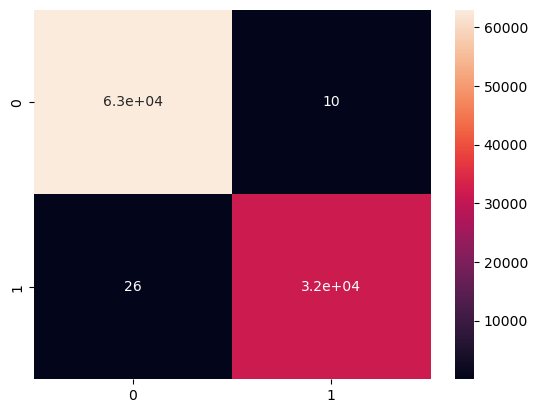

In [151]:
performance(y_test, X_test, rf)

In [152]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)


xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     62980
           1       1.00      1.00      1.00     31622

    accuracy                           1.00     94602
   macro avg       1.00      1.00      1.00     94602
weighted avg       1.00      1.00      1.00     94602

AUC score: 0.9999978539367027
f1_score: 0.9997786001201886


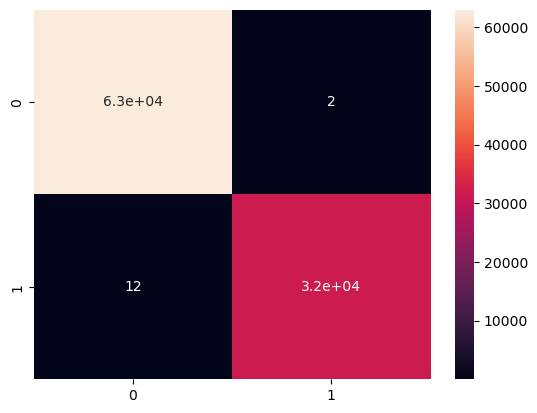

In [153]:
performance(y_test,X_test,xgb_model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    147246
           1       1.00      1.00      1.00     73491

    accuracy                           1.00    220737
   macro avg       1.00      1.00      1.00    220737
weighted avg       1.00      1.00      1.00    220737

AUC score: 0.9999999992607141
f1_score: 0.9999659810718684


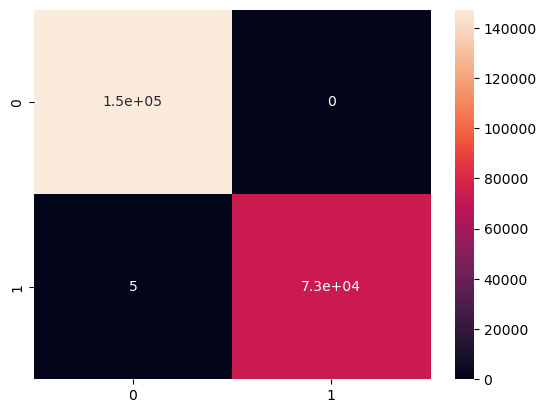

In [154]:
performance(y_train,X_train,xgb_model)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95    147246
           1       0.93      0.86      0.89     73491

    accuracy                           0.93    220737
   macro avg       0.93      0.91      0.92    220737
weighted avg       0.93      0.93      0.93    220737

AUC score: 0.9723728723438197
f1_score: 0.8937430372428187


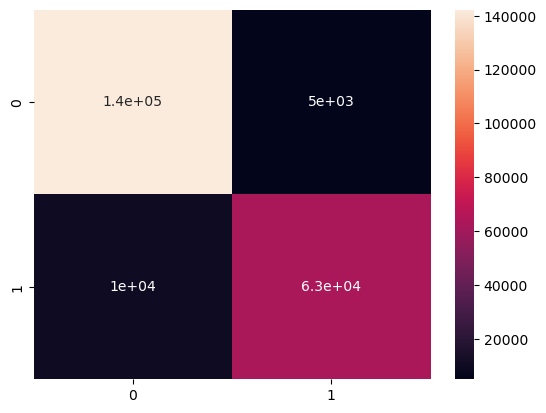

In [155]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()


gnb.fit(X_train, y_train)
performance(y_train,X_train,gnb)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     62980
           1       0.93      0.86      0.89     31622

    accuracy                           0.93     94602
   macro avg       0.93      0.91      0.92     94602
weighted avg       0.93      0.93      0.93     94602

AUC score: 0.9721845971845217
f1_score: 0.8946211151586755


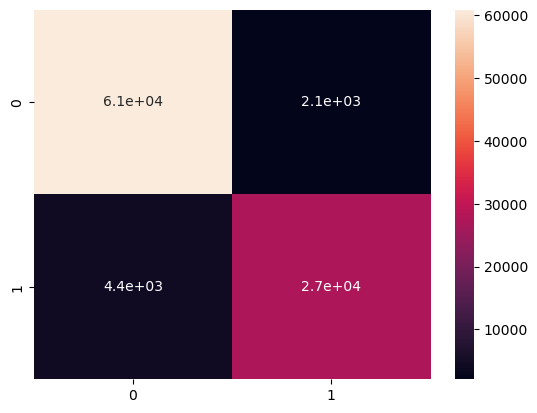

In [156]:
performance(y_test,X_test,gnb)

### Undersampling (50-50)

In [157]:
X = scaled_df.drop(['loan_status','int_rate'], axis=1)
y = scaled_df['loan_status']

In [158]:
from imblearn.under_sampling import RandomUnderSampler


rus = RandomUnderSampler(sampling_strategy=0.5)  # 50/50 proportion

# Apply undersampling
X, y = rus.fit_resample(X, y)


In [159]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=100)

In [160]:
from sklearn.tree import DecisionTreeClassifier
DT_model2 = DecisionTreeClassifier(max_depth = 3,random_state=10)
DT_model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=10)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3890
           1       0.99      0.97      0.98      1933

    accuracy                           0.99      5823
   macro avg       0.99      0.98      0.98      5823
weighted avg       0.99      0.99      0.99      5823

AUC score: 0.9832435430095873
f1_score: 0.977510460251046


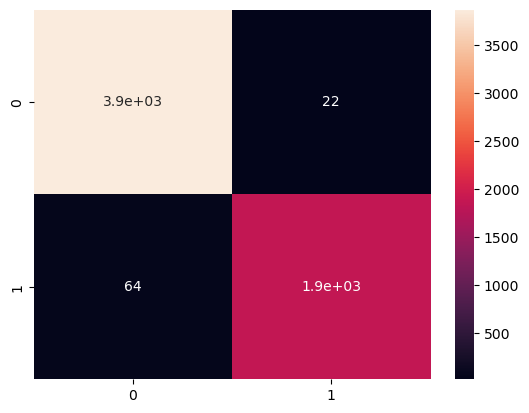

In [161]:
performance(y_train,X_train,DT_model2)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1656
           1       0.99      0.95      0.97       840

    accuracy                           0.98      2496
   macro avg       0.98      0.97      0.98      2496
weighted avg       0.98      0.98      0.98      2496

AUC score: 0.9741208017023233
f1_score: 0.967820279295689


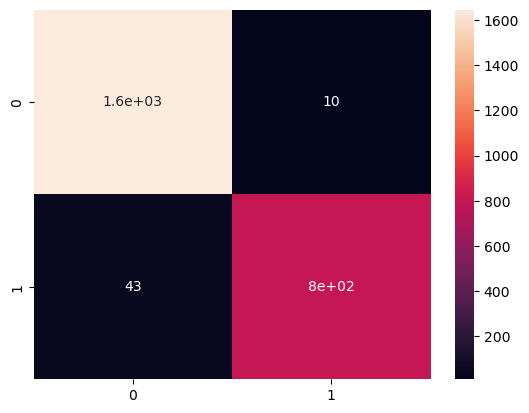

In [162]:
performance(y_test,X_test,DT_model2)

In [163]:
imp=DT_model2.feature_importances_
df_imp = pd.DataFrame(zip(X_train.columns,imp), columns = ['column','importance'])
df_imp=df_imp.sort_values('importance',ascending=False)
df_imp

column  importance
9            last_pymnt_d_month    0.955956
36      last_credit_pull_d_year    0.044044
35            last_pymnt_d_year    0.000000
27      collection_recovery_fee    0.000000
21                    revol_bal    0.000000
22                   revol_util    0.000000
23                    total_acc    0.000000
24                  total_pymnt    0.000000
25                total_rec_int    0.000000
26           total_rec_late_fee    0.000000
28              last_pymnt_amnt    0.000000
34        earliest_cr_line_year    0.000000
19       mths_since_last_delinq    0.000000
29   collections_12_mths_ex_med    0.000000
30  mths_since_last_major_derog    0.000000
31               acc_now_delinq    0.000000
32                 tot_coll_amt    0.000000
33                  tot_cur_bal    0.000000
20                      pub_rec    0.000000
0                          term    0.000000
1                         grade    0.000000
8        earliest_cr_line_month    0.000000
2                home_ownership    0.000000
3           verification_status    0.000000
4                         title    0.000000
5           initial_list_status    0.000000
6              application_type    0.000000
7                   issue_month    0.000000
10           next_pymnt_d_month    0.000000
17                  delinq_2yrs    0.000000
11     last_credit_pull_d_month    0.000000
12                    loan_amnt    0.000000
13                  installment    0.000000
14                   emp_length    0.000000
15                   annual_inc    0.000000
16                          dti    0.000000
18               inq_last_6mths    0.000000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3890
           1       1.00      1.00      1.00      1933

    accuracy                           1.00      5823
   macro avg       1.00      1.00      1.00      5823
weighted avg       1.00      1.00      1.00      5823

AUC score: 1.0
f1_score: 0.9997412677878396


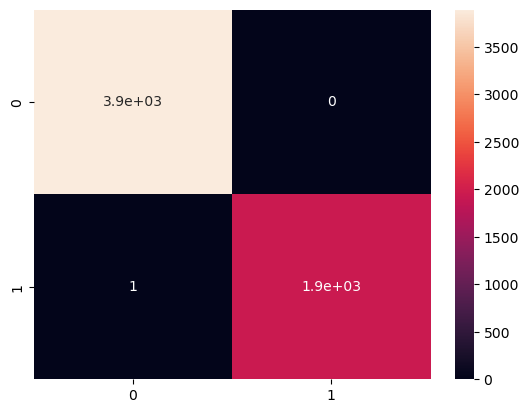

In [164]:
from sklearn.ensemble import RandomForestClassifier

rf2 = RandomForestClassifier(n_estimators = 10, random_state = 42)

rf2.fit(X_train, y_train);
performance(y_train, X_train, rf2)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1656
           1       1.00      0.97      0.98       840

    accuracy                           0.99      2496
   macro avg       0.99      0.99      0.99      2496
weighted avg       0.99      0.99      0.99      2496

AUC score: 0.999381038647343
f1_score: 0.9849306811332127


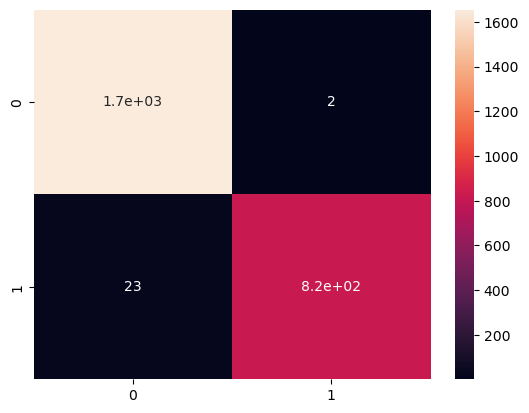

In [165]:
performance(y_test, X_test, rf2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3890
           1       1.00      1.00      1.00      1933

    accuracy                           1.00      5823
   macro avg       1.00      1.00      1.00      5823
weighted avg       1.00      1.00      1.00      5823

AUC score: 0.9999997340202702
f1_score: 0.9997412677878396


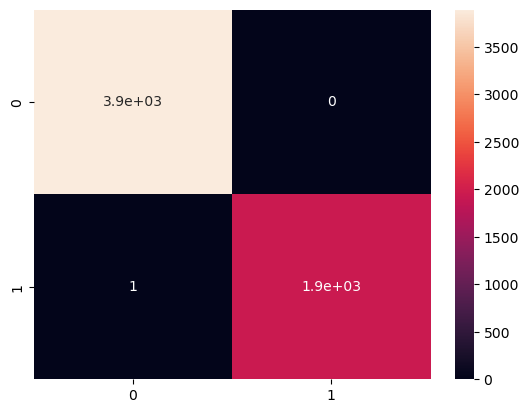

In [166]:
from xgboost import XGBClassifier
xgb_model2 = XGBClassifier(max_depth = 10, gamma = 1)


xgb_model2.fit(X_train, y_train)
performance(y_train, X_train, xgb_model2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1656
           1       1.00      0.99      1.00       840

    accuracy                           1.00      2496
   macro avg       1.00      1.00      1.00      2496
weighted avg       1.00      1.00      1.00      2496

AUC score: 0.9996854871175522
f1_score: 0.996415770609319


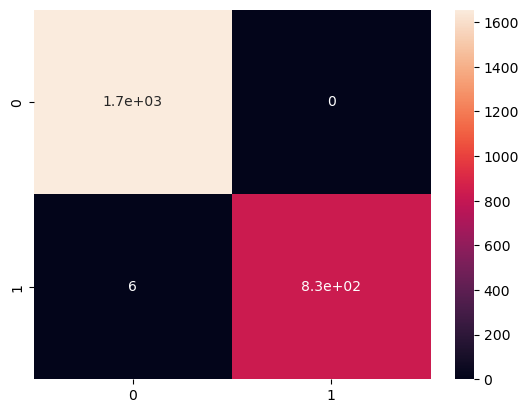

In [167]:
performance(y_test, X_test, xgb_model2)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3890
           1       0.93      0.81      0.87      1933

    accuracy                           0.92      5823
   macro avg       0.92      0.89      0.90      5823
weighted avg       0.92      0.92      0.92      5823

AUC score: 0.9705116253090351
f1_score: 0.8672762538099197


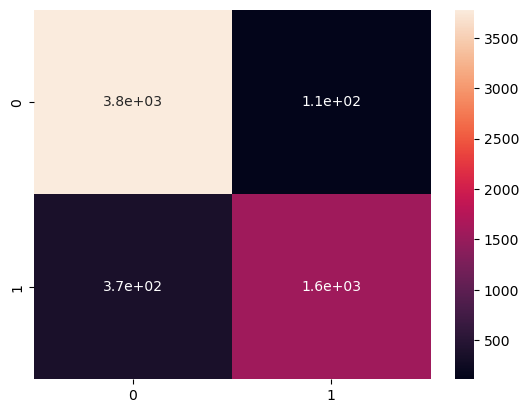

In [168]:
from sklearn.naive_bayes import GaussianNB
gnb2 = GaussianNB()


gnb2.fit(X_train, y_train)
performance(y_train,X_train,gnb2)

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      1656
           1       0.94      0.78      0.86       840

    accuracy                           0.91      2496
   macro avg       0.92      0.88      0.90      2496
weighted avg       0.91      0.91      0.91      2496

AUC score: 0.96267181389464
f1_score: 0.8552887735236859


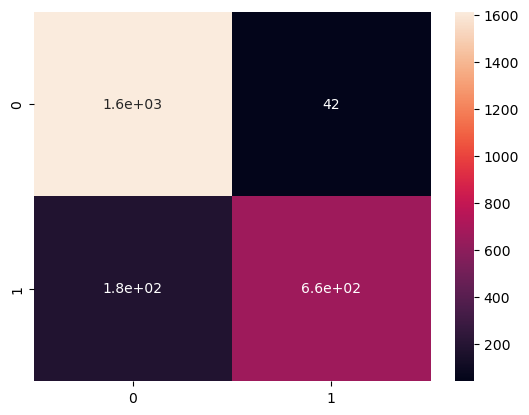

In [169]:
performance(y_test,X_test,gnb2)

### Oversampling (70-30)


In [170]:
X = scaled_df.drop(['loan_status','int_rate'], axis=1)
y = scaled_df['loan_status']

In [171]:
smote = SMOTE(sampling_strategy=0.7)  
# Apply SMOTE
X, y = smote.fit_resample(X, y)

In [172]:
y.value_counts(normalize=True)*100

0    58.823562
1    41.176438
Name: loan_status, dtype: float64

In [173]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [174]:
DT = DecisionTreeClassifier(max_depth = 3,random_state=10)
DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=10)

              precision    recall  f1-score   support

           0       0.99      0.94      0.96    147359
           1       0.92      0.99      0.95    102809

    accuracy                           0.96    250168
   macro avg       0.95      0.96      0.96    250168
weighted avg       0.96      0.96      0.96    250168

AUC score: 0.9689884138223055
f1_score: 0.9505770854837197


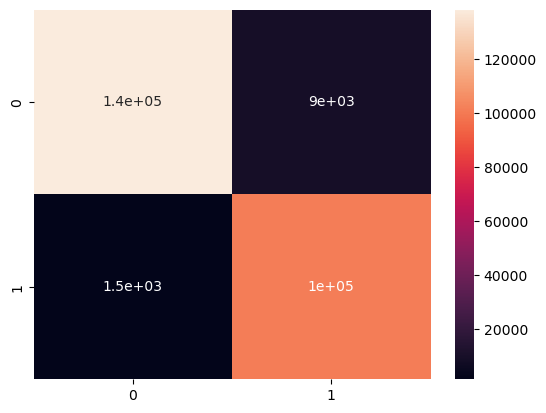

In [175]:
performance(y_train,X_train,DT)

              precision    recall  f1-score   support

           0       0.99      0.94      0.96     62867
           1       0.92      0.99      0.95     44349

    accuracy                           0.96    107216
   macro avg       0.95      0.96      0.96    107216
weighted avg       0.96      0.96      0.96    107216

AUC score: 0.9694853144126232
f1_score: 0.9516417000522558


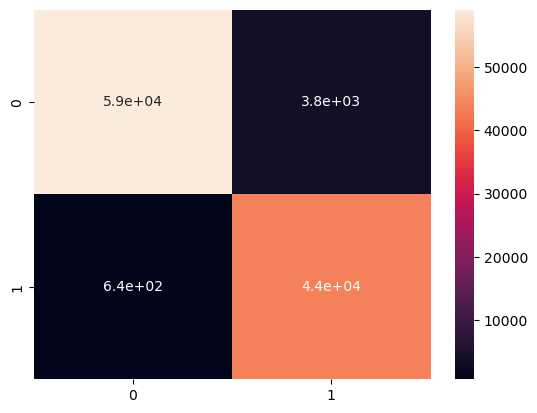

In [176]:
performance(y_test,X_test,DT)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    147359
           1       1.00      1.00      1.00    102809

    accuracy                           1.00    250168
   macro avg       1.00      1.00      1.00    250168
weighted avg       1.00      1.00      1.00    250168

AUC score: 0.9999999630028886
f1_score: 0.9999513661255337


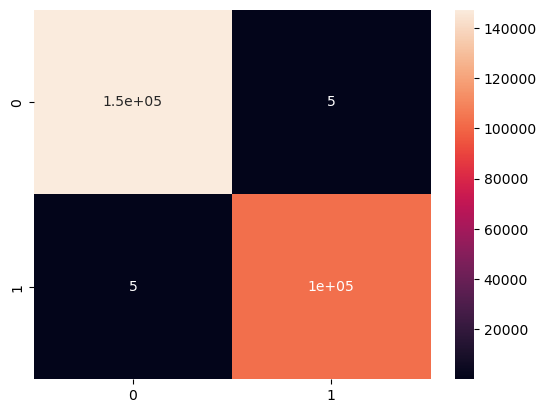

In [177]:
rf_model = RandomForestClassifier(n_estimators = 5)

rf_model.fit(X_train, y_train)
performance(y_train, X_train, rf_model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     62867
           1       1.00      1.00      1.00     44349

    accuracy                           1.00    107216
   macro avg       1.00      1.00      1.00    107216
weighted avg       1.00      1.00      1.00    107216

AUC score: 0.9999660412511362
f1_score: 0.9994588988591784


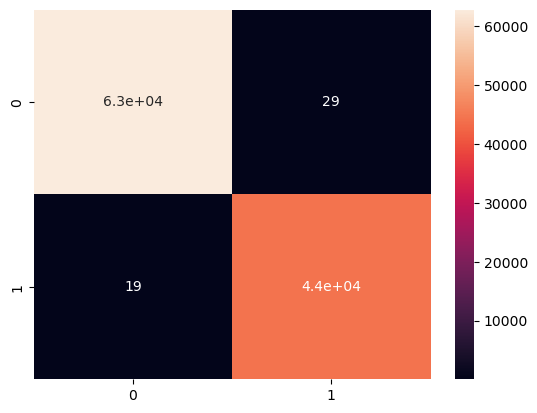

In [178]:
performance(y_test, X_test, rf_model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    147359
           1       1.00      1.00      1.00    102809

    accuracy                           1.00    250168
   macro avg       1.00      1.00      1.00    250168
weighted avg       1.00      1.00      1.00    250168

AUC score: 0.9999999992739195
f1_score: 0.9999805460717656


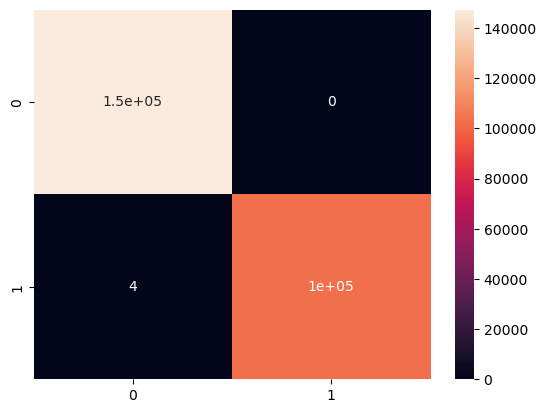

In [179]:
from xgboost import XGBClassifier
xgb2 = XGBClassifier(max_depth = 10, gamma = 1)


xgb2.fit(X_train, y_train)
performance(y_train, X_train, xgb2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     62867
           1       1.00      1.00      1.00     44349

    accuracy                           1.00    107216
   macro avg       1.00      1.00      1.00    107216
weighted avg       1.00      1.00      1.00    107216

AUC score: 0.9999999835012416
f1_score: 0.9999098063090487


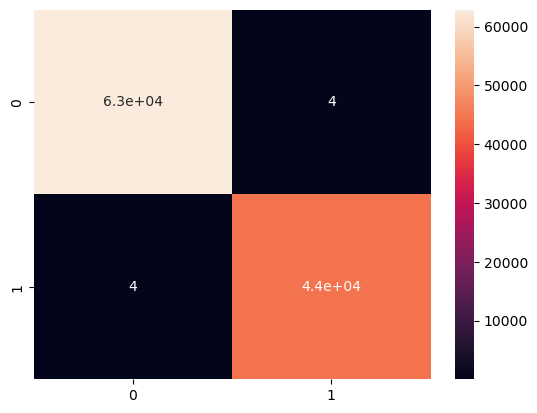

In [180]:
performance(y_test, X_test, xgb2)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94    147359
           1       0.94      0.89      0.91    102809

    accuracy                           0.93    250168
   macro avg       0.93      0.92      0.93    250168
weighted avg       0.93      0.93      0.93    250168

AUC score: 0.972684672078052
f1_score: 0.9136353425683265


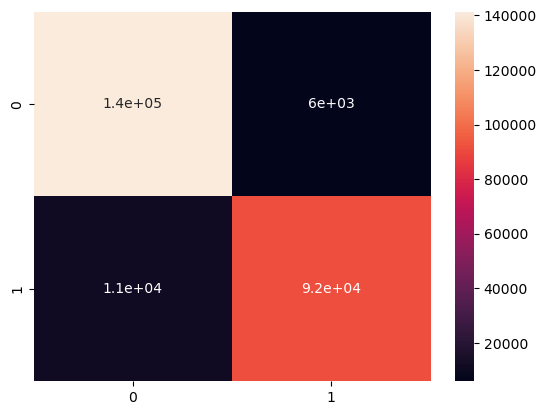

In [181]:
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()


gnb_model.fit(X_train, y_train)
performance(y_train,X_train,gnb_model)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     62867
           1       0.94      0.89      0.91     44349

    accuracy                           0.93    107216
   macro avg       0.93      0.92      0.93    107216
weighted avg       0.93      0.93      0.93    107216

AUC score: 0.9731617987476262
f1_score: 0.913972640821007


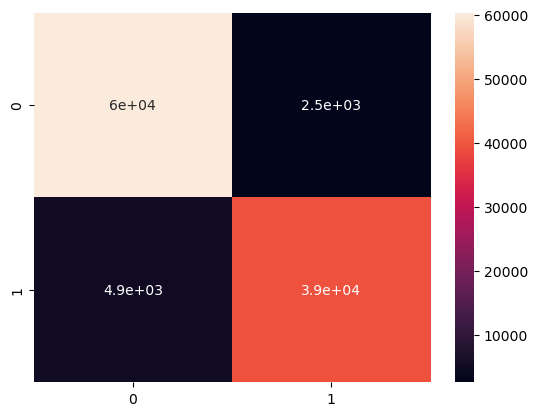

In [182]:
performance(y_test,X_test,gnb_model)

### Undersampling (70-30)

In [183]:
X = scaled_df.drop(['loan_status','int_rate'], axis=1)
y = scaled_df['loan_status']

In [184]:
from imblearn.under_sampling import RandomUnderSampler


rus = RandomUnderSampler(sampling_strategy=0.3)  

# Apply undersampling
X,y = rus.fit_resample(X,y)


In [185]:
y.value_counts(normalize=True)*100

0    76.922437
1    23.077563
Name: loan_status, dtype: float64

In [186]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [187]:
DT2 = DecisionTreeClassifier(max_depth = 3,random_state=10)
DT2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=10)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6464
           1       0.99      0.96      0.97      1947

    accuracy                           0.99      8411
   macro avg       0.99      0.98      0.98      8411
weighted avg       0.99      0.99      0.99      8411

AUC score: 0.9808584274741033
f1_score: 0.9747593026281551


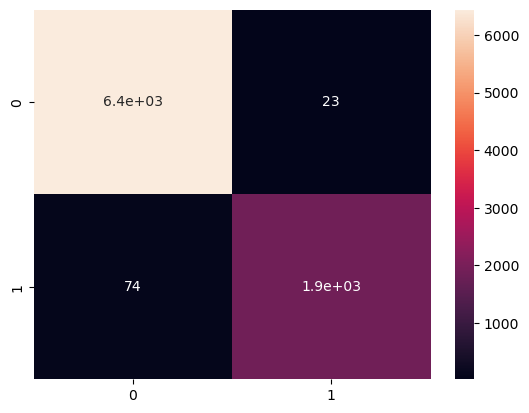

In [188]:
performance(y_train, X_train, DT2)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2779
           1       0.98      0.96      0.97       826

    accuracy                           0.99      3605
   macro avg       0.98      0.98      0.98      3605
weighted avg       0.99      0.99      0.99      3605

AUC score: 0.979794193218422
f1_score: 0.9700305810397554


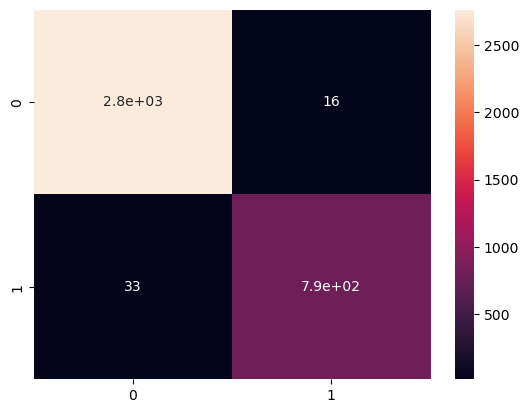

In [189]:
performance(y_test, X_test, DT2)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2779
           1       0.99      0.98      0.98       826

    accuracy                           0.99      3605
   macro avg       0.99      0.99      0.99      3605
weighted avg       0.99      0.99      0.99      3605

AUC score: 0.9976035241830157
f1_score: 0.9811320754716981


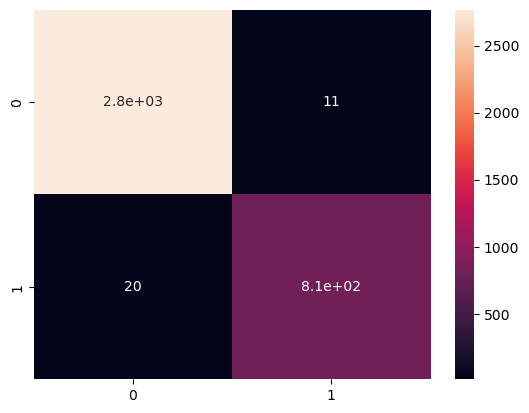

In [190]:
rf_model = RandomForestClassifier(n_estimators = 5)

rf_model.fit(X_train, y_train)
performance(y_test, X_test, rf_model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6464
           1       1.00      1.00      1.00      1947

    accuracy                           1.00      8411
   macro avg       1.00      1.00      1.00      8411
weighted avg       1.00      1.00      1.00      8411

AUC score: 0.9999827975382284
f1_score: 0.9976857804062741


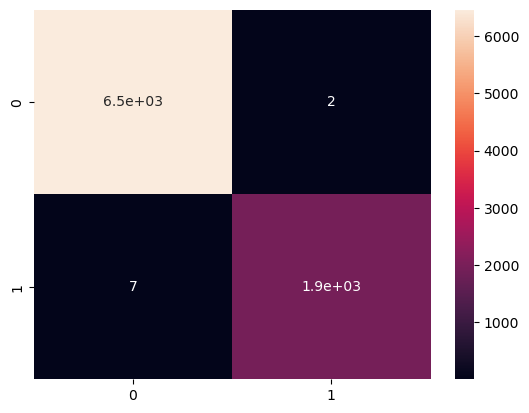

In [191]:
performance(y_train, X_train, rf_model)

In [192]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)


xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6464
           1       1.00      1.00      1.00      1947

    accuracy                           1.00      8411
   macro avg       1.00      1.00      1.00      8411
weighted avg       1.00      1.00      1.00      8411

AUC score: 0.9999999999999999
f1_score: 0.999743128692525


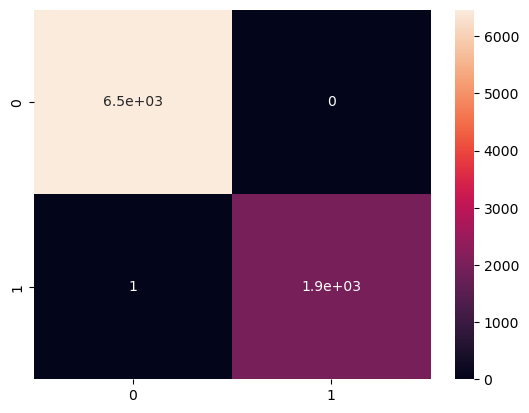

In [193]:
performance(y_train,X_train,xgb_model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2779
           1       1.00      1.00      1.00       826

    accuracy                           1.00      3605
   macro avg       1.00      1.00      1.00      3605
weighted avg       1.00      1.00      1.00      3605

AUC score: 0.9999738613799275
f1_score: 0.998180715585203


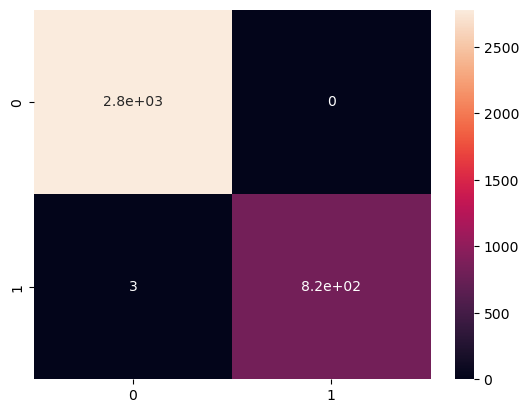

In [194]:
performance(y_test,X_test,xgb_model)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      6464
           1       0.92      0.67      0.78      1947

    accuracy                           0.91      8411
   macro avg       0.92      0.83      0.86      8411
weighted avg       0.91      0.91      0.91      8411

AUC score: 0.9728954754585629
f1_score: 0.7784040344111539


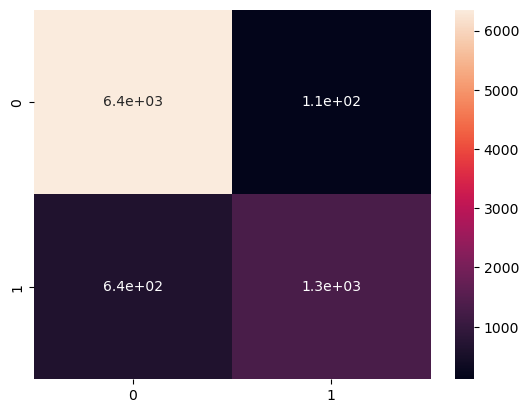

In [195]:
from sklearn.naive_bayes import GaussianNB
gnb_model2 = GaussianNB()


gnb_model2.fit(X_train, y_train)
performance(y_train,X_train,gnb_model2)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      2779
           1       0.90      0.67      0.77       826

    accuracy                           0.91      3605
   macro avg       0.91      0.82      0.85      3605
weighted avg       0.91      0.91      0.90      3605

AUC score: 0.9731286272780897
f1_score: 0.767409470752089


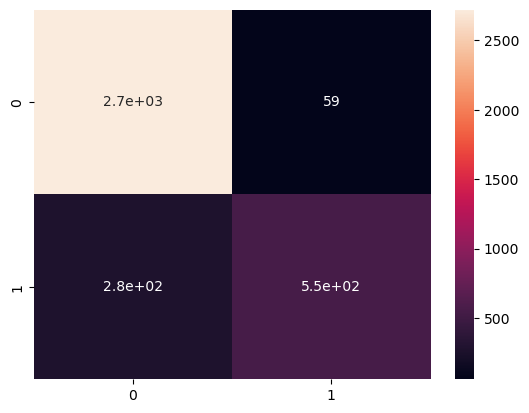

In [196]:
performance(y_test,X_test,gnb_model2)

### Oversampling (60-40)

In [197]:
X = scaled_df.drop(['loan_status','int_rate'], axis=1)
y = scaled_df['loan_status']

In [198]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.6) 
X,y = smote.fit_resample(X,y)

In [199]:
y.value_counts(normalize=True)

0    0.625001
1    0.374999
Name: loan_status, dtype: float64

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=100)

In [201]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(max_depth = 3,random_state=10)
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=10)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    147147
           1       0.99      0.95      0.97     88305

    accuracy                           0.98    235452
   macro avg       0.98      0.97      0.98    235452
weighted avg       0.98      0.98      0.98    235452

AUC score: 0.9770459050838163
f1_score: 0.9723612873457147


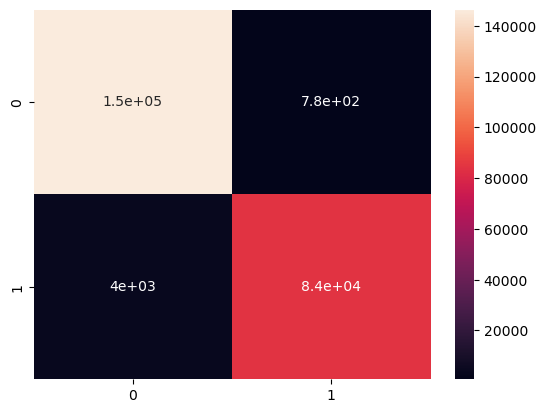

In [202]:
performance(y_train,X_train,DT_model)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     63079
           1       0.99      0.95      0.97     37830

    accuracy                           0.98    100909
   macro avg       0.98      0.97      0.98    100909
weighted avg       0.98      0.98      0.98    100909

AUC score: 0.9768645833332024
f1_score: 0.9724923889322953


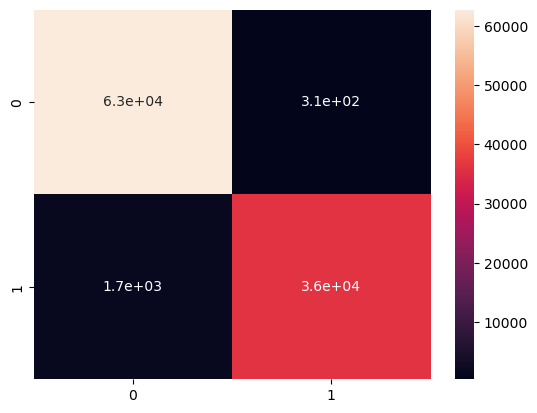

In [203]:
performance(y_test,X_test, DT_model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63079
           1       1.00      1.00      1.00     37830

    accuracy                           1.00    100909
   macro avg       1.00      1.00      1.00    100909
weighted avg       1.00      1.00      1.00    100909

AUC score: 0.9999775985919364
f1_score: 0.9997092331685655


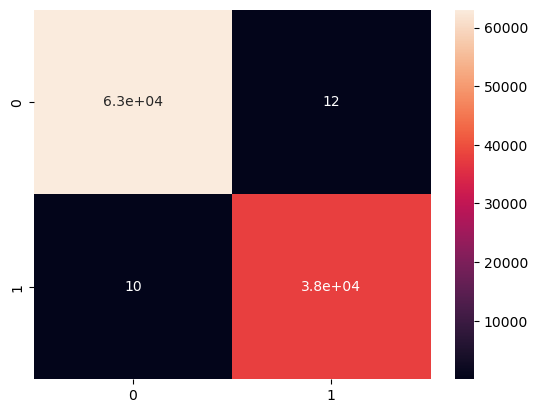

In [204]:
rf_model = RandomForestClassifier(n_estimators = 5)

rf_model.fit(X_train, y_train)
performance(y_test, X_test, rf_model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    147147
           1       1.00      1.00      1.00     88305

    accuracy                           1.00    235452
   macro avg       1.00      1.00      1.00    235452
weighted avg       1.00      1.00      1.00    235452

AUC score: 0.9999999893795631
f1_score: 0.9999490411238131


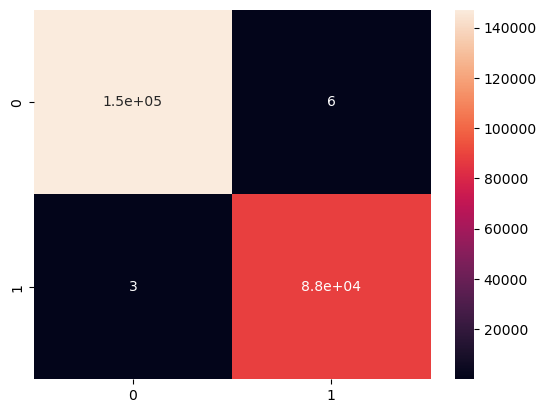

In [205]:
performance(y_train, X_train, rf_model)

In [206]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)


xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    147147
           1       1.00      1.00      1.00     88305

    accuracy                           1.00    235452
   macro avg       1.00      1.00      1.00    235452
weighted avg       1.00      1.00      1.00    235452

AUC score: 0.9999999987686451
f1_score: 0.9999716885514165


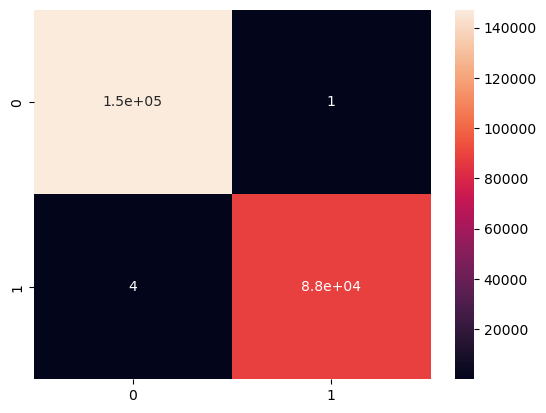

In [207]:
performance(y_train, X_train, xgb_model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63079
           1       1.00      1.00      1.00     37830

    accuracy                           1.00    100909
   macro avg       1.00      1.00      1.00    100909
weighted avg       1.00      1.00      1.00    100909

AUC score: 0.9999999899424987
f1_score: 0.9999206915695138


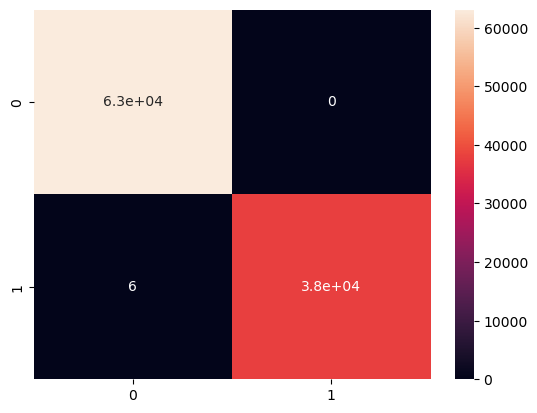

In [208]:
performance(y_test, X_test, xgb_model)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95    147147
           1       0.93      0.88      0.91     88305

    accuracy                           0.93    235452
   macro avg       0.93      0.92      0.93    235452
weighted avg       0.93      0.93      0.93    235452

AUC score: 0.9713320664437446
f1_score: 0.9065483440635694


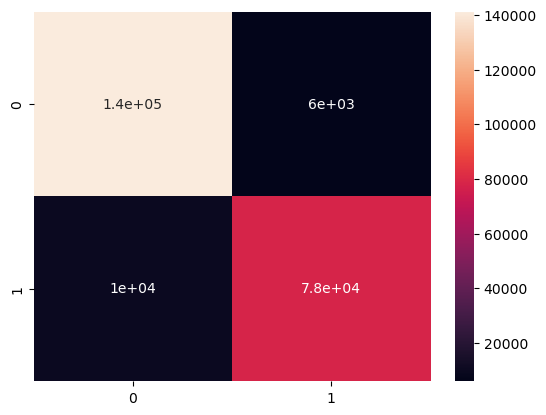

In [209]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
performance(y_train,X_train,gnb)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     63079
           1       0.93      0.88      0.91     37830

    accuracy                           0.93    100909
   macro avg       0.93      0.92      0.93    100909
weighted avg       0.93      0.93      0.93    100909

AUC score: 0.9722984190399866
f1_score: 0.906265229869497


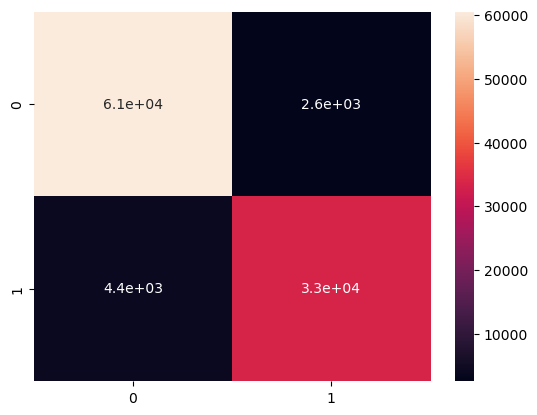

In [210]:
performance(y_test,X_test,gnb)

### Undersampling (60-40)

In [211]:
X = scaled_df.drop(['loan_status','int_rate'], axis=1)
y = scaled_df['loan_status']

In [212]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.4)  
X,y = rus.fit_resample(X,y)

In [213]:
y.value_counts(normalize=True)

0    0.714271
1    0.285729
Name: loan_status, dtype: float64

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=100)

In [215]:
from sklearn.tree import DecisionTreeClassifier
DT_model2 = DecisionTreeClassifier(max_depth = 3,random_state=10)
DT_model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=10)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4854
           1       0.99      0.96      0.97      1939

    accuracy                           0.98      6793
   macro avg       0.99      0.98      0.98      6793
weighted avg       0.98      0.98      0.98      6793

AUC score: 0.9778828007844531
f1_score: 0.9719528178243775


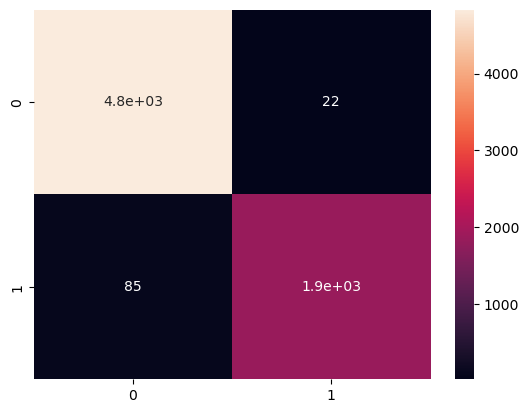

In [216]:
performance(y_train,X_train,DT_model2)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2078
           1       0.99      0.97      0.98       834

    accuracy                           0.99      2912
   macro avg       0.99      0.98      0.99      2912
weighted avg       0.99      0.99      0.99      2912

AUC score: 0.986688512520109
f1_score: 0.9812688821752267


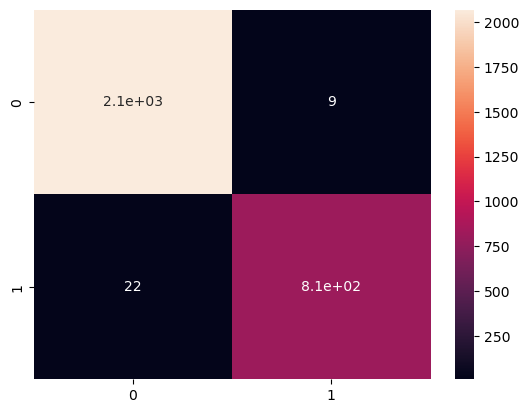

In [217]:
performance(y_test,X_test,DT_model2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2078
           1       1.00      1.00      1.00       834

    accuracy                           1.00      2912
   macro avg       1.00      1.00      1.00      2912
weighted avg       1.00      1.00      1.00      2912

AUC score: 0.999918640640904
f1_score: 0.9964028776978417


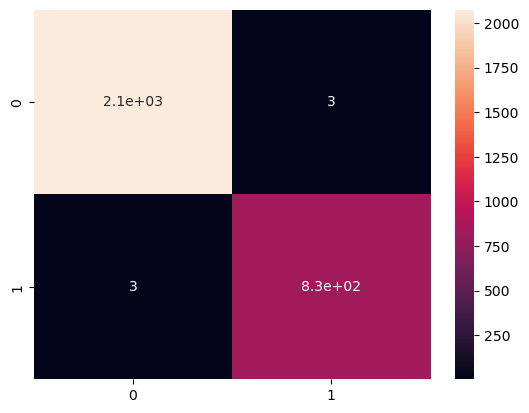

In [218]:
rf_model = RandomForestClassifier(n_estimators = 5)

rf_model.fit(X_train, y_train)
performance(y_test, X_test, rf_model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4854
           1       1.00      1.00      1.00      1939

    accuracy                           1.00      6793
   macro avg       1.00      1.00      1.00      6793
weighted avg       1.00      1.00      1.00      6793

AUC score: 0.999990012649935
f1_score: 0.9987090111025045


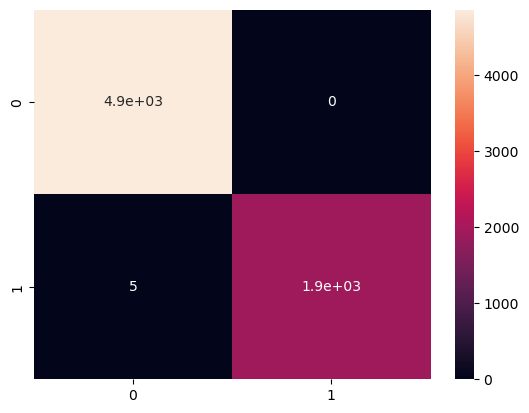

In [219]:
performance(y_train, X_train, rf_model)

In [220]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)


xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4854
           1       1.00      1.00      1.00      1939

    accuracy                           1.00      6793
   macro avg       1.00      1.00      1.00      6793
weighted avg       1.00      1.00      1.00      6793

AUC score: 1.0
f1_score: 1.0


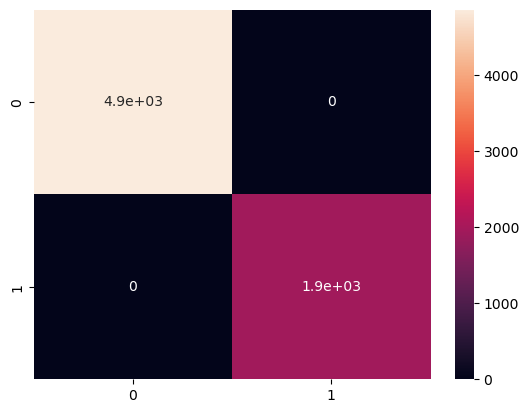

In [221]:
performance(y_train, X_train, xgb_model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2078
           1       1.00      1.00      1.00       834

    accuracy                           1.00      2912
   macro avg       1.00      1.00      1.00      2912
weighted avg       1.00      1.00      1.00      2912

AUC score: 0.9999924987824947
f1_score: 0.9994001199760048


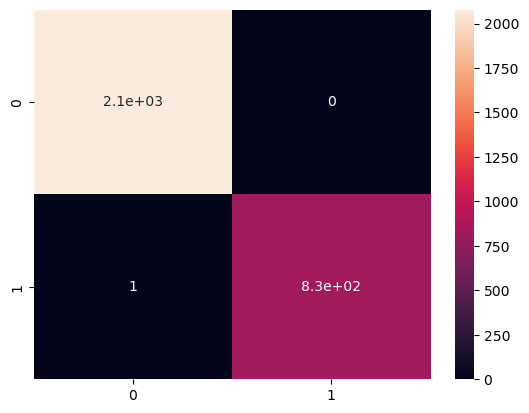

In [222]:
performance(y_test, X_test, xgb_model)

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      4854
           1       0.94      0.68      0.79      1939

    accuracy                           0.90      6793
   macro avg       0.91      0.83      0.86      6793
weighted avg       0.90      0.90      0.89      6793

AUC score: 0.9717418023511923
f1_score: 0.7893317350913995


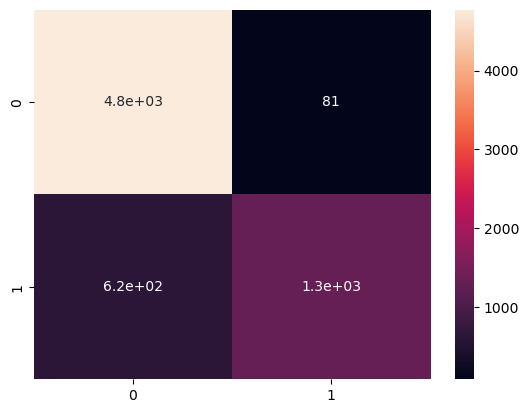

In [223]:
from sklearn.naive_bayes import GaussianNB
gnb2 = GaussianNB()
gnb2.fit(X_train, y_train)
performance(y_train,X_train,gnb2)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2078
           1       0.93      0.70      0.80       834

    accuracy                           0.90      2912
   macro avg       0.91      0.84      0.87      2912
weighted avg       0.90      0.90      0.90      2912

AUC score: 0.9749909408373206
f1_score: 0.8008213552361396


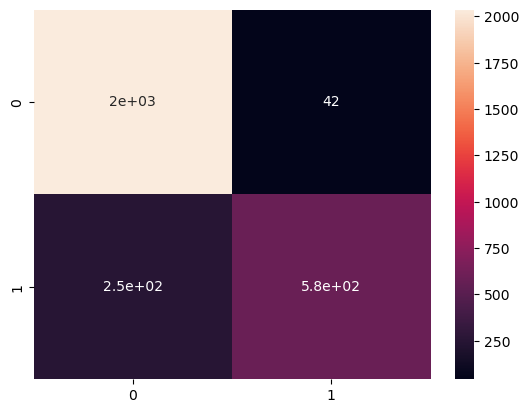

In [224]:
performance(y_test,X_test,gnb2)

### Oversampling (85-15)

In [288]:
X = scaled_df.drop(['loan_status','int_rate'], axis=1)
y = scaled_df['loan_status']

In [289]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.85) 
X,y = smote.fit_resample(X,y)

In [290]:
y.value_counts(normalize=True)

0    0.540541
1    0.459459
Name: loan_status, dtype: float64

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=100)

In [292]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(max_depth = 3,random_state=10)
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=10)

              precision    recall  f1-score   support

           0       0.99      0.94      0.96    147131
           1       0.93      0.99      0.96    125111

    accuracy                           0.96    272242
   macro avg       0.96      0.96      0.96    272242
weighted avg       0.96      0.96      0.96    272242

AUC score: 0.9691663755212622
f1_score: 0.9579895935742846


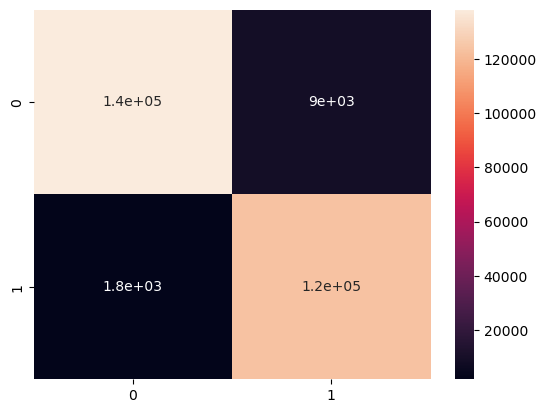

In [293]:
performance(y_train,X_train,DT_model)

              precision    recall  f1-score   support

           0       0.99      0.94      0.96     63095
           1       0.93      0.99      0.96     53581

    accuracy                           0.96    116676
   macro avg       0.96      0.96      0.96    116676
weighted avg       0.96      0.96      0.96    116676

AUC score: 0.9690733979780736
f1_score: 0.958102078572206


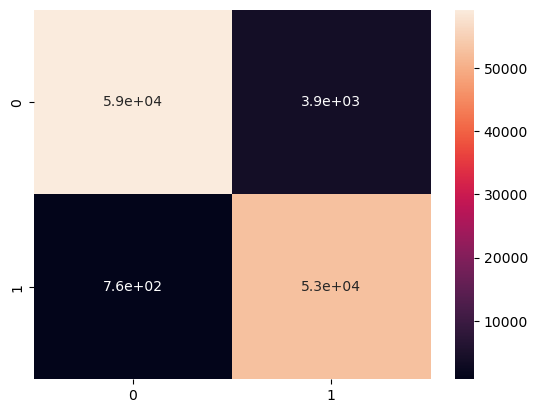

In [294]:
performance(y_test,X_test, DT_model)

In [295]:
imp=DT_model.feature_importances_
df_imp = pd.DataFrame(zip(X_train.columns,imp), columns = ['column','importance'])
df_imp=df_imp.sort_values('importance',ascending=False)
df_imp

column  importance
35            last_pymnt_d_year    0.678385
7                   issue_month    0.218913
10           next_pymnt_d_month    0.061897
36      last_credit_pull_d_year    0.023733
28              last_pymnt_amnt    0.014467
9            last_pymnt_d_month    0.002605
33                  tot_cur_bal    0.000000
32                 tot_coll_amt    0.000000
31               acc_now_delinq    0.000000
34        earliest_cr_line_year    0.000000
30  mths_since_last_major_derog    0.000000
20                      pub_rec    0.000000
29   collections_12_mths_ex_med    0.000000
27      collection_recovery_fee    0.000000
26           total_rec_late_fee    0.000000
25                total_rec_int    0.000000
24                  total_pymnt    0.000000
23                    total_acc    0.000000
22                   revol_util    0.000000
21                    revol_bal    0.000000
0                          term    0.000000
19       mths_since_last_delinq    0.000000
1                         grade    0.000000
17                  delinq_2yrs    0.000000
16                          dti    0.000000
15                   annual_inc    0.000000
14                   emp_length    0.000000
13                  installment    0.000000
12                    loan_amnt    0.000000
11     last_credit_pull_d_month    0.000000
8        earliest_cr_line_month    0.000000
6              application_type    0.000000
5           initial_list_status    0.000000
4                         title    0.000000
3           verification_status    0.000000
2                home_ownership    0.000000
18               inq_last_6mths    0.000000

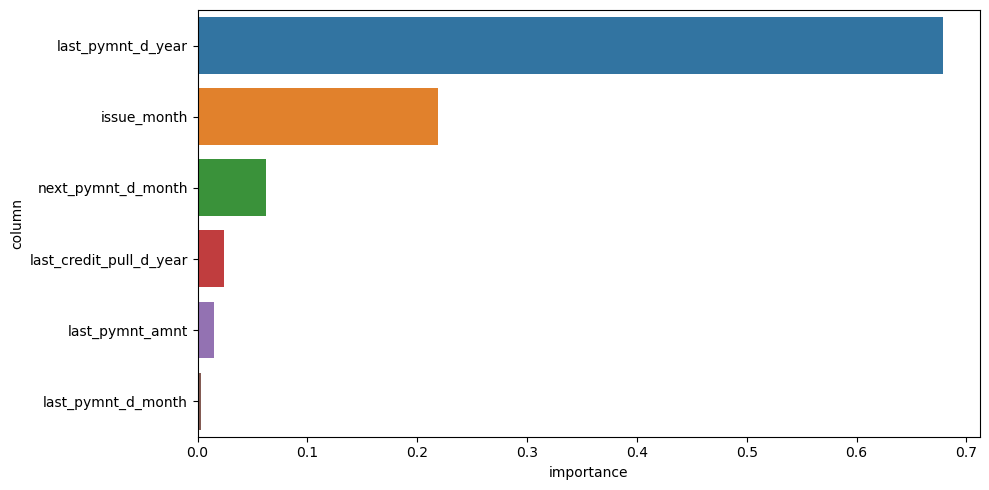

In [313]:
plt.figure(figsize=(10,5))
df_imp = df_imp[df_imp['importance']>0]
sns.barplot(y=df_imp['column'],x=df_imp['importance'])
plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    147131
           1       1.00      1.00      1.00    125111

    accuracy                           1.00    272242
   macro avg       1.00      1.00      1.00    272242
weighted avg       1.00      1.00      1.00    272242

AUC score: 0.9999999994567494
f1_score: 0.9999960035328769


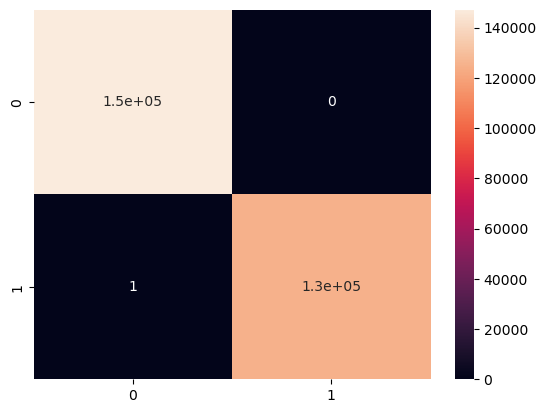

In [233]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)


xgb_model.fit(X_train, y_train)
performance(y_train,X_train,xgb_model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63095
           1       1.00      1.00      1.00     53581

    accuracy                           1.00    116676
   macro avg       1.00      1.00      1.00    116676
weighted avg       1.00      1.00      1.00    116676

AUC score: 0.9999982959116169
f1_score: 0.9998786758872993


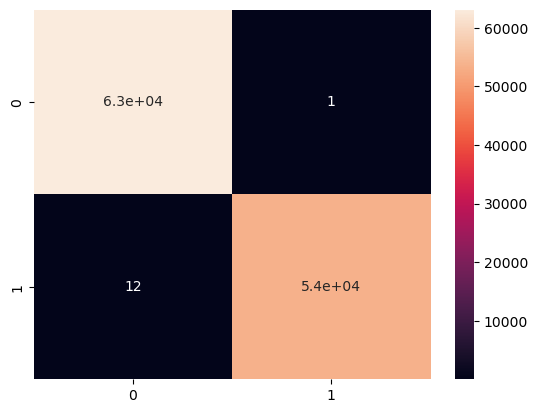

In [234]:
performance(y_test,X_test,xgb_model)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93    147131
           1       0.95      0.89      0.92    125111

    accuracy                           0.93    272242
   macro avg       0.93      0.92      0.93    272242
weighted avg       0.93      0.93      0.93    272242

AUC score: 0.9720157172566477
f1_score: 0.9173930065319074


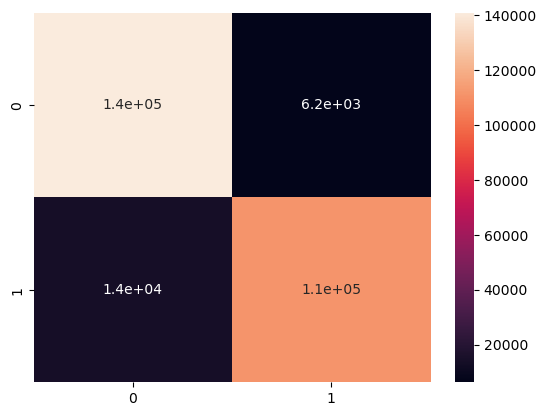

In [235]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
performance(y_train,X_train,gnb)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93     63095
           1       0.95      0.89      0.92     53581

    accuracy                           0.93    116676
   macro avg       0.93      0.92      0.93    116676
weighted avg       0.93      0.93      0.93    116676

AUC score: 0.9719372687707025
f1_score: 0.9174274895727219


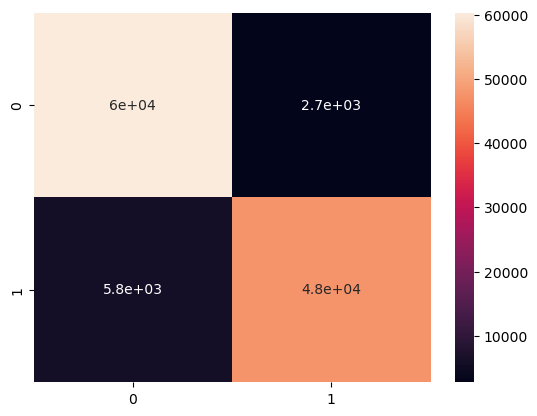

In [236]:
performance(y_test,X_test,gnb)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    147131
           1       1.00      1.00      1.00    125111

    accuracy                           1.00    272242
   macro avg       1.00      1.00      1.00    272242
weighted avg       1.00      1.00      1.00    272242

AUC score: 0.9999999927204402
f1_score: 0.9999640320833816


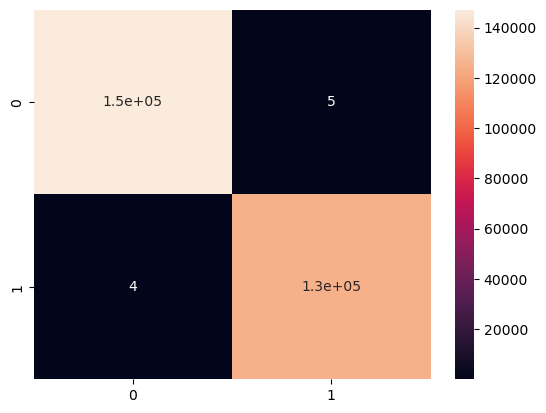

In [237]:
rf_model = RandomForestClassifier(n_estimators = 5)

rf_model.fit(X_train, y_train)
performance(y_train, X_train, rf_model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63095
           1       1.00      1.00      1.00     53581

    accuracy                           1.00    116676
   macro avg       1.00      1.00      1.00    116676
weighted avg       1.00      1.00      1.00    116676

AUC score: 0.9999803756223434
f1_score: 0.9995520298646757


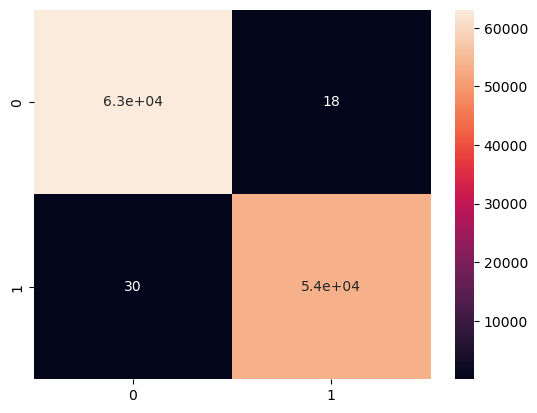

In [238]:
performance(y_test, X_test, rf_model)

### Undersampling (85-15)

In [243]:
X = scaled_df.drop(['loan_status','int_rate'], axis=1)
y = scaled_df['loan_status']

In [244]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.15)  
X,y = rus.fit_resample(X,y)

In [245]:
y.value_counts(normalize=True)

0    0.869561
1    0.130439
Name: loan_status, dtype: float64

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=100)

In [247]:
from sklearn.tree import DecisionTreeClassifier
DT_model2 = DecisionTreeClassifier(max_depth = 3,random_state=10)
DT_model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=10)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     12921
           1       1.00      0.95      0.97      1960

    accuracy                           0.99     14881
   macro avg       1.00      0.97      0.98     14881
weighted avg       0.99      0.99      0.99     14881

AUC score: 0.9737244897959183
f1_score: 0.9730154571653131


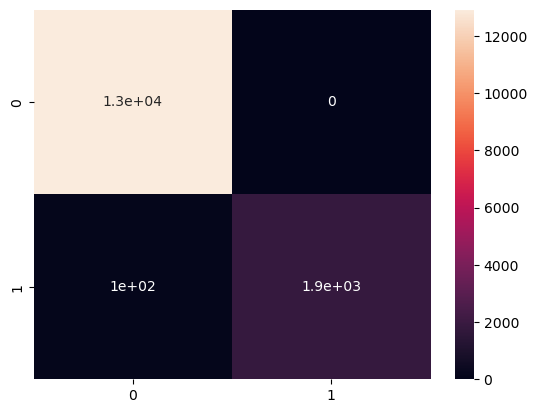

In [248]:
performance(y_train,X_train,DT_model2)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5565
           1       1.00      0.94      0.97       813

    accuracy                           0.99      6378
   macro avg       1.00      0.97      0.98      6378
weighted avg       0.99      0.99      0.99      6378

AUC score: 0.9717097170971709
f1_score: 0.9708860759493672


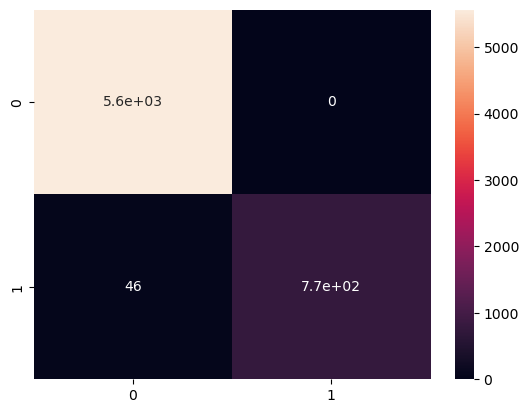

In [249]:
performance(y_test,X_test,DT_model2)

In [250]:
imp=DT_model2.feature_importances_
df_imp = pd.DataFrame(zip(X_train.columns,imp), columns = ['column','importance'])
df_imp=df_imp.sort_values('importance',ascending=False)
df_imp

column  importance
9            last_pymnt_d_month    0.974241
27      collection_recovery_fee    0.025759
28              last_pymnt_amnt    0.000000
21                    revol_bal    0.000000
22                   revol_util    0.000000
23                    total_acc    0.000000
24                  total_pymnt    0.000000
25                total_rec_int    0.000000
26           total_rec_late_fee    0.000000
0                          term    0.000000
19       mths_since_last_delinq    0.000000
29   collections_12_mths_ex_med    0.000000
30  mths_since_last_major_derog    0.000000
31               acc_now_delinq    0.000000
32                 tot_coll_amt    0.000000
33                  tot_cur_bal    0.000000
34        earliest_cr_line_year    0.000000
35            last_pymnt_d_year    0.000000
20                      pub_rec    0.000000
18               inq_last_6mths    0.000000
1                         grade    0.000000
8        earliest_cr_line_month    0.000000
2                home_ownership    0.000000
3           verification_status    0.000000
4                         title    0.000000
5           initial_list_status    0.000000
6              application_type    0.000000
7                   issue_month    0.000000
10           next_pymnt_d_month    0.000000
17                  delinq_2yrs    0.000000
11     last_credit_pull_d_month    0.000000
12                    loan_amnt    0.000000
13                  installment    0.000000
14                   emp_length    0.000000
15                   annual_inc    0.000000
16                          dti    0.000000
36      last_credit_pull_d_year    0.000000

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     12921
           1       0.87      0.68      0.76      1960

    accuracy                           0.94     14881
   macro avg       0.91      0.83      0.86     14881
weighted avg       0.94      0.94      0.94     14881

AUC score: 0.9725664122161518
f1_score: 0.760126400459638


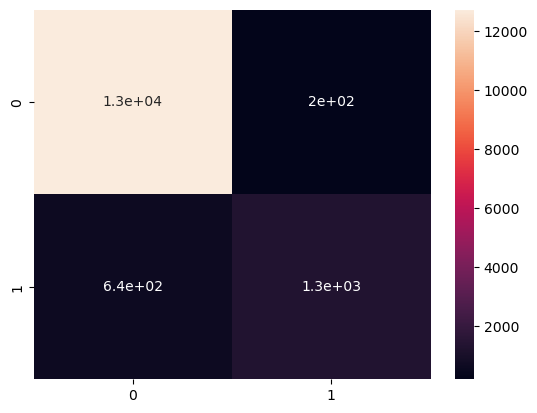

In [306]:
from sklearn.naive_bayes import GaussianNB
gnb2 = GaussianNB()
gnb2.fit(X_train, y_train)
performance(y_train,X_train,gnb2)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      5565
           1       0.84      0.68      0.75       813

    accuracy                           0.94      6378
   macro avg       0.90      0.83      0.86      6378
weighted avg       0.94      0.94      0.94      6378

AUC score: 0.9759030312675095
f1_score: 0.7518694765465671


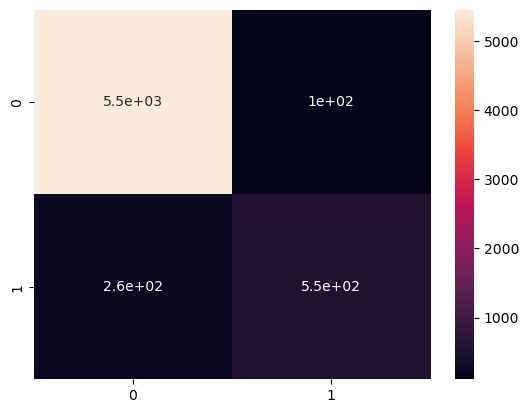

In [307]:
performance(y_test,X_test,gnb2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12921
           1       1.00      1.00      1.00      1960

    accuracy                           1.00     14881
   macro avg       1.00      1.00      1.00     14881
weighted avg       1.00      1.00      1.00     14881

AUC score: 0.9999996841086098
f1_score: 0.999744832865527


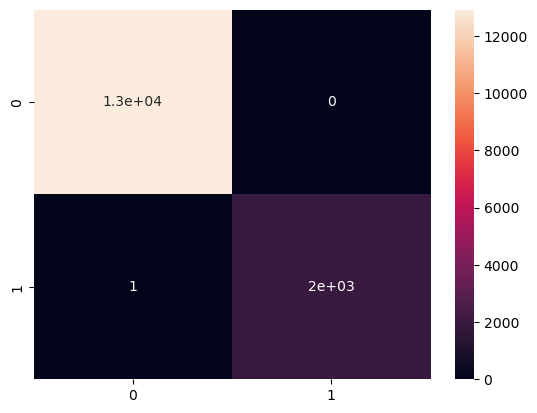

In [308]:
rf_model = RandomForestClassifier(n_estimators = 5)

rf_model.fit(X_train, y_train)
performance(y_train, X_train, rf_model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5565
           1       0.99      0.98      0.99       813

    accuracy                           1.00      6378
   macro avg       0.99      0.99      0.99      6378
weighted avg       1.00      1.00      1.00      6378

AUC score: 0.9993571445148414
f1_score: 0.9851851851851852


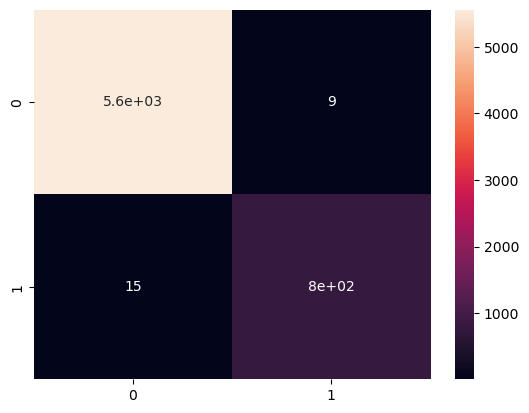

In [309]:
performance(y_test, X_test, rf_model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12921
           1       1.00      1.00      1.00      1960

    accuracy                           1.00     14881
   macro avg       1.00      1.00      1.00     14881
weighted avg       1.00      1.00      1.00     14881

AUC score: 0.9999999210271524
f1_score: 0.999744832865527


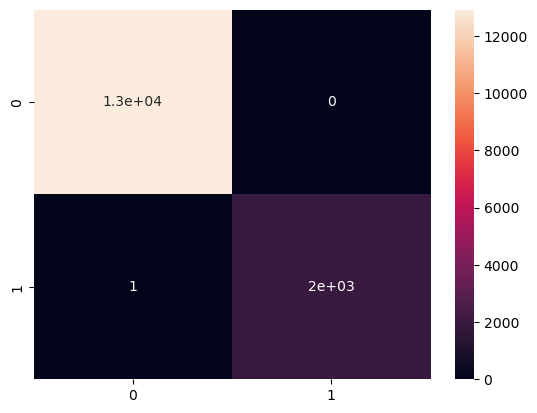

In [310]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)


xgb_model.fit(X_train, y_train)
performance(y_train,X_train,xgb_model)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12921
           1       1.00      1.00      1.00      1960

    accuracy                           1.00     14881
   macro avg       1.00      1.00      1.00     14881
weighted avg       1.00      1.00      1.00     14881

AUC score: 0.9999999210271524
f1_score: 0.999744832865527


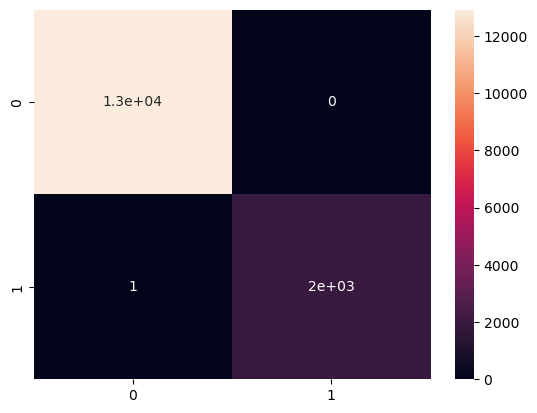

In [311]:
performance(y_train, X_train, xgb_model)

In [2]:
import pandas as pd

In [3]:
df_oversampling = pd.read_excel('oversampling models.xlsx')

In [4]:
df_oversampling

Split      Model Name  Training F1score  Testing F1score  Training Recall  \
0    50-50  Decision Tree            0.9719           0.9720           0.9600   
1    50-50  Random Forest            1.0000           1.0000           1.0000   
2    50-50        Xgboost            1.0000           1.0000           1.0000   
3    50-50     GaussianNB            0.8897           0.8880           0.8500   
4   70-30   Decision Tree            0.9505           0.9512           0.9900   
5   70-30   Random Forest            1.0000           1.0000           1.0000   
6    70-30        Xgboost            1.0000           1.0000           1.0000   
7    70-30     GaussianNB            0.9109           0.9130           0.8800   
8    60-40  Decision Tree            0.9728           0.9733           0.9600   
9    60-40  Random Forest            0.9993           0.9999           1.0000   
10   60-40        Xgboost            0.9999           0.9999           1.0000   
11   60-40     GaussianNB            0.9103           0.9117           0.8900   
12   85-15  Decision Tree            0.9581           0.9577           0.9900   
13   85-15  Random Forest            0.9999           0.9999           1.0000   
14   85-15        Xgboost            0.9999           0.9999           0.9999   
15   85-15     GaussianNB            0.9157           0.9140           0.8900   

    Testing Recall   Training AUC Score   Testing AUC Score  
0           0.9500                0.9774             0.9771  
1           1.0000                0.9999             0.9999  
2           1.0000                0.9999             0.9999  
3           0.8500                0.9721             0.9714  
4           0.9800                0.9689             0.9694  
5           1.0000                0.9999             0.9999  
6           1.0000                0.9999             0.9999  
7           0.8900                0.9721             0.9726  
8           0.9600                0.9775             0.9776  
9           1.0000                0.9999             0.9993  
10          1.0000                0.9999             0.9999  
11          0.9000                0.9729             0.9729  
12          0.9900                0.9691             0.9690  
13          1.0000                0.9999             0.9999  
14          0.9999                0.9999             0.9999  
15          0.8800                0.9718             0.9709

In [5]:
df_undersampling = pd.read_excel('undersampling.xlsx')

In [6]:
df_undersampling

Split      Model Name  Training F1score  Testing F1score  Training Recall  \
0    50-50  Decision Tree            0.9767           0.9695             0.97   
1    50-50  Random Forest            1.0000           0.9812             1.00   
2    50-50        Xgboost            0.9997           0.9958             1.00   
3    50-50     GaussianNB            0.8791           0.8701             0.84   
4   70-30   Decision Tree            0.9744           0.9675             0.95   
5   70-30   Random Forest            0.9999           0.9761             1.00   
6    70-30        Xgboost            0.9999           0.9981             1.00   
7    70-30     GaussianNB            0.8059           0.8072             0.72   
8    60-40  Decision Tree            0.9709           0.9818             0.96   
9    60-40  Random Forest            0.9992           0.9898             1.00   
10   60-40        Xgboost            0.9999           0.9994             1.00   
11   60-40     GaussianNB            0.8246           0.8273             0.74   
12   85-15  Decision Tree            0.9730           0.9708             0.95   
13   85-15  Random Forest            0.9999           0.9999             1.00   
14   85-15        Xgboost            0.9999           0.9999             1.00   
15   85-15     GaussianNB            0.7470           0.7451             0.65   

    Testing Recall   Training AUC Score   Testing AUC Score  
0             0.95                0.9832             0.9742  
1             0.97                0.9999             0.9992  
2             0.99                0.9999             0.9996  
3             0.82                0.9698             0.9627  
4             0.94                0.9750             0.9685  
5             0.97                0.9999             0.9999  
6             1.00                1.0000             0.9999  
7             0.73                0.9708             0.9733  
8             0.97                0.9778             0.9867  
9             0.99                0.9999             0.9985  
10            1.00                1.0000             0.9999  
11            0.76                0.9671             0.9707  
12            0.94                0.9737             0.9717  
13            1.00                0.9999             0.9999  
14            1.00                0.9999             0.9999  
15            0.66                0.9720             0.9752

In [7]:
df_oversampling.sort_values(by='Testing Recall')

Split      Model Name  Training F1score  Testing F1score  Training Recall  \
3    50-50     GaussianNB            0.8897           0.8880           0.8500   
15   85-15     GaussianNB            0.9157           0.9140           0.8900   
7    70-30     GaussianNB            0.9109           0.9130           0.8800   
11   60-40     GaussianNB            0.9103           0.9117           0.8900   
0    50-50  Decision Tree            0.9719           0.9720           0.9600   
8    60-40  Decision Tree            0.9728           0.9733           0.9600   
4   70-30   Decision Tree            0.9505           0.9512           0.9900   
12   85-15  Decision Tree            0.9581           0.9577           0.9900   
14   85-15        Xgboost            0.9999           0.9999           0.9999   
1    50-50  Random Forest            1.0000           1.0000           1.0000   
2    50-50        Xgboost            1.0000           1.0000           1.0000   
5   70-30   Random Forest            1.0000           1.0000           1.0000   
6    70-30        Xgboost            1.0000           1.0000           1.0000   
9    60-40  Random Forest            0.9993           0.9999           1.0000   
10   60-40        Xgboost            0.9999           0.9999           1.0000   
13   85-15  Random Forest            0.9999           0.9999           1.0000   

    Testing Recall   Training AUC Score   Testing AUC Score  
3           0.8500                0.9721             0.9714  
15          0.8800                0.9718             0.9709  
7           0.8900                0.9721             0.9726  
11          0.9000                0.9729             0.9729  
0           0.9500                0.9774             0.9771  
8           0.9600                0.9775             0.9776  
4           0.9800                0.9689             0.9694  
12          0.9900                0.9691             0.9690  
14          0.9999                0.9999             0.9999  
1           1.0000                0.9999             0.9999  
2           1.0000                0.9999             0.9999  
5           1.0000                0.9999             0.9999  
6           1.0000                0.9999             0.9999  
9           1.0000                0.9999             0.9993  
10          1.0000                0.9999             0.9999  
13          1.0000                0.9999             0.9999

In [255]:
df_oversampling[df_oversampling['Testing Recall']==0.99]

Split      Model Name  Training F1score  Testing F1score  Training Recall  \
12  85-15  Decision Tree            0.9581           0.9577             0.99   

    Testing Recall   Training AUC Score   Testing AUC Score  
12            0.99                0.9691              0.969

In [256]:
df_undersampling[df_undersampling['Testing Recall']==0.99]

Split      Model Name  Training F1score  Testing F1score  Training Recall  \
2  50-50        Xgboost            0.9997           0.9958              1.0   
9  60-40  Random Forest            0.9992           0.9898              1.0   

   Testing Recall   Training AUC Score   Testing AUC Score  
2            0.99                0.9999             0.9996  
9            0.99                0.9999             0.9985

In [315]:
X = scaled_df.drop(['loan_status','int_rate'], axis=1)
y = scaled_df['loan_status']

In [316]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.85) 
X,y = smote.fit_resample(X,y)

In [317]:
y.value_counts(normalize=True)

0    0.540541
1    0.459459
Name: loan_status, dtype: float64

In [318]:
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
dt_classifier = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5,
                           scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [326]:
print("Best Params:")
grid_search.best_params_

Best Params:



{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [320]:
dtmodel = DecisionTreeClassifier(**grid_search.best_params_)
dtmodel.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    147016
           1       1.00      1.00      1.00    125226

    accuracy                           1.00    272242
   macro avg       1.00      1.00      1.00    272242
weighted avg       1.00      1.00      1.00    272242

AUC score: 0.9999989453687095
f1_score: 0.9999600709140566


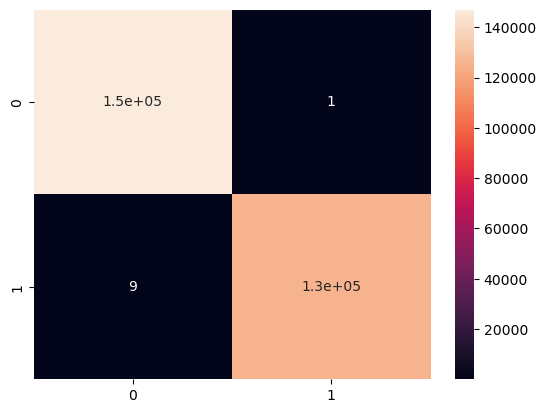

In [327]:
performance(y_train,X_train,dtmodel)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     63210
           1       1.00      1.00      1.00     53466

    accuracy                           1.00    116676
   macro avg       1.00      1.00      1.00    116676
weighted avg       1.00      1.00      1.00    116676

AUC score: 0.9997128717718093
f1_score: 0.9995791442599954


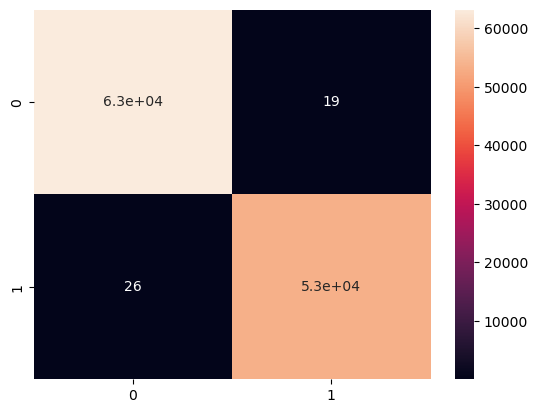

In [328]:
performance(y_test,X_test,dtmodel)

In [323]:
imp=dtmodel.feature_importances_
df_imp = pd.DataFrame(zip(X_train.columns,imp), columns = ['column','importance'])
df_imp=df_imp.sort_values('importance',ascending=False)
df_imp

column  importance
35            last_pymnt_d_year    0.501828
7                   issue_month    0.220862
9            last_pymnt_d_month    0.208285
28              last_pymnt_amnt    0.053976
36      last_credit_pull_d_year    0.007686
26           total_rec_late_fee    0.003722
11     last_credit_pull_d_month    0.000562
27      collection_recovery_fee    0.000376
10           next_pymnt_d_month    0.000249
31               acc_now_delinq    0.000242
19       mths_since_last_delinq    0.000232
18               inq_last_6mths    0.000212
24                  total_pymnt    0.000183
17                  delinq_2yrs    0.000168
8        earliest_cr_line_month    0.000146
21                    revol_bal    0.000137
12                    loan_amnt    0.000131
20                      pub_rec    0.000117
13                  installment    0.000117
30  mths_since_last_major_derog    0.000106
1                         grade    0.000106
25                total_rec_int    0.000094
29   collections_12_mths_ex_med    0.000084
15                   annual_inc    0.000078
33                  tot_cur_bal    0.000060
23                    total_acc    0.000057
22                   revol_util    0.000055
3           verification_status    0.000052
4                         title    0.000037
16                          dti    0.000028
5           initial_list_status    0.000010
6              application_type    0.000000
32                 tot_coll_amt    0.000000
14                   emp_length    0.000000
34        earliest_cr_line_year    0.000000
2                home_ownership    0.000000
0                          term    0.000000